# NLP Project

#1. Imports

In [ ]:
!pip uninstall keras tensorflow
!pip install keras tensorflow

Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-2.12.0
Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.12.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.5 MB/s et

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.metrics import CategoricalAccuracy
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
import sklearn
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from tensorflow.keras.initializers import Constant
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Bidirectional
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Bidirectional
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np
from keras.regularizers import l2
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.1 MB/s eta 0:00:00


In [ ]:
import sys
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns

import torch
from transformers import AdamW, get_linear_schedule_with_warmup
from transformers import AutoModelForSequenceClassification, AutoTokenizer, BertConfig
from torch.nn import functional as F
from transformers import logging
from  nltk.metrics import agreement

logging.set_verbosity_error()

from sklearn.model_selection import StratifiedKFold, train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
from pathlib import Path
from tqdm.notebook import tqdm, trange
import warnings
import logging

tqdm.pandas()
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Classification with Bert

##2.1. Create dataset and dataloader

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Reviews.csv')

In [ ]:
# We create a subset: 
df_balanced = pd.DataFrame()

# min_class_count = df['Score'].value_counts().min()
min_class_count = 2000

for label in df['Score'].unique():
    df_balanced = pd.concat([df_balanced, df[df['Score'] == label].sample(min_class_count)])

# Now df_balanced is a new balanced dataset

In [ ]:
# We keep only the text, summary and score of the dataframe
df_balanced = df_balanced[['Summary', 'Text', 'Score']]
df_balanced

Summary  \
228232                         What I've Been Looking For   
522929                                Recently Discovered   
240121                                   The dog loves it   
188011                        Perfect treats for any cat!   
295280                                         five stars   
...                                                   ...   
197504                          Some love, some leave it!   
276467                                       Organic Food   
324065                                 irradiated almonds   
195229                                        "Malossol"?   
34501   Medium Roast. No Outstanding Flavor. Slightly ...   

                                                     Text  Score  
228232  I was very excited when I received a Keurig co...      5  
522929  My husband has been snacking on these from the...      5  
240121  I usually feed my dog kibbles and bits but I d...      5  
188011  When I first got my kitten, he turned his litt...      5  
295280  I am very satisfied the way you handle busines...      5  
...                                                   ...    ...  
197504  My Boxers don't seem very interested in this t...      3  
276467  This is not tasting so bad, at least you do no...      3  
324065  FYI, unless you buy directly from a grower, AL...      3  
195229  Guys, do you know what "malossol" means in Rus...      3  
34501   There is not much to say about this Caribou me...      3  

[10000 rows x 3 columns]

In [ ]:
train_df, rest_df = train_test_split(df_balanced, test_size=0.3, random_state=42)
test_df, validation_df = train_test_split(rest_df, test_size=0.8, random_state=42)

In [ ]:
import pandas as pd
from transformers import AutoTokenizer
import torch

class FineFoodsDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, pretrained='bert-base-uncased', is_test_only=False):
        self.raw_dataset = dataset
        self.is_test_only = is_test_only
        if not self.is_test_only:
            self.labels = dataset['Score'].to_numpy() - 1  # Adjust labels to start from 0
        self.pretrained = pretrained
        self.tokenizer = AutoTokenizer.from_pretrained(self.pretrained, use_fast=False)
        self.encodings = self.encode()
  
    def encode(self):
        text_list = self.raw_dataset['Text'].astype(str).tolist()
        summary_list = self.raw_dataset['Summary'].astype(str).tolist()
        input_dict = self.tokenizer(text_list, truncation=True, padding=True, return_tensors='pt', add_special_tokens=True)
        input_dict['input_ids'] = input_dict['input_ids']
        input_dict['attention_mask'] = input_dict['attention_mask']
        input_dict['token_type_ids'] = input_dict['token_type_ids']
        input_dict['labels'] = torch.tensor(self.labels) if not self.is_test_only else None
        return input_dict

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        return item

    def __len__(self):
        return len(self.encodings['input_ids'])


In [ ]:
BERT_LARGE_UNCASED = 'bert-large-uncased'
BERT_BASE_UNCASED = 'bert-base-uncased'
train_dataset = FineFoodsDataset(train_df, pretrained=BERT_LARGE_UNCASED)
valid_dataset = FineFoodsDataset(validation_df, pretrained=BERT_LARGE_UNCASED)
test_dataset = FineFoodsDataset(test_df, pretrained=BERT_LARGE_UNCASED)

In [ ]:
# Define data loaders for training and testing data in this fold
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=16,
)
valid_loader = torch.utils.data.DataLoader(
    valid_dataset,
    batch_size=16,
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=16,
)

##2.2. define train optimizer etc. 

In [ ]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics

def eval_model(model, test_loader, device):
    y = []
    y_hat = []
    total_loss = 0
    with torch.no_grad():
        for batch in tqdm(test_loader, position=0, leave=True, file=sys.stdout):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            token_type_ids = batch['token_type_ids'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, labels=labels)

            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            y += labels.detach().cpu().tolist()
            y_hat += predictions.detach().cpu().tolist()
            loss = outputs.loss
            total_loss += loss.item()

    avg_loss = total_loss / len(valid_loader)
    acc = sklearn.metrics.accuracy_score(y, y_hat)
    f1 = sklearn.metrics.f1_score(y, y_hat, average='micro')

    mat = sklearn.metrics.confusion_matrix(y, y_hat)
    df_cm = pd.DataFrame(mat, range(5), range(5))
    sns.heatmap(df_cm, annot=True)
    plt.show()

    report = sklearn.metrics.classification_report(y, y_hat)

    print(report)
    print('Accuracy:', acc)

    return acc, f1, avg_loss


In [ ]:
import sys
from tqdm import trange

def train(model, train_loader, valid_loader, optimizer, scheduler, num_epochs, device):
    model.to(device)
    model.train()
    best_acc = 0
    best_model = []
    training_loss = []
    validation_loss = []
    best_epoch = 0

    for epoch in range(num_epochs):
        progress_bar = trange(len(train_loader), position=0, leave=True, desc=f'Epoch {epoch+1}', file=sys.stdout)
        total_loss = 0
        for _, batch in enumerate(train_loader, 0):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            token_type_ids = batch['token_type_ids'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, labels=labels)

            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            optimizer.step()
            scheduler.step()
            progress_bar.update(1)

        avg_train_loss = total_loss / len(train_loader)
        training_loss.append(avg_train_loss)

        accuracy, f1, avg_valid_loss = eval_model(model, valid_loader, device)
        validation_loss.append(avg_valid_loss)
        if accuracy > best_acc: 
          best_acc = accuracy
          best_model = model
          best_epoch = epoch
        progress_bar.close()
    
    return best_model, best_epoch, training_loss, validation_loss

In [ ]:
num_epochs = 5
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)
torch.manual_seed(30) 

cuda


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(BERT_BASE_UNCASED, num_labels=5, output_attentions=False, output_hidden_states=False)
optimizer = AdamW(model.parameters(), lr=1e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=5 * len(train_loader))

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


##2.3 Run model

Epoch 1: 100%|██████████| 438/438 [09:51<00:00,  1.18s/it]

  0%|          | 0/150 [00:00<?, ?it/s]

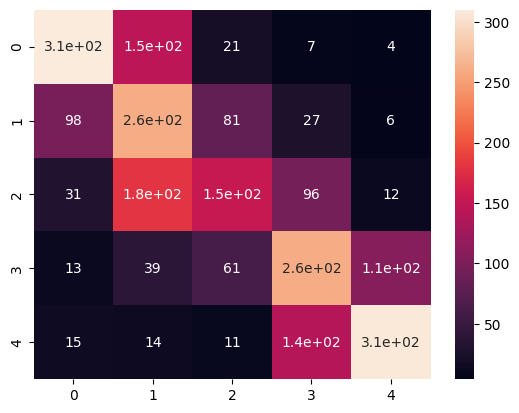

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       488
           1       0.41      0.55      0.47       472
           2       0.47      0.33      0.38       473
           3       0.49      0.54      0.51       480
           4       0.70      0.63      0.67       487

    accuracy                           0.54      2400
   macro avg       0.55      0.54      0.54      2400
weighted avg       0.55      0.54      0.54      2400

Accuracy: 0.5379166666666667
Epoch 2: 100%|██████████| 438/438 [10:00<00:00,  1.17s/it]

  0%|          | 0/150 [00:00<?, ?it/s]

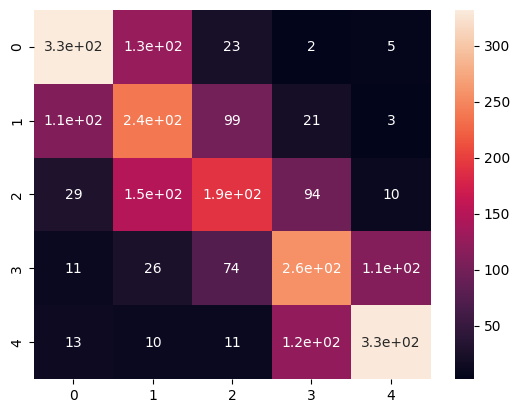

              precision    recall  f1-score   support

           0       0.67      0.68      0.68       488
           1       0.43      0.51      0.47       472
           2       0.48      0.40      0.44       473
           3       0.52      0.54      0.53       480
           4       0.72      0.68      0.70       487

    accuracy                           0.56      2400
   macro avg       0.56      0.56      0.56      2400
weighted avg       0.57      0.56      0.56      2400

Accuracy: 0.5620833333333334
Epoch 3: 100%|██████████| 438/438 [09:58<00:00,  1.17s/it]

  0%|          | 0/150 [00:00<?, ?it/s]

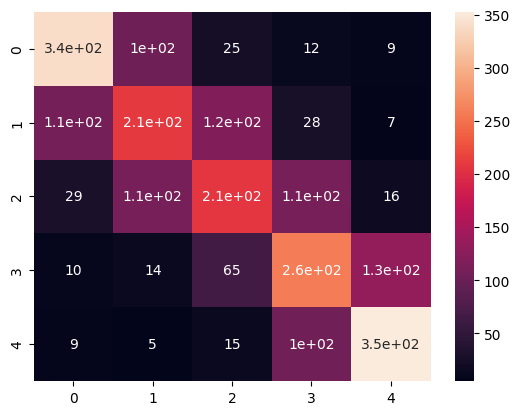

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       488
           1       0.47      0.44      0.46       472
           2       0.48      0.44      0.46       473
           3       0.50      0.54      0.52       480
           4       0.68      0.72      0.70       487

    accuracy                           0.57      2400
   macro avg       0.56      0.57      0.57      2400
weighted avg       0.57      0.57      0.57      2400

Accuracy: 0.5695833333333333
Epoch 4: 100%|██████████| 438/438 [10:03<00:00,  1.16s/it]

  0%|          | 0/150 [00:00<?, ?it/s]

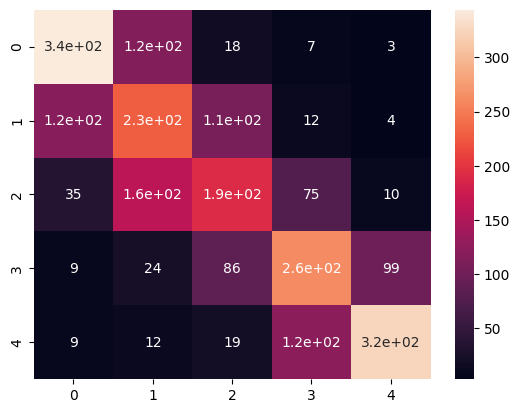

              precision    recall  f1-score   support

           0       0.67      0.70      0.68       488
           1       0.42      0.49      0.45       472
           2       0.45      0.41      0.43       473
           3       0.55      0.55      0.55       480
           4       0.74      0.67      0.70       487

    accuracy                           0.56      2400
   macro avg       0.57      0.56      0.56      2400
weighted avg       0.57      0.56      0.56      2400

Accuracy: 0.5633333333333334
Epoch 5: 100%|██████████| 438/438 [10:01<00:00,  1.17s/it]

  0%|          | 0/150 [00:00<?, ?it/s]

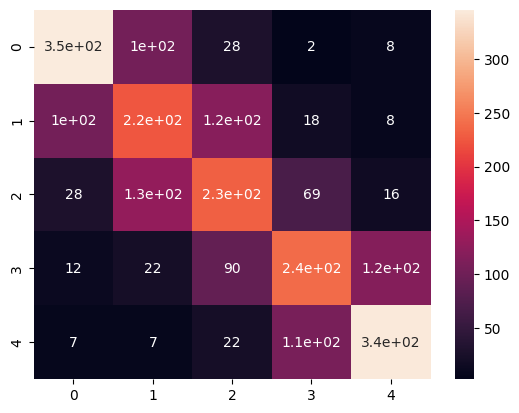

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       488
           1       0.46      0.47      0.47       472
           2       0.47      0.49      0.48       473
           3       0.55      0.50      0.52       480
           4       0.70      0.71      0.70       487

    accuracy                           0.58      2400
   macro avg       0.58      0.58      0.58      2400
weighted avg       0.58      0.58      0.58      2400

Accuracy: 0.5766666666666667
Epoch 5: 100%|██████████| 438/438 [11:20<00:00,  1.55s/it]


In [ ]:
torch.cuda.empty_cache()
best_model, best_epoch, training_loss, validation_loss = train(model, train_loader, valid_loader, optimizer, scheduler, num_epochs, device)

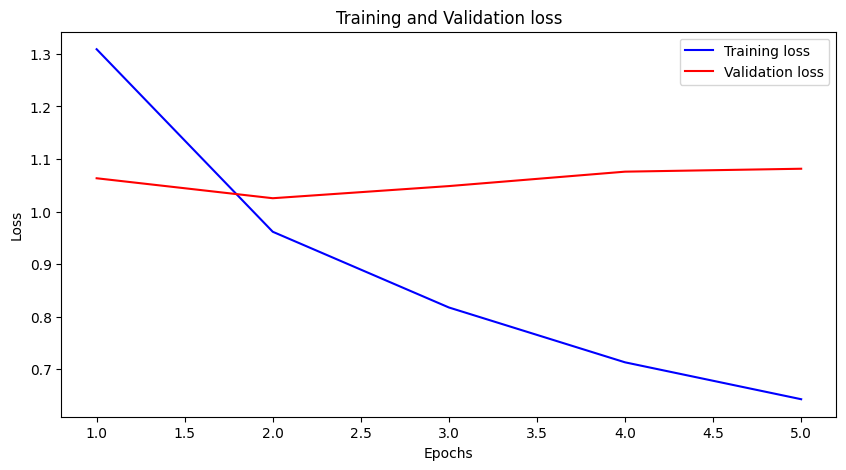

In [ ]:
import matplotlib.pyplot as plt

# Create a range for x-axis
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, 'b', label='Training loss')
plt.plot(epochs, validation_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#3. Creating my own models

In [ ]:
def get_regular_data(label_category='one_hot'):
  df = pd.read_csv('/content/drive/MyDrive/Reviews.csv')
  df_balanced = pd.DataFrame()

  min_class_count = df['Score'].value_counts().min()
  # min_class_count = 10000

  for label in df['Score'].unique():
      df_balanced = pd.concat([df_balanced, df[df['Score'] == label].sample(min_class_count)])

  df = df_balanced[['Text', 'Score']]

  # Analyzing the number of unique words
  all_words = [word for tokens in df["Text"] for word in tokens.split(" ")]
  unique_words = set(all_words)
  max_words = len(unique_words)
  print(f'Total number of unique words: {max_words}')

  # Analyzing sequence length
  sequence_lengths = [len(tokens.split(" ")) for tokens in df["Text"]]
  max_sequence_length = np.percentile(sequence_lengths, 95)  # Set to the 95th percentile
  print(f'Max sequence length at 95th percentile: {max_sequence_length}')

  # Prepare the Tokenizer
  tokenizer = Tokenizer(num_words=max_words)
  tokenizer.fit_on_texts(df['Text'])

  # Tokenize the data
  sequences = tokenizer.texts_to_sequences(df['Text'])
  word_index = tokenizer.word_index

  # Ensure all sequences have the same length
  data = pad_sequences(sequences, maxlen=int(max_sequence_length))

  # Prepare labels
  if label_category == 'one_hot':
    labels = to_categorical(df['Score'] - 1)
  else: 
    labels = df['Score'].values

  x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

  return x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer

In [ ]:
x_train, x_val, y_train, y_val, max_words, max_sequence_length = get_regular_data(label_category='one_hot')

Total number of unique words: 282728
Max sequence length at 95th percentile: 239.0


##3.1. We create a categorigal deep learning model using the categorical crossentropy loss. 

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=128, input_length=int(max_sequence_length)))
model.add(Dropout(0.2))

model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))

model.add(LSTM(128))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 239, 128)          36189184  
                                                                 
 dropout_9 (Dropout)         (None, 239, 128)          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 235, 64)           41024     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 58, 64)           0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 128)               98816     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                      

In [ ]:
column_names = ['training', "F1 Score", "ROC AUC", "Accuracy"]

# create the empty DataFrame
df_score_all_trainings = pd.DataFrame(columns = column_names)



Start of epoch 1
931/931 [==============================] - 3s 3ms/step


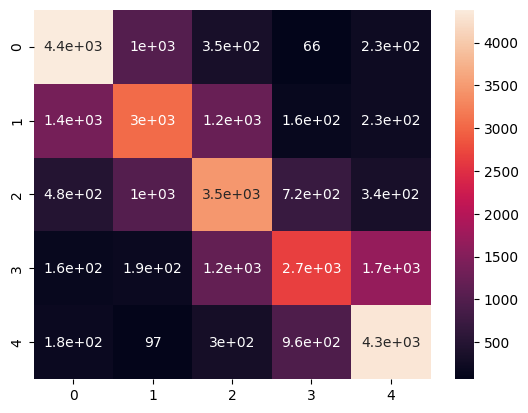

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      6043
           1       0.57      0.51      0.53      6003
           2       0.53      0.57      0.55      6015
           3       0.58      0.46      0.51      5846
           4       0.64      0.74      0.68      5862

    accuracy                           0.60     29769
   macro avg       0.60      0.60      0.60     29769
weighted avg       0.60      0.60      0.60     29769

F1 Score:  0.595617036510893
ROC AUC:  0.7498232376591896
Validation acc: 0.6000

Start of epoch 2
931/931 [==============================] - 5s 5ms/step


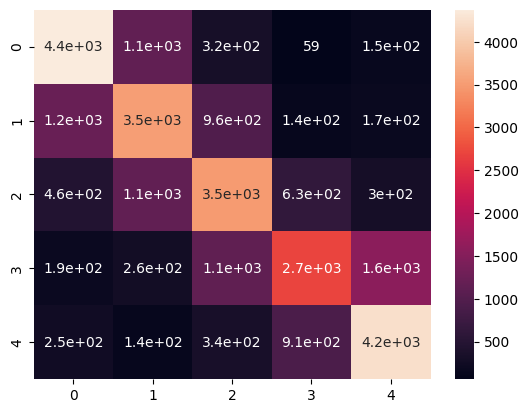

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.70      6043
           1       0.57      0.59      0.58      6003
           2       0.56      0.58      0.57      6015
           3       0.61      0.46      0.52      5846
           4       0.66      0.72      0.69      5862

    accuracy                           0.62     29769
   macro avg       0.61      0.61      0.61     29769
weighted avg       0.61      0.62      0.61     29769

F1 Score:  0.6120177526711107
ROC AUC:  0.7592639130878893
Validation acc: 0.6152

Start of epoch 3
931/931 [==============================] - 3s 3ms/step


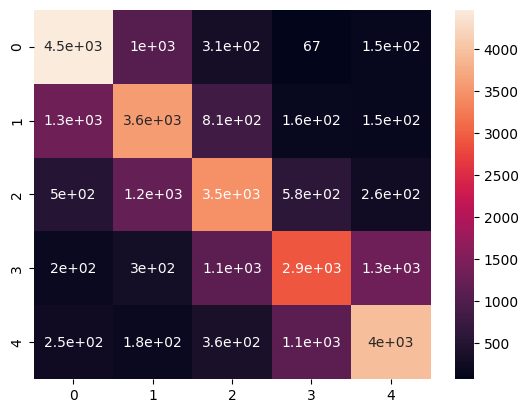

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70      6043
           1       0.57      0.60      0.58      6003
           2       0.57      0.58      0.57      6015
           3       0.60      0.50      0.54      5846
           4       0.68      0.67      0.68      5862

    accuracy                           0.62     29769
   macro avg       0.62      0.62      0.62     29769
weighted avg       0.62      0.62      0.62     29769

F1 Score:  0.6153651458293234
ROC AUC:  0.7605301616286088
Validation acc: 0.6173

Start of epoch 4
931/931 [==============================] - 3s 4ms/step


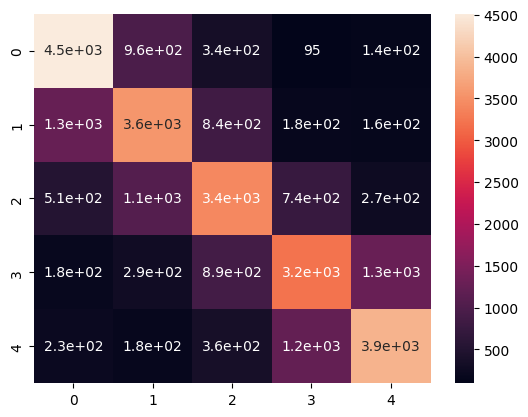

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      6043
           1       0.59      0.59      0.59      6003
           2       0.59      0.57      0.58      6015
           3       0.59      0.55      0.57      5846
           4       0.68      0.66      0.67      5862

    accuracy                           0.62     29769
   macro avg       0.62      0.62      0.62     29769
weighted avg       0.62      0.62      0.62     29769

F1 Score:  0.622381750632281
ROC AUC:  0.7645985567236698
Validation acc: 0.6237

Start of epoch 5
931/931 [==============================] - 3s 3ms/step


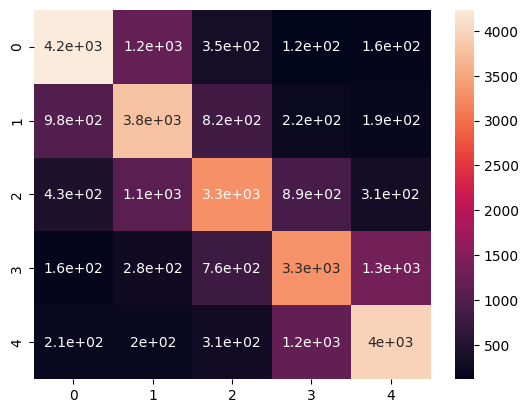

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      6043
           1       0.58      0.63      0.60      6003
           2       0.60      0.55      0.57      6015
           3       0.58      0.57      0.57      5846
           4       0.67      0.68      0.67      5862

    accuracy                           0.63     29769
   macro avg       0.63      0.63      0.62     29769
weighted avg       0.63      0.63      0.62     29769

F1 Score:  0.6248841662481815
ROC AUC:  0.7657586329500902
Validation acc: 0.6253

Start of epoch 6
931/931 [==============================] - 3s 3ms/step


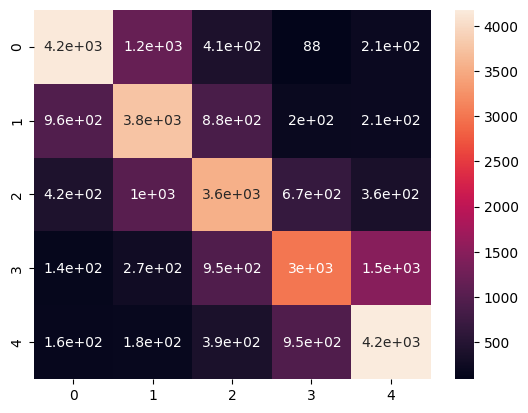

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      6043
           1       0.59      0.63      0.61      6003
           2       0.57      0.59      0.58      6015
           3       0.61      0.51      0.56      5846
           4       0.65      0.71      0.68      5862

    accuracy                           0.63     29769
   macro avg       0.63      0.63      0.63     29769
weighted avg       0.63      0.63      0.63     29769

F1 Score:  0.625254747843817
ROC AUC:  0.7663403542606124
Validation acc: 0.6264

Start of epoch 7
931/931 [==============================] - 3s 3ms/step


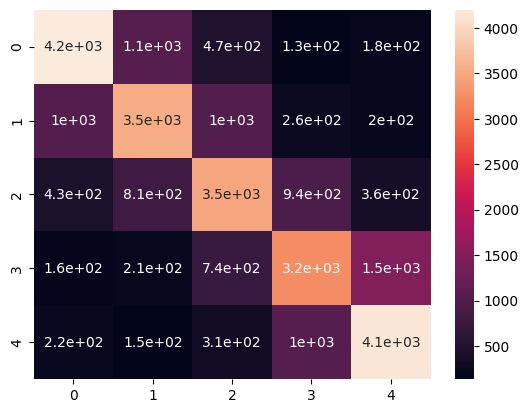

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      6043
           1       0.61      0.59      0.60      6003
           2       0.58      0.58      0.58      6015
           3       0.58      0.55      0.57      5846
           4       0.65      0.71      0.68      5862

    accuracy                           0.62     29769
   macro avg       0.62      0.62      0.62     29769
weighted avg       0.62      0.62      0.62     29769

F1 Score:  0.6237335183453694
ROC AUC:  0.7652738092535193
Validation acc: 0.6245

Start of epoch 8
931/931 [==============================] - 3s 3ms/step


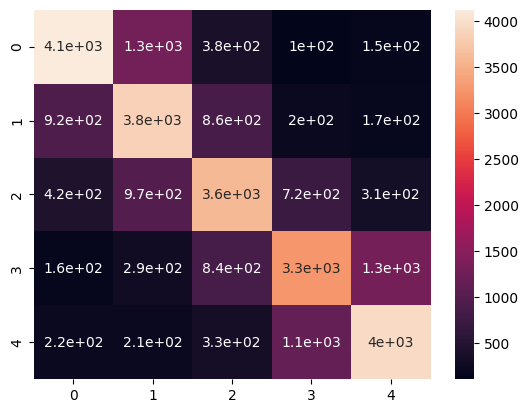

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      6043
           1       0.58      0.64      0.61      6003
           2       0.60      0.60      0.60      6015
           3       0.60      0.56      0.58      5846
           4       0.67      0.67      0.67      5862

    accuracy                           0.63     29769
   macro avg       0.63      0.63      0.63     29769
weighted avg       0.63      0.63      0.63     29769

F1 Score:  0.630688467764062
ROC AUC:  0.7690551535002357
Validation acc: 0.6307

Start of epoch 9
931/931 [==============================] - 3s 3ms/step


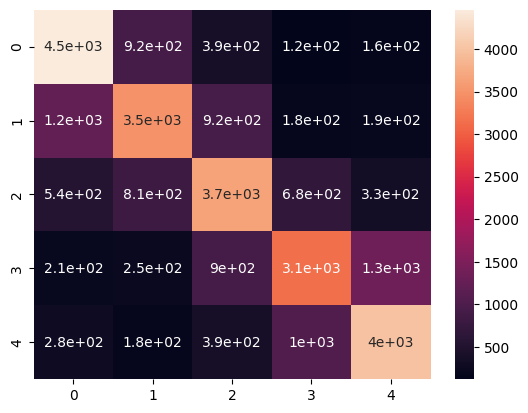

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70      6043
           1       0.62      0.58      0.60      6003
           2       0.58      0.61      0.60      6015
           3       0.61      0.54      0.57      5846
           4       0.66      0.68      0.67      5862

    accuracy                           0.63     29769
   macro avg       0.63      0.63      0.63     29769
weighted avg       0.63      0.63      0.63     29769

F1 Score:  0.6280079472581765
ROC AUC:  0.7683084595946641
Validation acc: 0.6296

Start of epoch 10
931/931 [==============================] - 3s 3ms/step


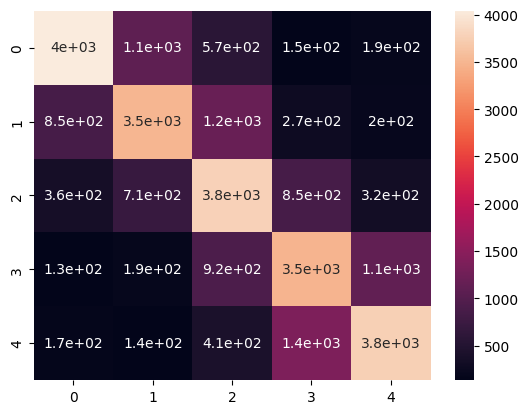

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      6043
           1       0.62      0.58      0.60      6003
           2       0.55      0.63      0.59      6015
           3       0.57      0.60      0.58      5846
           4       0.67      0.64      0.66      5862

    accuracy                           0.62     29769
   macro avg       0.63      0.62      0.63     29769
weighted avg       0.63      0.62      0.63     29769

F1 Score:  0.6253179033696084
ROC AUC:  0.764925365735713
Validation acc: 0.6240


<ipython-input-21-62208aec7b74>:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score_all_trainings = df_score_all_trainings.append({'training': 'simple model, categorical', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)


In [ ]:
def train_classification_model(model, x_train, y_train, x_val, y_val, epochs, batch_size):
    # Metrics and loss
    accuracy = CategoricalAccuracy()
    optimizer = Adam(learning_rate=0.001)
    loss_fn = CategoricalCrossentropy()

    # Prepare the training dataset
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    # Prepare the validation dataset
    val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
    val_dataset = val_dataset.batch(batch_size)

    best_F1 = 0 
    best_roc = 0
    best_acc = 0 

    # Iterate over epochs
    for epoch in range(epochs):
        print(f'\nStart of epoch {epoch+1}')

        # Iterate over the batches of the dataset
        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                logits = model(x_batch_train, training=True)
                loss_value = loss_fn(y_batch_train, logits)
            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Run a validation loop at the end of each epoch
        for x_batch_val, y_batch_val in val_dataset:
            val_logits = model(x_batch_val, training=False)
            accuracy.update_state(y_batch_val, val_logits)

        # Get the metric's result
        acc = accuracy.result()

        # Reset the validation metrics for the next epoch
        accuracy.reset_states()

        # Compute confusion matrix
        val_predict = np.argmax(model.predict(x_val), -1)
        val_targ = np.argmax(y_val, -1)

        acc = sklearn.metrics.accuracy_score(val_targ, val_predict)
        f1 = sklearn.metrics.f1_score(val_targ, val_predict, average='micro')

        mat = sklearn.metrics.confusion_matrix(val_targ, val_predict)
        df_cm = pd.DataFrame(mat, range(5), range(5))
        sns.heatmap(df_cm, annot=True)
        plt.show()

        print("Classification Report:")
        print(classification_report(val_targ, val_predict))

        # Calculate F1 score
        f1 = f1_score(val_targ, val_predict, average='weighted')
        print("F1 Score: ", f1)

        # ROC AUC
        lb = LabelBinarizer()
        lb.fit(val_targ)
        val_targ_lb = lb.transform(val_targ)
        val_predict_lb = lb.transform(val_predict)

        roc_auc = roc_auc_score(val_targ_lb, val_predict_lb, multi_class="ovr")
        print("ROC AUC: ", roc_auc)

        print(f'Validation acc: {float(acc):.4f}')

        if roc_auc > best_roc:
          best_roc = roc_auc
          best_F1 = f1
          best_acc = acc

    return best_roc, best_F1, best_acc

# Call the function
best_roc, best_F1, best_acc = train_classification_model(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)
df_score_all_trainings = df_score_all_trainings.append({'training': 'simple model, categorical', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)

In [ ]:
df_score_all_trainings

training  F1 Score   ROC AUC  Accuracy
0  simple model, categorical  0.630688  0.769055   0.63069

##3.2. We create a regression model, that might learn the relation between several labels

In [ ]:
x_train, x_val, y_train, y_val, max_words, max_sequence_length = get_regular_data(label_category='regression')

Total number of unique words: 281580
Max sequence length at 95th percentile: 237.0



Start of epoch 1
931/931 [==============================] - 4s 4ms/step


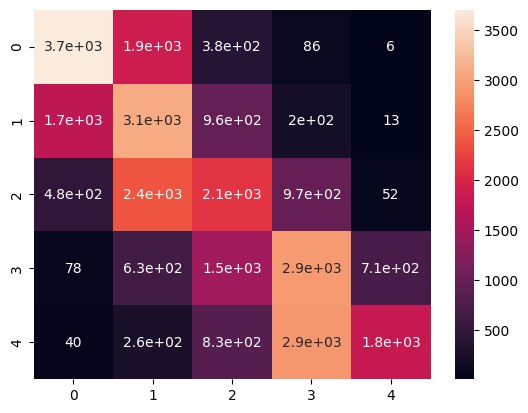

Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.61      0.61      6043
           2       0.37      0.51      0.43      6003
           3       0.37      0.35      0.36      6015
           4       0.41      0.50      0.45      5846
           5       0.70      0.31      0.43      5862

    accuracy                           0.46     29769
   macro avg       0.49      0.46      0.46     29769
weighted avg       0.49      0.46      0.46     29769

F1 Score:  0.4581894417072683
ROC AUC:  0.6616128602658549
Validation acc: 0.4591

Start of epoch 2
931/931 [==============================] - 3s 3ms/step


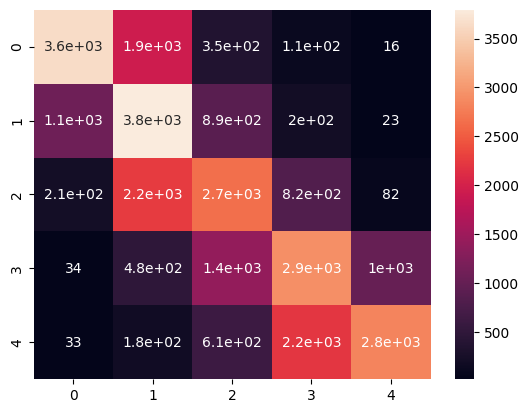

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.60      0.66      6043
           2       0.44      0.63      0.52      6003
           3       0.45      0.44      0.44      6015
           4       0.47      0.50      0.48      5846
           5       0.71      0.48      0.58      5862

    accuracy                           0.53     29769
   macro avg       0.56      0.53      0.54     29769
weighted avg       0.56      0.53      0.54     29769

F1 Score:  0.5360358730640045
ROC AUC:  0.7070172448296341
Validation acc: 0.5316

Start of epoch 3
931/931 [==============================] - 3s 3ms/step


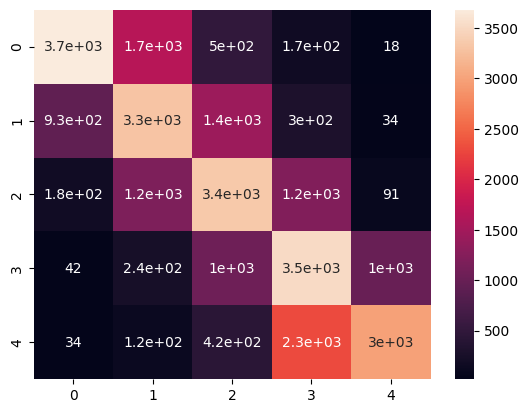

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.61      0.68      6043
           2       0.51      0.55      0.53      6003
           3       0.49      0.56      0.52      6015
           4       0.47      0.60      0.53      5846
           5       0.72      0.51      0.60      5862

    accuracy                           0.57     29769
   macro avg       0.59      0.57      0.57     29769
weighted avg       0.59      0.57      0.57     29769

F1 Score:  0.5704798044003317
ROC AUC:  0.7283525359724254
Validation acc: 0.5655

Start of epoch 4
931/931 [==============================] - 3s 3ms/step


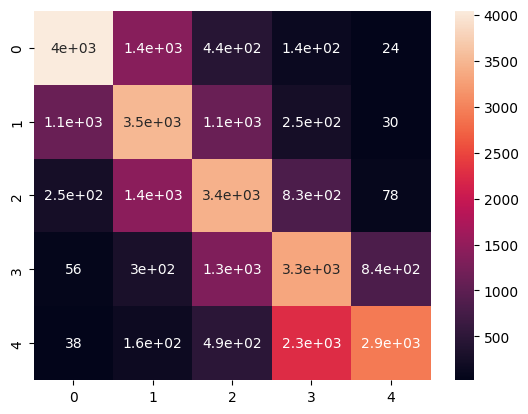

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.67      0.70      6043
           2       0.52      0.58      0.55      6003
           3       0.51      0.57      0.54      6015
           4       0.49      0.57      0.53      5846
           5       0.75      0.50      0.60      5862

    accuracy                           0.58     29769
   macro avg       0.60      0.58      0.58     29769
weighted avg       0.60      0.58      0.58     29769

F1 Score:  0.5821442144724284
ROC AUC:  0.7363156341341239
Validation acc: 0.5786

Start of epoch 5
931/931 [==============================] - 3s 3ms/step


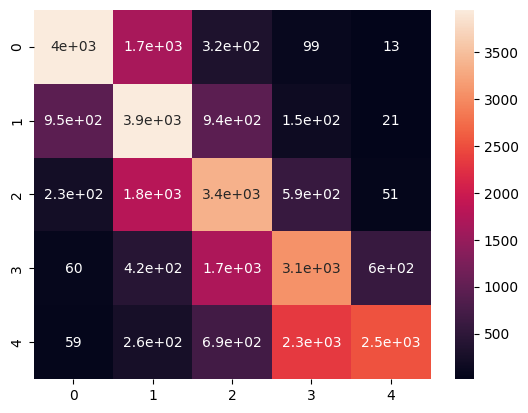

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.65      0.70      6043
           2       0.49      0.66      0.56      6003
           3       0.48      0.56      0.52      6015
           4       0.49      0.52      0.51      5846
           5       0.79      0.43      0.56      5862

    accuracy                           0.57     29769
   macro avg       0.60      0.57      0.57     29769
weighted avg       0.60      0.57      0.57     29769

F1 Score:  0.5690957351506966
ROC AUC:  0.728386584264999
Validation acc: 0.5662

Start of epoch 6
931/931 [==============================] - 3s 3ms/step


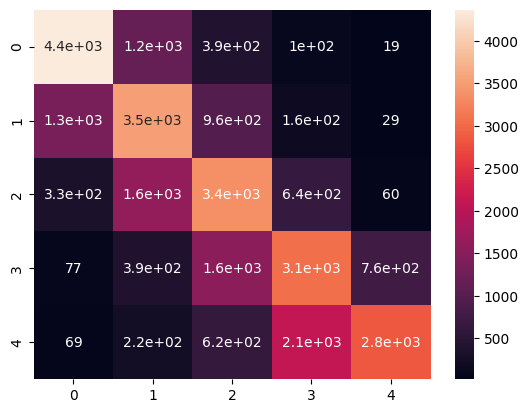

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.72      0.71      6043
           2       0.51      0.58      0.54      6003
           3       0.49      0.56      0.52      6015
           4       0.50      0.52      0.51      5846
           5       0.77      0.48      0.59      5862

    accuracy                           0.58     29769
   macro avg       0.59      0.57      0.58     29769
weighted avg       0.59      0.58      0.58     29769

F1 Score:  0.5770394461011431
ROC AUC:  0.7340270695465134
Validation acc: 0.5752

Start of epoch 7
931/931 [==============================] - 3s 3ms/step


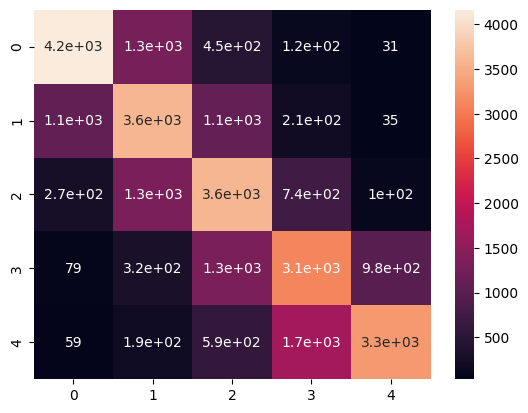

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.69      0.71      6043
           2       0.54      0.60      0.57      6003
           3       0.51      0.60      0.55      6015
           4       0.53      0.54      0.53      5846
           5       0.74      0.56      0.64      5862

    accuracy                           0.60     29769
   macro avg       0.61      0.60      0.60     29769
weighted avg       0.61      0.60      0.60     29769

F1 Score:  0.6000381421127606
ROC AUC:  0.7477634186502968
Validation acc: 0.5969

Start of epoch 8
931/931 [==============================] - 3s 3ms/step


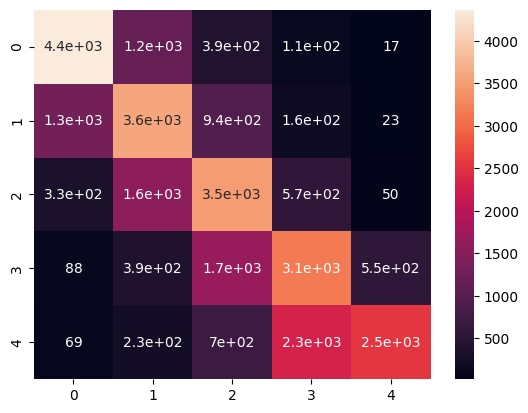

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.72      0.72      6043
           2       0.52      0.60      0.55      6003
           3       0.48      0.58      0.53      6015
           4       0.50      0.54      0.52      5846
           5       0.80      0.43      0.56      5862

    accuracy                           0.58     29769
   macro avg       0.60      0.57      0.58     29769
weighted avg       0.60      0.58      0.58     29769

F1 Score:  0.5762092214508162
ROC AUC:  0.7340252599869351
Validation acc: 0.5753

Start of epoch 9
931/931 [==============================] - 4s 4ms/step


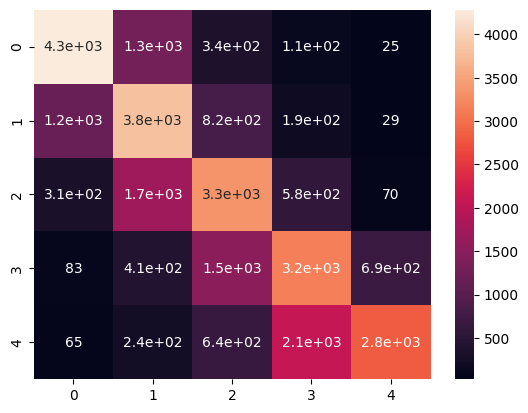

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.71      0.72      6043
           2       0.51      0.63      0.57      6003
           3       0.50      0.55      0.53      6015
           4       0.51      0.54      0.53      5846
           5       0.78      0.48      0.60      5862

    accuracy                           0.58     29769
   macro avg       0.61      0.58      0.59     29769
weighted avg       0.61      0.58      0.59     29769

F1 Score:  0.5867922530614891
ROC AUC:  0.7400005348853882
Validation acc: 0.5847

Start of epoch 10
931/931 [==============================] - 3s 3ms/step


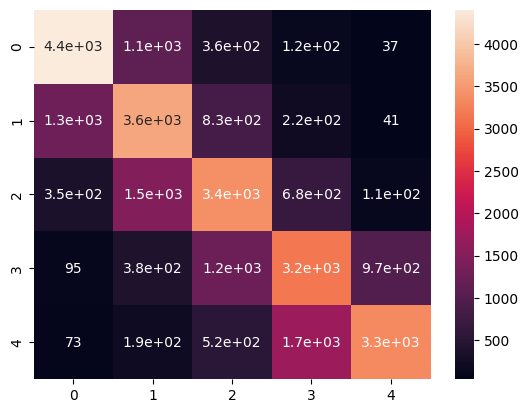

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.73      0.72      6043
           2       0.53      0.61      0.57      6003
           3       0.54      0.56      0.55      6015
           4       0.54      0.54      0.54      5846
           5       0.74      0.57      0.64      5862

    accuracy                           0.60     29769
   macro avg       0.61      0.60      0.60     29769
weighted avg       0.61      0.60      0.60     29769

F1 Score:  0.6043475968812305
ROC AUC:  0.7514679279806593
Validation acc: 0.6029


<ipython-input-25-ce22cec09ecd>:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score_all_trainings = df_score_all_trainings.append({'training': 'simple regression model', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import numpy as np

# Parameters
# max_words = 10000
# max_sequence_length = 500

# Define your model
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=128, input_length=int(max_sequence_length)))
model.add(Dropout(0.2))

model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))

model.add(LSTM(128))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))  # Output layer for regression

model.compile(loss='mean_squared_error',
              optimizer=Adam(learning_rate=0.001))

# Convert labels to float
y_train = y_train.astype(float)
y_val = y_val.astype(float)

optimizer = Adam(learning_rate=0.001)

# Define training function
def train_regression_model(model, x_train, y_train, x_val, y_val, epochs, batch_size):
    # Loss function
    loss_fn = MeanSquaredError()
    
    # Prepare the training dataset
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    # Prepare the validation dataset
    val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
    val_dataset = val_dataset.batch(batch_size)

    best_F1 = 0 
    best_roc = 0
    best_acc = 0 

    # Iterate over epochs
    for epoch in range(epochs):
        print(f'\nStart of epoch {epoch+1}')

        # Iterate over the batches of the dataset
        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                y_pred = model(x_batch_train, training=True)
                loss_value = loss_fn(y_batch_train, y_pred)
            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Run a validation loop at the end of each epoch
        val_predict = model.predict(x_val)
        val_predict = np.clip(val_predict, 1, 5)
        val_predict = np.round(val_predict).astype(int)
        val_targ = y_val.astype(int) 

        # Compute accuracy
        accuracy = np.mean(val_predict.flatten() == val_targ)

        # Compute confusion matrix
        mat = sklearn.metrics.confusion_matrix(val_targ, val_predict)
        df_cm = pd.DataFrame(mat, range(5), range(5))  
        sns.heatmap(df_cm, annot=True)
        plt.show()

        print("Classification Report:")
        print(classification_report(val_targ, val_predict))

        # Calculate F1 score
        f1 = f1_score(val_targ, val_predict, average='weighted')
        print("F1 Score: ", f1)

        # ROC AUC
        lb = LabelBinarizer()
        lb.fit(val_targ)
        val_targ_lb = lb.transform(val_targ)
        val_predict_lb = lb.transform(val_predict)

        roc_auc = roc_auc_score(val_targ_lb, val_predict_lb, multi_class="ovr")
        print("ROC AUC: ", roc_auc)

        print(f'Validation acc: {float(accuracy):.4f}')

        if roc_auc > best_roc:
          best_roc = roc_auc
          best_F1 = f1
          best_acc = accuracy

    return best_roc, best_F1, best_acc


# Call the function
best_roc, best_F1, best_acc = train_regression_model(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)
df_score_all_trainings = df_score_all_trainings.append({'training': 'simple regression model', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)

##3.3. A more complicated architecture for regression model

In [ ]:
x_train, x_val, y_train, y_val, max_words, max_sequence_length = get_regular_data(label_category='regression')

Total number of unique words: 282077
Max sequence length at 95th percentile: 238.0


In [ ]:
embedding_dim = 50

# Define model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=int(max_sequence_length)))
model.add(LSTM(128, return_sequences=True))  # LSTM layer with 128 units
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(LSTM(64))  # Another LSTM layer with 64 units
model.add(Dense(64, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(1, activation='linear'))  # Output layer

# Compile model
model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.001), 
              metrics=['mean_absolute_error'])

# Convert labels to float
y_train = y_train.astype(float)
y_val = y_val.astype(float)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Start of epoch 1
931/931 [==============================] - 7s 7ms/step


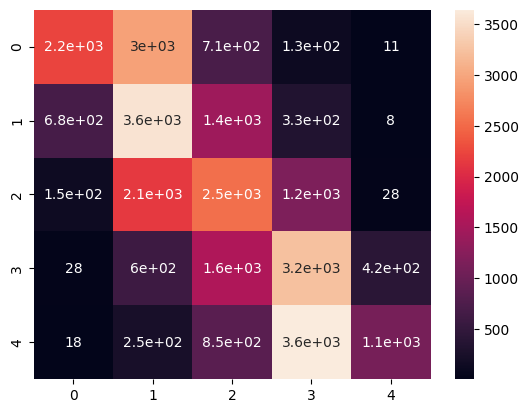

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.37      0.49      6043
           2       0.37      0.59      0.46      6003
           3       0.36      0.42      0.39      6015
           4       0.38      0.55      0.45      5846
           5       0.71      0.19      0.30      5862

    accuracy                           0.43     29769
   macro avg       0.51      0.42      0.42     29769
weighted avg       0.51      0.43      0.42     29769

F1 Score:  0.4168361954159436
ROC AUC:  0.6406241063257463
Validation acc: 0.4253

Start of epoch 2
931/931 [==============================] - 7s 8ms/step


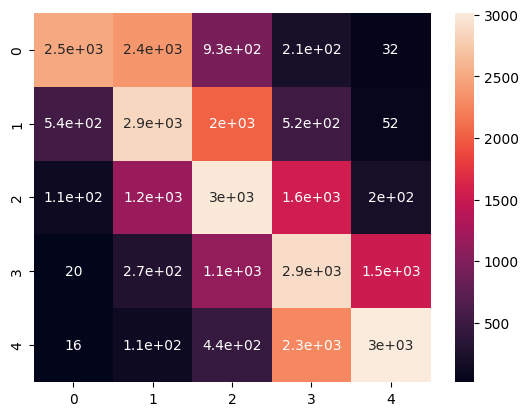

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.41      0.54      6043
           2       0.42      0.48      0.45      6003
           3       0.40      0.50      0.44      6015
           4       0.39      0.50      0.44      5846
           5       0.63      0.51      0.56      5862

    accuracy                           0.48     29769
   macro avg       0.52      0.48      0.49     29769
weighted avg       0.52      0.48      0.49     29769

F1 Score:  0.48583276804198233
ROC AUC:  0.6744751371319472
Validation acc: 0.4789

Start of epoch 3
931/931 [==============================] - 8s 8ms/step


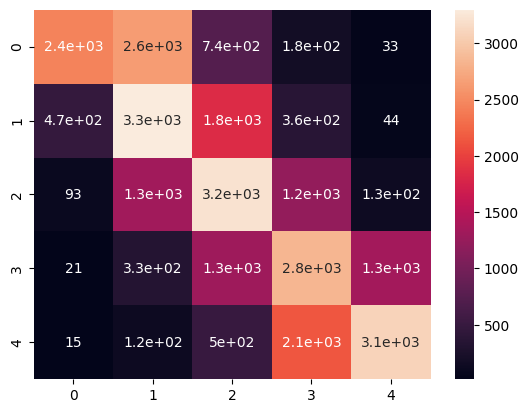

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.41      0.54      6043
           2       0.43      0.55      0.48      6003
           3       0.42      0.54      0.47      6015
           4       0.42      0.49      0.45      5846
           5       0.66      0.53      0.59      5862

    accuracy                           0.50     29769
   macro avg       0.55      0.50      0.51     29769
weighted avg       0.55      0.50      0.51     29769

F1 Score:  0.5061661575998868
ROC AUC:  0.6878254759872292
Validation acc: 0.5004

Start of epoch 4
931/931 [==============================] - 7s 7ms/step


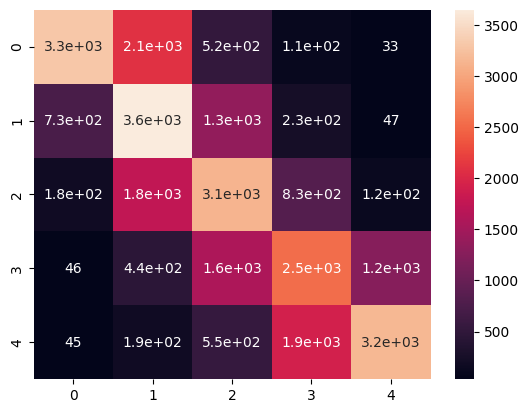

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.55      0.64      6043
           2       0.45      0.61      0.52      6003
           3       0.44      0.52      0.48      6015
           4       0.45      0.43      0.44      5846
           5       0.69      0.54      0.60      5862

    accuracy                           0.53     29769
   macro avg       0.56      0.53      0.54     29769
weighted avg       0.56      0.53      0.54     29769

F1 Score:  0.5357491258361339
ROC AUC:  0.7059156592672485
Validation acc: 0.5299

Start of epoch 5
931/931 [==============================] - 8s 9ms/step


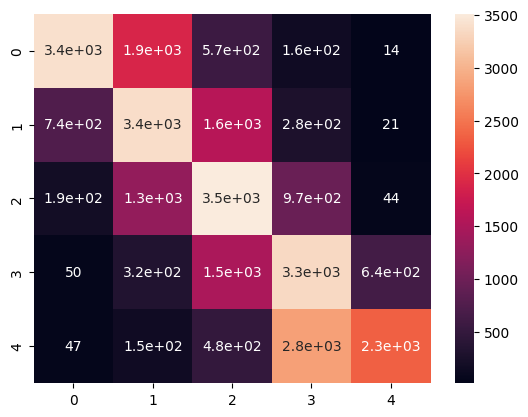

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.57      0.65      6043
           2       0.48      0.56      0.52      6003
           3       0.46      0.58      0.51      6015
           4       0.44      0.57      0.50      5846
           5       0.77      0.40      0.53      5862

    accuracy                           0.54     29769
   macro avg       0.58      0.54      0.54     29769
weighted avg       0.58      0.54      0.54     29769

F1 Score:  0.5419634047236819
ROC AUC:  0.710554633526686
Validation acc: 0.5373

Start of epoch 6
931/931 [==============================] - 7s 7ms/step


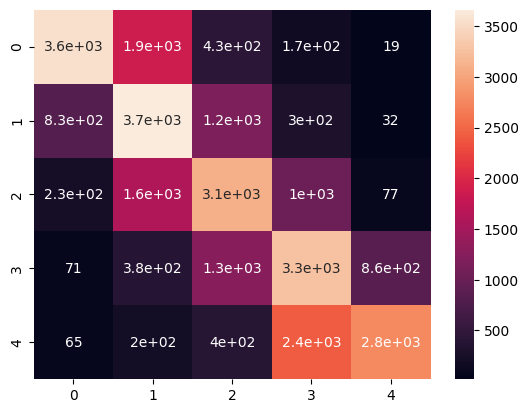

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.59      0.66      6043
           2       0.48      0.61      0.53      6003
           3       0.49      0.52      0.50      6015
           4       0.45      0.56      0.50      5846
           5       0.74      0.47      0.58      5862

    accuracy                           0.55     29769
   macro avg       0.58      0.55      0.55     29769
weighted avg       0.58      0.55      0.55     29769

F1 Score:  0.5547726174297217
ROC AUC:  0.7183669969080141
Validation acc: 0.5497

Start of epoch 7
931/931 [==============================] - 8s 8ms/step


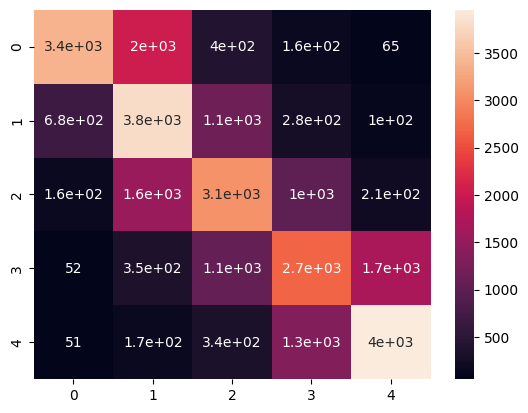

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.56      0.65      6043
           2       0.48      0.63      0.55      6003
           3       0.51      0.51      0.51      6015
           4       0.49      0.46      0.47      5846
           5       0.66      0.68      0.67      5862

    accuracy                           0.57     29769
   macro avg       0.58      0.57      0.57     29769
weighted avg       0.58      0.57      0.57     29769

F1 Score:  0.57002071363385
ROC AUC:  0.7298218846349525
Validation acc: 0.5677

Start of epoch 8
931/931 [==============================] - 7s 8ms/step


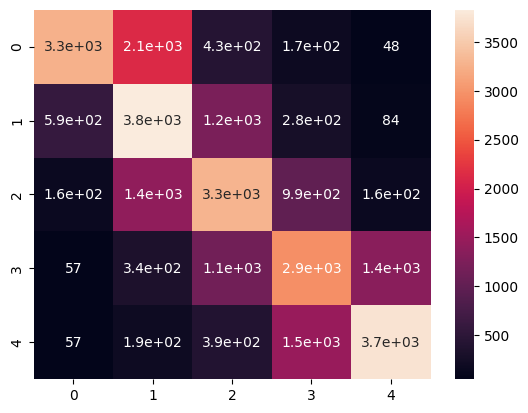

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.54      0.64      6043
           2       0.49      0.64      0.55      6003
           3       0.51      0.55      0.53      6015
           4       0.50      0.50      0.50      5846
           5       0.69      0.64      0.67      5862

    accuracy                           0.57     29769
   macro avg       0.60      0.57      0.58     29769
weighted avg       0.60      0.57      0.58     29769

F1 Score:  0.5779934896964648
ROC AUC:  0.7337173716434318
Validation acc: 0.5740

Start of epoch 9
931/931 [==============================] - 9s 9ms/step


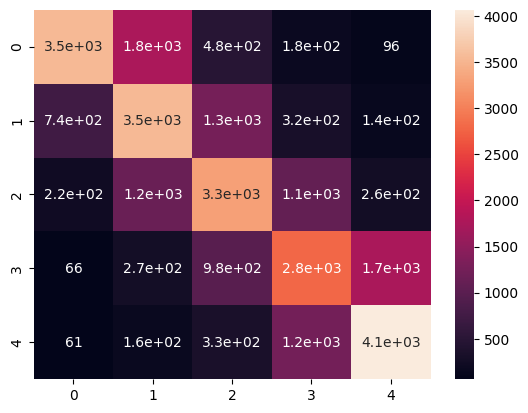

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.59      0.66      6043
           2       0.52      0.59      0.55      6003
           3       0.52      0.55      0.53      6015
           4       0.50      0.48      0.49      5846
           5       0.64      0.69      0.67      5862

    accuracy                           0.58     29769
   macro avg       0.59      0.58      0.58     29769
weighted avg       0.59      0.58      0.58     29769

F1 Score:  0.580540090682087
ROC AUC:  0.7368209723776544
Validation acc: 0.5789

Start of epoch 10
931/931 [==============================] - 7s 8ms/step


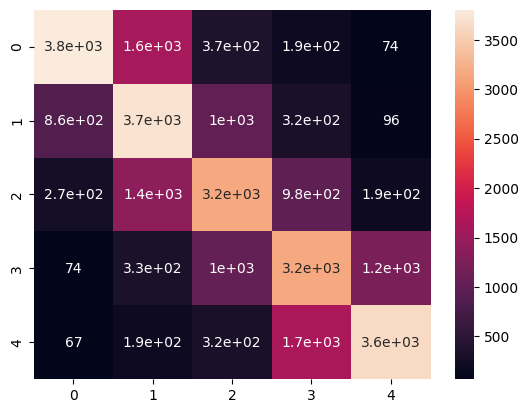

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.63      0.68      6043
           2       0.51      0.62      0.56      6003
           3       0.54      0.53      0.53      6015
           4       0.50      0.54      0.52      5846
           5       0.70      0.62      0.66      5862

    accuracy                           0.59     29769
   macro avg       0.60      0.59      0.59     29769
weighted avg       0.60      0.59      0.59     29769

F1 Score:  0.5908109765099451
ROC AUC:  0.7421498676484306
Validation acc: 0.5875


In [ ]:
best_roc, best_F1, best_acc = train_regression_model(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

In [ ]:
df_score_all_trainings = df_score_all_trainings.append({'training': 'more complicated regression model', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)

<ipython-input-29-868ffe6dc5f1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score_all_trainings = df_score_all_trainings.append({'training': 'more complicated regression model', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)


##3.4 Improving quality of data + Load pretrained network

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    
    # Remove punctuation and any other non-alphabet characters
    text = re.sub(r'[^a-z]', ' ', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return " ".join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def get_clean_data(label_category='one_hot'):
  df = pd.read_csv('/content/drive/MyDrive/Reviews.csv')

  # We create a subset: 
  df_balanced = pd.DataFrame()

  min_class_count = df['Score'].value_counts().min()
  # min_class_count = 10000

  for label in df['Score'].unique():
      df_balanced = pd.concat([df_balanced, df[df['Score'] == label].sample(min_class_count)])

  df = df_balanced[['Text', 'Score']]

  df['processed_Text'] = df['Text'].apply(preprocess_text)

  # Analyzing the number of unique words
  all_words = [word for tokens in df["processed_Text"] for word in tokens.split(" ")]
  unique_words = set(all_words)
  max_words = len(unique_words)
  print(f'Total number of unique words: {max_words}')

  # Analyzing sequence length
  sequence_lengths = [len(tokens.split(" ")) for tokens in df["processed_Text"]]
  max_sequence_length = np.percentile(sequence_lengths, 95)  # Set to the 95th percentile
  print(f'Max sequence length at 95th percentile: {max_sequence_length}')
  
  # Prepare the Tokenizer
  tokenizer = Tokenizer(num_words=max_words)
  tokenizer.fit_on_texts(df['processed_Text'])

  # Tokenize the data
  sequences = tokenizer.texts_to_sequences(df['processed_Text'])
  word_index = tokenizer.word_index

  # Ensure all sequences have the same length
  data = pad_sequences(sequences, maxlen=int(max_sequence_length))

  # Prepare labels
  if label_category == 'one_hot':
    labels = to_categorical(df['Score'] - 1)
  else: 
    labels = df['Score'].values

  x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

  return x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer

In [ ]:
x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer = get_clean_data(label_category='regression')

<ipython-input-44-6e9457d2e0ae>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_Text'] = df['Text'].apply(preprocess_text)


Total number of unique words: 57195
Max sequence length at 95th percentile: 123.0


In [ ]:
def load_glove_embeddings(file):
    embeddings = {}
    with open(file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

##3.4.1 Glove 6B + Clean data, regression 

In [ ]:
glove_embeddings = load_glove_embeddings('/content/drive/MyDrive/glove.6B.100d.txt')

In [ ]:
embedding_matrix = np.zeros((max_words, 100))  # Assuming using Glove 100d
for word, i in tokenizer.word_index.items():
    if i >= max_words:
        continue
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_dim = embedding_matrix.shape[1]

# Define model
model = Sequential()
model.add(Embedding(max_words, 
                    embedding_dim, 
                    embeddings_initializer=Constant(embedding_matrix), 
                    input_length=int(max_sequence_length), 
                    trainable=False))
model.add(LSTM(128, return_sequences=True))  # LSTM layer with 128 units
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(LSTM(64))  # LSTM layer with 64 units
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])


# Compile model
model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.001), 
              metrics=['mean_absolute_error'])

# Convert labels to float
y_train = y_train.astype(float)
y_val = y_val.astype(float)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Start of epoch 1
931/931 [==============================] - 6s 5ms/step


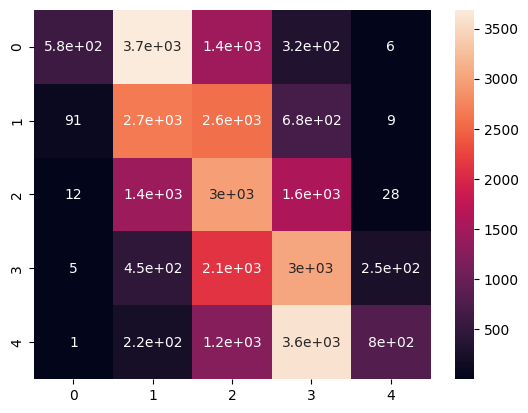

Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.10      0.17      6043
           2       0.31      0.44      0.37      6003
           3       0.29      0.49      0.36      6015
           4       0.33      0.52      0.40      5846
           5       0.73      0.14      0.23      5862

    accuracy                           0.34     29769
   macro avg       0.50      0.34      0.31     29769
weighted avg       0.50      0.34      0.31     29769

F1 Score:  0.3068296911195603
ROC AUC:  0.5858068283155238
Validation acc: 0.3371

Start of epoch 2
931/931 [==============================] - 5s 5ms/step


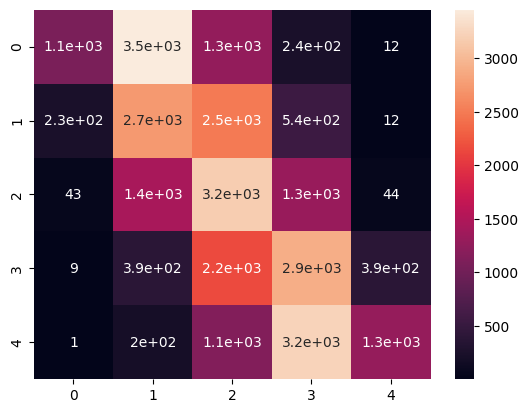

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.18      0.29      6043
           2       0.33      0.46      0.38      6003
           3       0.31      0.53      0.39      6015
           4       0.35      0.50      0.41      5846
           5       0.74      0.22      0.34      5862

    accuracy                           0.38     29769
   macro avg       0.50      0.38      0.36     29769
weighted avg       0.50      0.38      0.36     29769

F1 Score:  0.36290536787654853
ROC AUC:  0.6095295859969776
Validation acc: 0.3752

Start of epoch 3
931/931 [==============================] - 4s 5ms/step


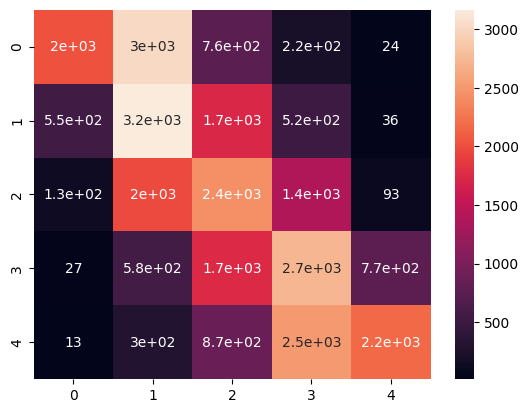

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.33      0.46      6043
           2       0.35      0.53      0.42      6003
           3       0.32      0.40      0.36      6015
           4       0.37      0.47      0.41      5846
           5       0.70      0.37      0.48      5862

    accuracy                           0.42     29769
   macro avg       0.50      0.42      0.43     29769
weighted avg       0.50      0.42      0.43     29769

F1 Score:  0.4272451343819539
ROC AUC:  0.6377374717644232
Validation acc: 0.4203

Start of epoch 4
931/931 [==============================] - 5s 5ms/step


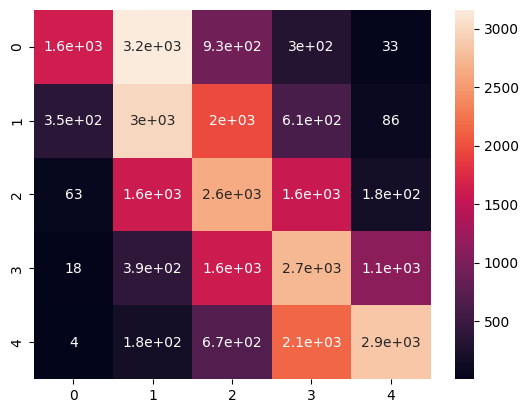

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.27      0.40      6043
           2       0.36      0.50      0.42      6003
           3       0.34      0.44      0.38      6015
           4       0.37      0.47      0.41      5846
           5       0.67      0.49      0.57      5862

    accuracy                           0.43     29769
   macro avg       0.51      0.43      0.44     29769
weighted avg       0.51      0.43      0.44     29769

F1 Score:  0.4351589200371309
ROC AUC:  0.6448949097704213
Validation acc: 0.4313

Start of epoch 5
931/931 [==============================] - 5s 5ms/step


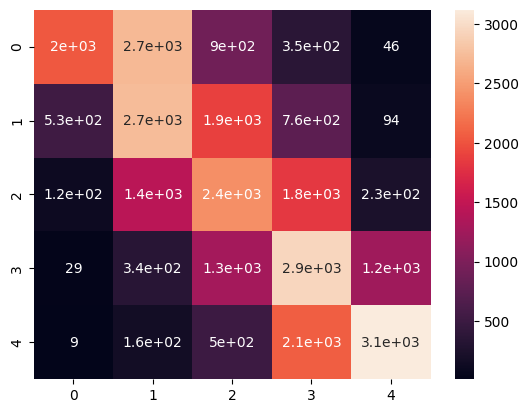

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.34      0.46      6043
           2       0.37      0.46      0.41      6003
           3       0.34      0.40      0.37      6015
           4       0.37      0.50      0.43      5846
           5       0.66      0.53      0.59      5862

    accuracy                           0.45     29769
   macro avg       0.50      0.45      0.45     29769
weighted avg       0.50      0.45      0.45     29769

F1 Score:  0.45157713346834577
ROC AUC:  0.6536449783227807
Validation acc: 0.4451

Start of epoch 6
931/931 [==============================] - 5s 5ms/step


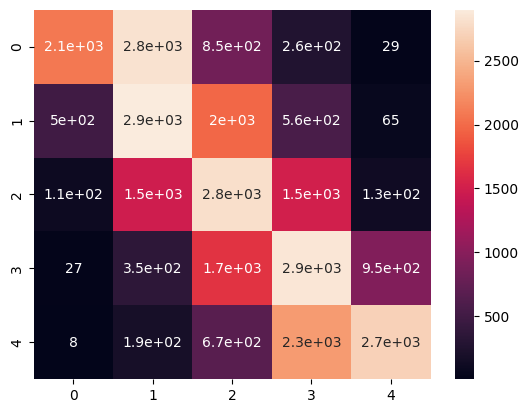

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.34      0.48      6043
           2       0.37      0.48      0.42      6003
           3       0.35      0.47      0.40      6015
           4       0.38      0.49      0.43      5846
           5       0.70      0.46      0.55      5862

    accuracy                           0.45     29769
   macro avg       0.51      0.45      0.46     29769
weighted avg       0.51      0.45      0.46     29769

F1 Score:  0.4557633414365636
ROC AUC:  0.6551261950967199
Validation acc: 0.4479

Start of epoch 7
931/931 [==============================] - 5s 6ms/step


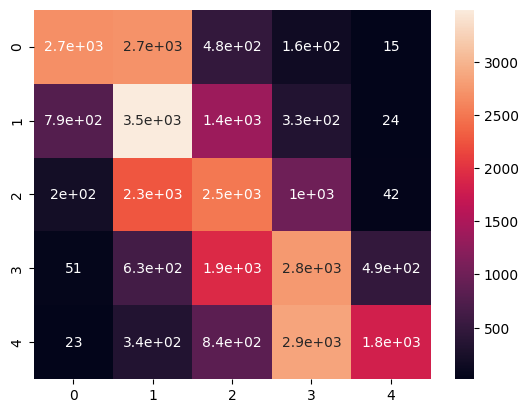

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.44      0.55      6043
           2       0.37      0.58      0.45      6003
           3       0.35      0.42      0.38      6015
           4       0.39      0.47      0.43      5846
           5       0.76      0.31      0.44      5862

    accuracy                           0.45     29769
   macro avg       0.52      0.44      0.45     29769
weighted avg       0.52      0.45      0.45     29769

F1 Score:  0.44986878021262033
ROC AUC:  0.6528755974680973
Validation acc: 0.4450

Start of epoch 8
931/931 [==============================] - 5s 5ms/step


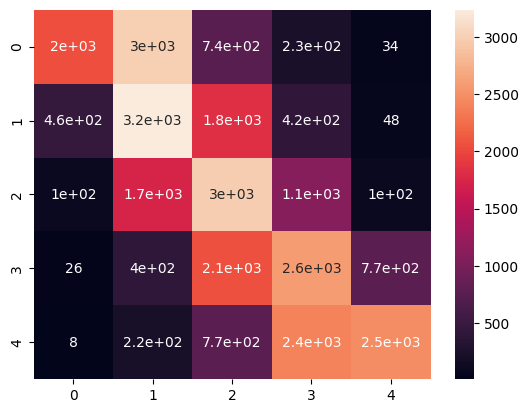

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.34      0.47      6043
           2       0.38      0.54      0.44      6003
           3       0.35      0.49      0.41      6015
           4       0.38      0.44      0.41      5846
           5       0.72      0.42      0.53      5862

    accuracy                           0.45     29769
   macro avg       0.52      0.45      0.45     29769
weighted avg       0.52      0.45      0.45     29769

F1 Score:  0.454020034612507
ROC AUC:  0.6544776770233782
Validation acc: 0.4472

Start of epoch 9
931/931 [==============================] - 4s 5ms/step


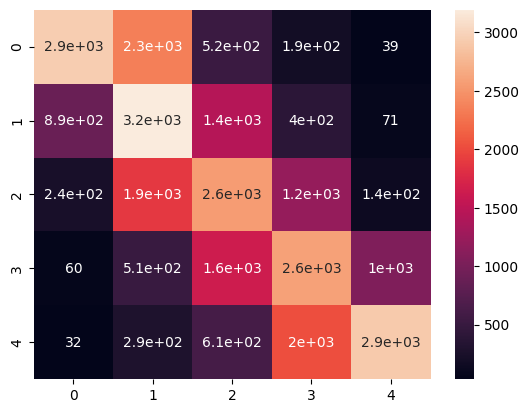

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.49      0.58      6043
           2       0.39      0.53      0.45      6003
           3       0.38      0.42      0.40      6015
           4       0.40      0.44      0.42      5846
           5       0.69      0.50      0.58      5862

    accuracy                           0.48     29769
   macro avg       0.51      0.48      0.49     29769
weighted avg       0.51      0.48      0.49     29769

F1 Score:  0.4854638173927748
ROC AUC:  0.6730570216177275
Validation acc: 0.4770

Start of epoch 10
931/931 [==============================] - 5s 5ms/step


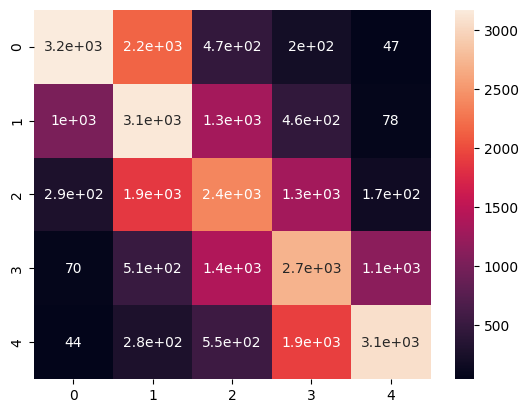

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.52      0.60      6043
           2       0.39      0.52      0.45      6003
           3       0.39      0.40      0.39      6015
           4       0.41      0.46      0.44      5846
           5       0.68      0.52      0.59      5862

    accuracy                           0.49     29769
   macro avg       0.51      0.49      0.49     29769
weighted avg       0.51      0.49      0.49     29769

F1 Score:  0.4937329207665028
ROC AUC:  0.6791493228596193
Validation acc: 0.4866


In [ ]:
best_roc, best_F1, best_acc = train_regression_model(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

In [ ]:
df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove 6B + Clean data, regression', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)

<ipython-input-51-b2bc4082fcbe>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove 6B + Clean data, regression', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)


##3.4.2. Glove 6B + Clean data, regression, added some dropout

In [ ]:
x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer = get_clean_data(label_category='regression')

<ipython-input-44-6e9457d2e0ae>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_Text'] = df['Text'].apply(preprocess_text)


Total number of unique words: 57175
Max sequence length at 95th percentile: 123.0


In [ ]:
embedding_dim = 50

# Define model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=int(max_sequence_length)))
model.add(LSTM(128, return_sequences=True))  # LSTM layer with 128 units
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(LSTM(64))  # Another LSTM layer with 64 units
model.add(Dense(64, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(1, activation='linear'))  # Output layer

# Compile model
model.compile(loss='mean_squared_error',
              optimizer=Adam(lr=0.001), 
              metrics=['mean_absolute_error'])

# Convert labels to float
y_train = y_train.astype(float)
y_val = y_val.astype(float)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)



Start of epoch 1
931/931 [==============================] - 7s 6ms/step


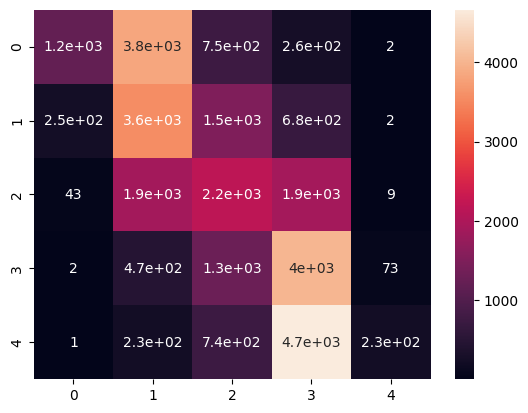

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.20      0.32      6043
           2       0.36      0.59      0.45      6003
           3       0.34      0.36      0.35      6015
           4       0.35      0.69      0.46      5846
           5       0.73      0.04      0.07      5862

    accuracy                           0.38     29769
   macro avg       0.51      0.38      0.33     29769
weighted avg       0.51      0.38      0.33     29769

F1 Score:  0.330009108015952
ROC AUC:  0.6097360532332405
Validation acc: 0.3753

Start of epoch 2
931/931 [==============================] - 4s 5ms/step


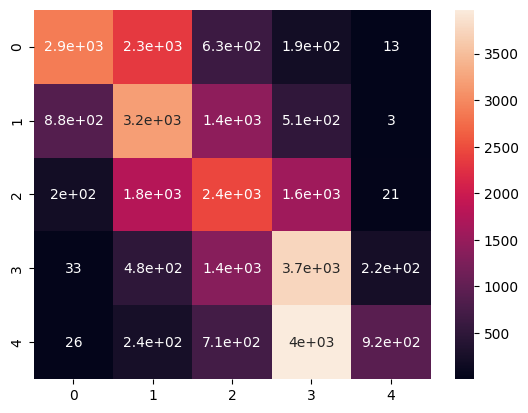

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.48      0.57      6043
           2       0.40      0.53      0.45      6003
           3       0.37      0.41      0.39      6015
           4       0.37      0.64      0.47      5846
           5       0.78      0.16      0.26      5862

    accuracy                           0.44     29769
   macro avg       0.53      0.44      0.43     29769
weighted avg       0.53      0.44      0.43     29769

F1 Score:  0.43067170439445596
ROC AUC:  0.6513739033255678
Validation acc: 0.4424

Start of epoch 3
931/931 [==============================] - 5s 6ms/step


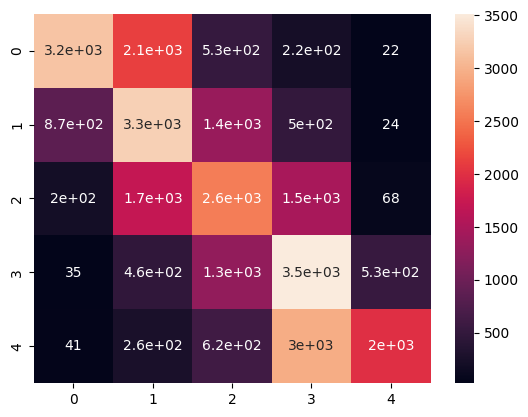

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.52      0.61      6043
           2       0.42      0.54      0.47      6003
           3       0.40      0.43      0.41      6015
           4       0.41      0.60      0.48      5846
           5       0.76      0.34      0.47      5862

    accuracy                           0.49     29769
   macro avg       0.54      0.49      0.49     29769
weighted avg       0.54      0.49      0.49     29769

F1 Score:  0.4906383200155858
ROC AUC:  0.679357754912854
Validation acc: 0.4871

Start of epoch 4
931/931 [==============================] - 4s 5ms/step


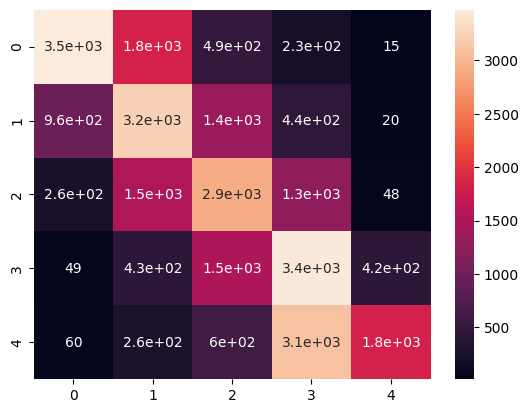

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.58      0.64      6043
           2       0.44      0.54      0.49      6003
           3       0.43      0.49      0.45      6015
           4       0.41      0.59      0.48      5846
           5       0.78      0.31      0.45      5862

    accuracy                           0.50     29769
   macro avg       0.56      0.50      0.50     29769
weighted avg       0.56      0.50      0.50     29769

F1 Score:  0.5021771650316481
ROC AUC:  0.6876379956928157
Validation acc: 0.5006

Start of epoch 5
931/931 [==============================] - 6s 6ms/step


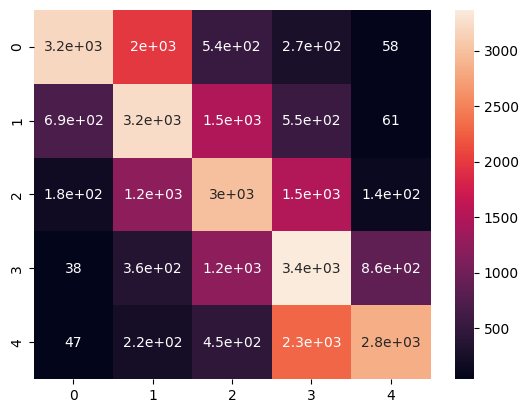

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.53      0.63      6043
           2       0.46      0.54      0.50      6003
           3       0.45      0.50      0.47      6015
           4       0.42      0.58      0.49      5846
           5       0.72      0.49      0.58      5862

    accuracy                           0.52     29769
   macro avg       0.56      0.52      0.53     29769
weighted avg       0.56      0.52      0.53     29769

F1 Score:  0.5318045399779923
ROC AUC:  0.7028176587062054
Validation acc: 0.5244

Start of epoch 6
931/931 [==============================] - 4s 5ms/step


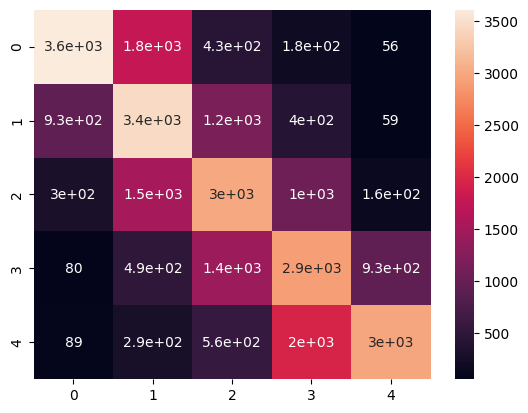

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.60      0.65      6043
           2       0.46      0.57      0.51      6003
           3       0.45      0.50      0.47      6015
           4       0.45      0.50      0.47      5846
           5       0.71      0.51      0.59      5862

    accuracy                           0.54     29769
   macro avg       0.56      0.53      0.54     29769
weighted avg       0.56      0.54      0.54     29769

F1 Score:  0.5406291263901406
ROC AUC:  0.7092030552365644
Validation acc: 0.5351

Start of epoch 7
931/931 [==============================] - 6s 6ms/step


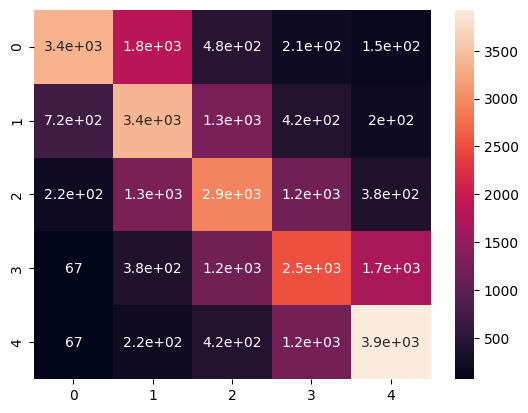

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.56      0.64      6043
           2       0.48      0.56      0.52      6003
           3       0.47      0.49      0.48      6015
           4       0.45      0.43      0.44      5846
           5       0.62      0.67      0.64      5862

    accuracy                           0.54     29769
   macro avg       0.55      0.54      0.54     29769
weighted avg       0.55      0.54      0.54     29769

F1 Score:  0.54444480400745
ROC AUC:  0.7139623754760956
Validation acc: 0.5423

Start of epoch 8
931/931 [==============================] - 4s 5ms/step


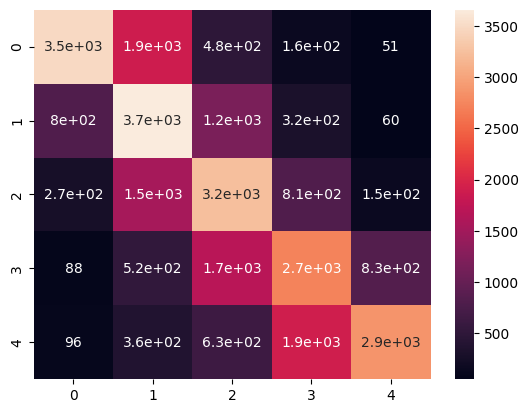

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.58      0.65      6043
           2       0.46      0.61      0.52      6003
           3       0.45      0.54      0.49      6015
           4       0.46      0.46      0.46      5846
           5       0.72      0.49      0.58      5862

    accuracy                           0.54     29769
   macro avg       0.57      0.54      0.54     29769
weighted avg       0.57      0.54      0.54     29769

F1 Score:  0.5414378651950805
ROC AUC:  0.7097121317031627
Validation acc: 0.5361

Start of epoch 9
931/931 [==============================] - 6s 6ms/step


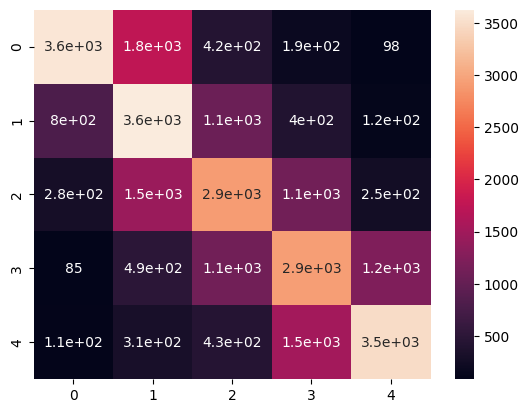

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.59      0.66      6043
           2       0.47      0.60      0.53      6003
           3       0.49      0.48      0.49      6015
           4       0.48      0.50      0.49      5846
           5       0.67      0.59      0.63      5862

    accuracy                           0.56     29769
   macro avg       0.57      0.56      0.56     29769
weighted avg       0.57      0.56      0.56     29769

F1 Score:  0.5590262637357343
ROC AUC:  0.721965066286605
Validation acc: 0.5552

Start of epoch 10
931/931 [==============================] - 5s 6ms/step


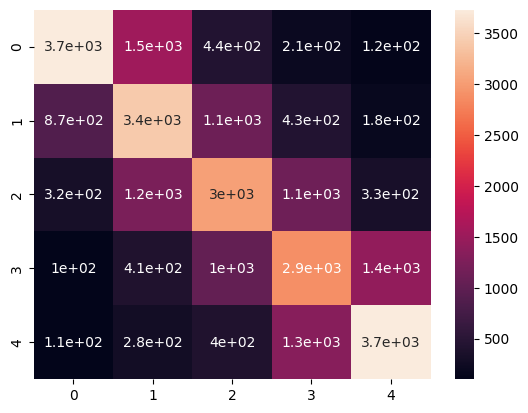

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.62      0.67      6043
           2       0.50      0.57      0.53      6003
           3       0.50      0.50      0.50      6015
           4       0.48      0.49      0.49      5846
           5       0.64      0.64      0.64      5862

    accuracy                           0.56     29769
   macro avg       0.57      0.56      0.57     29769
weighted avg       0.57      0.56      0.57     29769

F1 Score:  0.5654540432827521
ROC AUC:  0.7268875328343065
Validation acc: 0.5631


In [ ]:
best_roc, best_F1, best_acc = train_regression_model(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

In [ ]:
df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove 6B + Clean data, regression + dropout', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)

<ipython-input-55-421808094742>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove 6B + Clean data, regression + dropout', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)


##3.5. Using classification instead of regression

In [ ]:
x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer = get_regular_data(label_category='one_hot')

Total number of unique words: 281433
Max sequence length at 95th percentile: 238.0


In [ ]:
glove_embeddings = load_glove_embeddings('/content/drive/MyDrive/glove.6B.100d.txt')

In [ ]:
embedding_matrix = np.zeros((max_words, 100))  # Assuming using Glove 100d
for word, i in tokenizer.word_index.items():
    if i >= max_words:
        continue
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_dim = embedding_matrix.shape[1]

# Define model
model = Sequential()
model.add(Embedding(max_words, 
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=int(max_sequence_length),
                    trainable=False))
model.add(Bidirectional(LSTM(256, return_sequences=True)))  
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Convert labels to float
y_train = y_train.astype(float)
y_val = y_val.astype(float)

In [ ]:
def train_model_updated(model, x_train, y_train, x_val, y_val, epochs, batch_size):
    # Loss function
    loss_fn = MeanSquaredError()

    # Prepare the training dataset
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    # Prepare the validation dataset
    val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
    val_dataset = val_dataset.batch(batch_size)


    best_F1 = 0 
    best_roc = 0
    best_acc = 0 

    # Iterate over epochs
    for epoch in range(epochs):
        print(f'\nStart of epoch {epoch+1}')

        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                y_pred = model(x_batch_train, training=True)
                loss_value = loss_fn(y_batch_train, y_pred)
            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

        val_targ = np.argmax(y_val, axis=1) + 1
        val_predict = np.argmax(model.predict(x_val), axis=1) + 1

        # Compute accuracy
        accuracy = np.mean(val_predict.flatten() == val_targ)

        # Compute confusion matrix
        mat = sklearn.metrics.confusion_matrix(val_targ, val_predict)
        df_cm = pd.DataFrame(mat, range(5), range(5))
        sns.heatmap(df_cm, annot=True)
        plt.show()

        print("Classification Report:")
        print(classification_report(val_targ, val_predict))

        # Calculate F1 score
        f1 = f1_score(val_targ, val_predict, average='weighted')
        print("F1 Score: ", f1)

        # ROC AUC
        lb = LabelBinarizer()
        lb.fit(val_targ)
        val_targ_lb = lb.transform(val_targ)
        val_predict_lb = lb.transform(val_predict)

        roc_auc = roc_auc_score(val_targ_lb, val_predict_lb, multi_class="ovr")
        print("ROC AUC: ", roc_auc)

        print(f'Validation acc: {float(accuracy):.4f}')

        if roc_auc > best_roc:
          best_roc = roc_auc
          best_F1 = f1
          best_acc = accuracy

    return best_roc, best_F1, best_acc

##3.5.1. Classification, Glove, regular data


Start of epoch 1
931/931 [==============================] - 11s 11ms/step


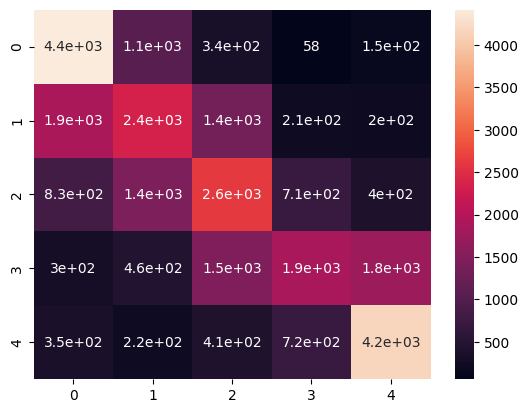

Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.73      0.64      6043
           2       0.42      0.39      0.41      6003
           3       0.42      0.44      0.43      6015
           4       0.52      0.32      0.40      5846
           5       0.63      0.71      0.67      5862

    accuracy                           0.52     29769
   macro avg       0.51      0.52      0.51     29769
weighted avg       0.51      0.52      0.51     29769

F1 Score:  0.507690176729756
ROC AUC:  0.6987983249720131
Validation acc: 0.5185

Start of epoch 2
931/931 [==============================] - 10s 11ms/step


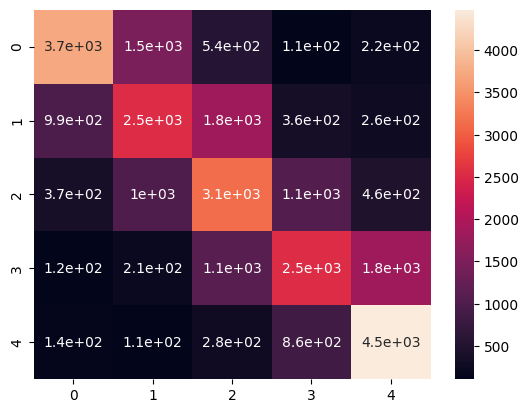

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.62      0.65      6043
           2       0.48      0.42      0.45      6003
           3       0.45      0.52      0.48      6015
           4       0.52      0.43      0.47      5846
           5       0.62      0.76      0.68      5862

    accuracy                           0.55     29769
   macro avg       0.55      0.55      0.55     29769
weighted avg       0.55      0.55      0.55     29769

F1 Score:  0.5482762393962382
ROC AUC:  0.7198728360383146
Validation acc: 0.5515

Start of epoch 3
931/931 [==============================] - 10s 11ms/step


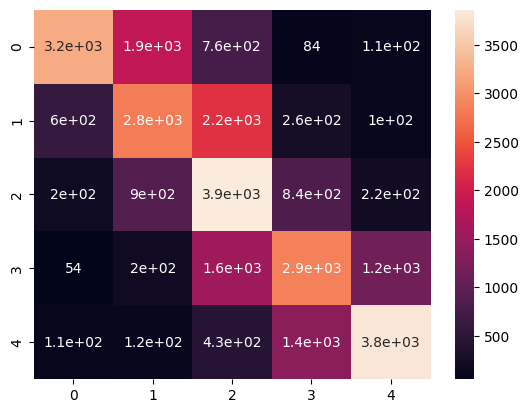

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.54      0.63      6043
           2       0.48      0.47      0.47      6003
           3       0.44      0.64      0.52      6015
           4       0.53      0.49      0.51      5846
           5       0.70      0.65      0.68      5862

    accuracy                           0.56     29769
   macro avg       0.58      0.56      0.56     29769
weighted avg       0.58      0.56      0.56     29769

F1 Score:  0.5616222070040042
ROC AUC:  0.723216418967837
Validation acc: 0.5571

Start of epoch 4
931/931 [==============================] - 10s 11ms/step


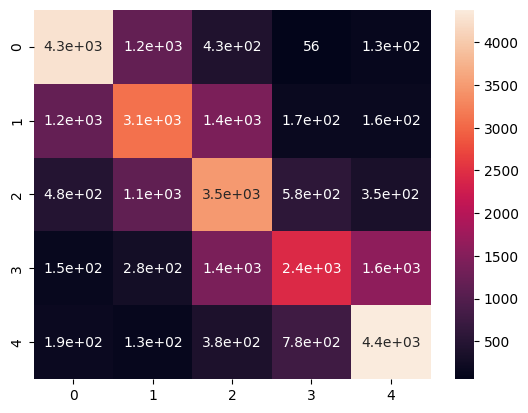

Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.71      0.69      6043
           2       0.53      0.52      0.52      6003
           3       0.49      0.58      0.53      6015
           4       0.61      0.41      0.49      5846
           5       0.66      0.75      0.70      5862

    accuracy                           0.59     29769
   macro avg       0.59      0.59      0.59     29769
weighted avg       0.59      0.59      0.59     29769

F1 Score:  0.5886702352710771
ROC AUC:  0.7451909007352346
Validation acc: 0.5926

Start of epoch 5
931/931 [==============================] - 10s 11ms/step


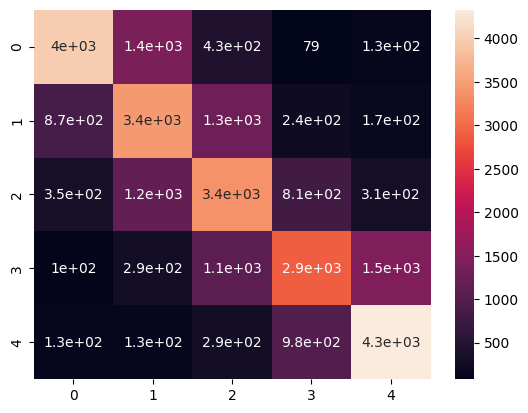

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.66      0.70      6043
           2       0.53      0.57      0.55      6003
           3       0.52      0.56      0.54      6015
           4       0.58      0.50      0.53      5846
           5       0.68      0.74      0.71      5862

    accuracy                           0.61     29769
   macro avg       0.61      0.61      0.61     29769
weighted avg       0.61      0.61      0.61     29769

F1 Score:  0.6060028855361761
ROC AUC:  0.7537996896557554
Validation acc: 0.6061

Start of epoch 6
931/931 [==============================] - 10s 11ms/step


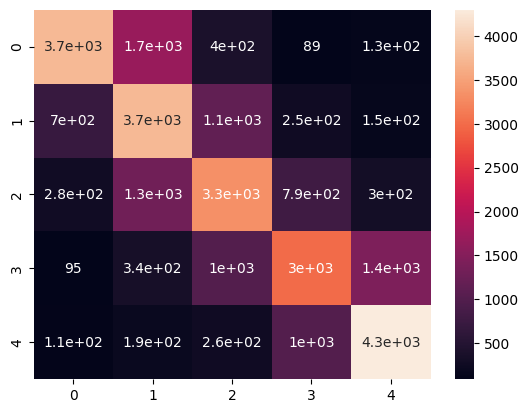

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.62      0.68      6043
           2       0.52      0.62      0.56      6003
           3       0.54      0.56      0.55      6015
           4       0.58      0.51      0.54      5846
           5       0.68      0.73      0.71      5862

    accuracy                           0.61     29769
   macro avg       0.62      0.61      0.61     29769
weighted avg       0.62      0.61      0.61     29769

F1 Score:  0.6095647392233801
ROC AUC:  0.7554224722695917
Validation acc: 0.6086

Start of epoch 7
931/931 [==============================] - 10s 11ms/step


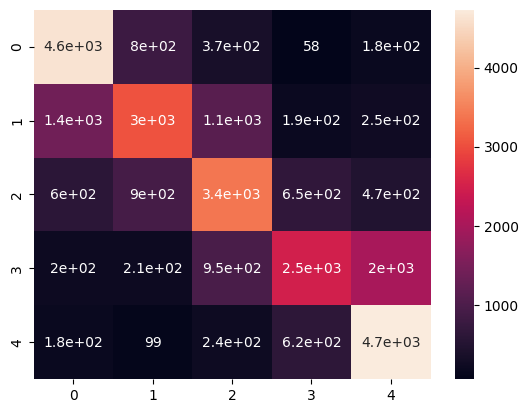

Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.77      0.71      6043
           2       0.60      0.51      0.55      6003
           3       0.56      0.56      0.56      6015
           4       0.62      0.42      0.50      5846
           5       0.62      0.81      0.70      5862

    accuracy                           0.61     29769
   macro avg       0.61      0.61      0.61     29769
weighted avg       0.61      0.61      0.61     29769

F1 Score:  0.6054377032217143
ROC AUC:  0.7586028980067988
Validation acc: 0.6140

Start of epoch 8
931/931 [==============================] - 10s 11ms/step


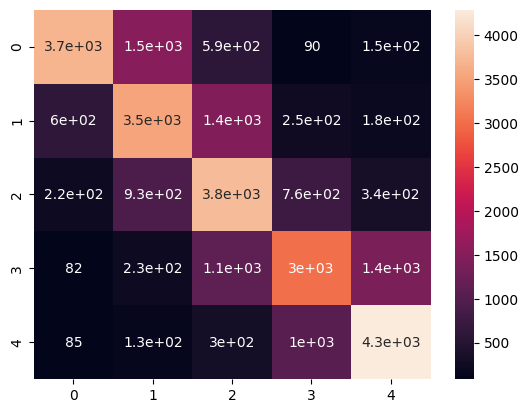

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.61      0.69      6043
           2       0.56      0.59      0.57      6003
           3       0.52      0.63      0.57      6015
           4       0.58      0.52      0.55      5846
           5       0.67      0.73      0.70      5862

    accuracy                           0.61     29769
   macro avg       0.63      0.61      0.62     29769
weighted avg       0.63      0.61      0.62     29769

F1 Score:  0.6159782946752917
ROC AUC:  0.759158376795632
Validation acc: 0.6146

Start of epoch 9
931/931 [==============================] - 11s 11ms/step


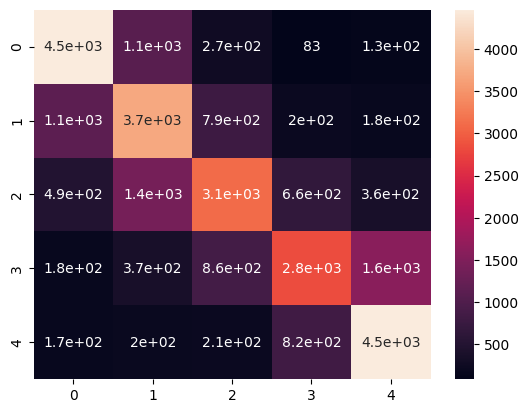

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.74      0.72      6043
           2       0.55      0.62      0.58      6003
           3       0.59      0.52      0.55      6015
           4       0.62      0.48      0.54      5846
           5       0.66      0.76      0.71      5862

    accuracy                           0.62     29769
   macro avg       0.62      0.62      0.62     29769
weighted avg       0.62      0.62      0.62     29769

F1 Score:  0.6199752832774346
ROC AUC:  0.7648317513564209
Validation acc: 0.6239

Start of epoch 10
931/931 [==============================] - 11s 11ms/step


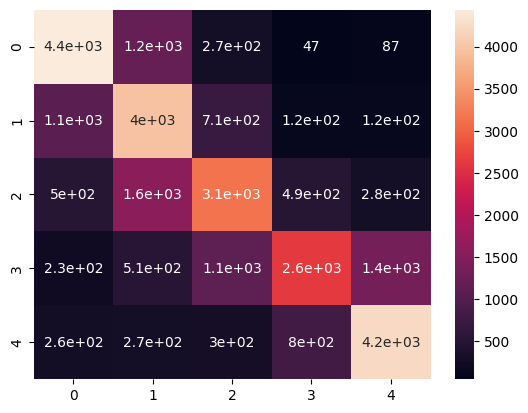

Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.73      0.71      6043
           2       0.53      0.66      0.58      6003
           3       0.57      0.52      0.54      6015
           4       0.64      0.45      0.53      5846
           5       0.70      0.72      0.71      5862

    accuracy                           0.62     29769
   macro avg       0.62      0.62      0.61     29769
weighted avg       0.62      0.62      0.61     29769

F1 Score:  0.6146489254287179
ROC AUC:  0.7609342841017085
Validation acc: 0.6180

Start of epoch 11
931/931 [==============================] - 11s 11ms/step


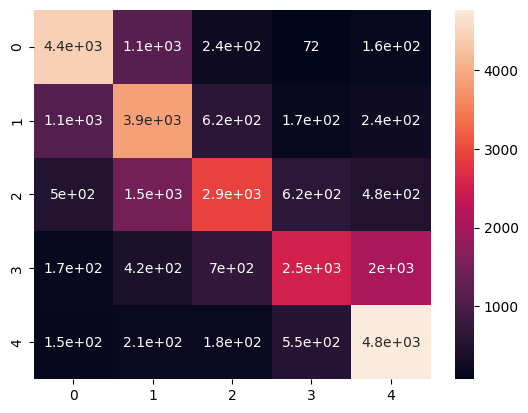

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.73      0.71      6043
           2       0.54      0.64      0.59      6003
           3       0.63      0.49      0.55      6015
           4       0.64      0.43      0.52      5846
           5       0.62      0.81      0.70      5862

    accuracy                           0.62     29769
   macro avg       0.63      0.62      0.61     29769
weighted avg       0.63      0.62      0.61     29769

F1 Score:  0.6147457559197295
ROC AUC:  0.7637503714326037
Validation acc: 0.6222

Start of epoch 12
931/931 [==============================] - 15s 16ms/step


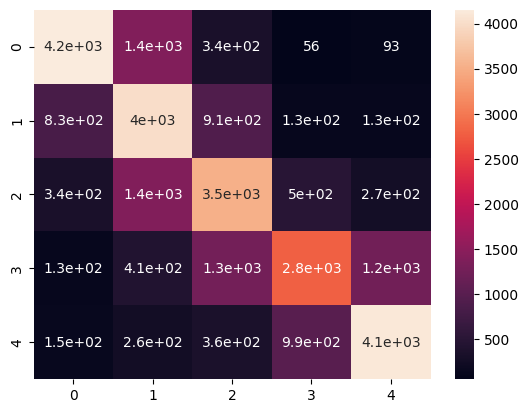

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.69      0.71      6043
           2       0.54      0.67      0.59      6003
           3       0.55      0.59      0.57      6015
           4       0.63      0.48      0.54      5846
           5       0.70      0.70      0.70      5862

    accuracy                           0.62     29769
   macro avg       0.63      0.62      0.62     29769
weighted avg       0.63      0.62      0.62     29769

F1 Score:  0.6241452167344129
ROC AUC:  0.7649113547421885
Validation acc: 0.6243

Start of epoch 13
931/931 [==============================] - 11s 11ms/step


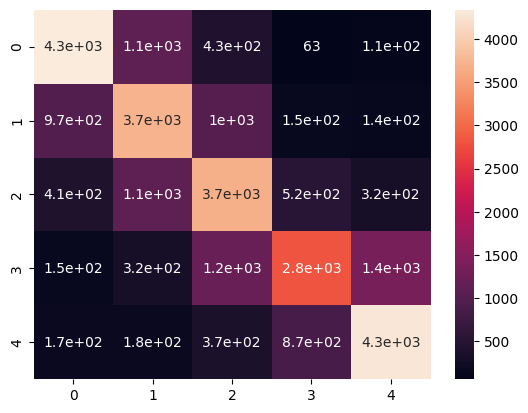

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.72      0.72      6043
           2       0.58      0.62      0.60      6003
           3       0.55      0.61      0.58      6015
           4       0.64      0.48      0.55      5846
           5       0.69      0.73      0.71      5862

    accuracy                           0.63     29769
   macro avg       0.63      0.63      0.63     29769
weighted avg       0.63      0.63      0.63     29769

F1 Score:  0.6308607368733192
ROC AUC:  0.7700352742750404
Validation acc: 0.6324

Start of epoch 14
931/931 [==============================] - 11s 11ms/step


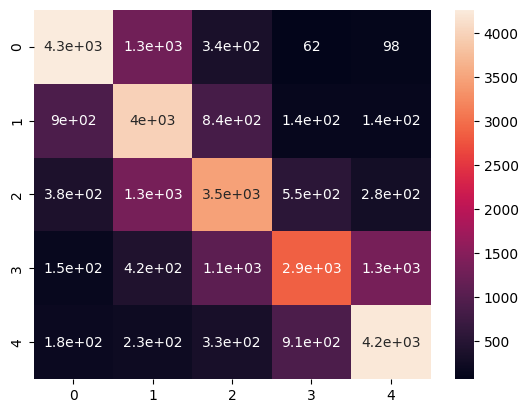

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.71      0.71      6043
           2       0.55      0.66      0.60      6003
           3       0.57      0.58      0.57      6015
           4       0.63      0.49      0.55      5846
           5       0.69      0.72      0.71      5862

    accuracy                           0.63     29769
   macro avg       0.63      0.63      0.63     29769
weighted avg       0.63      0.63      0.63     29769

F1 Score:  0.6298922169656728
ROC AUC:  0.7691861867200687
Validation acc: 0.6311

Start of epoch 15
931/931 [==============================] - 11s 11ms/step


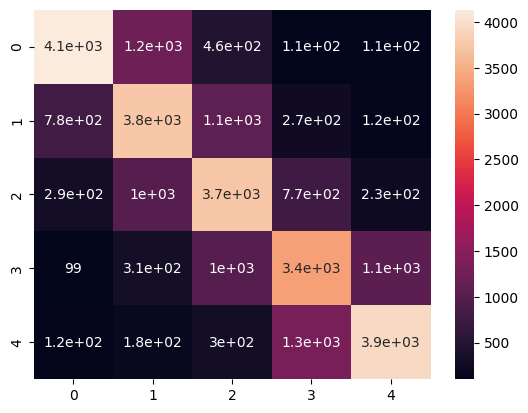

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.68      0.72      6043
           2       0.58      0.62      0.60      6003
           3       0.57      0.62      0.59      6015
           4       0.58      0.57      0.57      5846
           5       0.72      0.67      0.69      5862

    accuracy                           0.63     29769
   macro avg       0.64      0.63      0.64     29769
weighted avg       0.64      0.63      0.64     29769

F1 Score:  0.6369307624488199
ROC AUC:  0.7717614673557682
Validation acc: 0.6350

Start of epoch 16
931/931 [==============================] - 11s 11ms/step


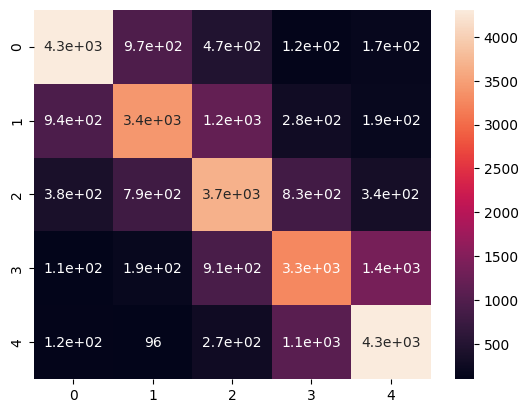

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.71      0.72      6043
           2       0.63      0.57      0.60      6003
           3       0.57      0.61      0.59      6015
           4       0.59      0.56      0.57      5846
           5       0.67      0.73      0.70      5862

    accuracy                           0.64     29769
   macro avg       0.64      0.64      0.64     29769
weighted avg       0.64      0.64      0.64     29769

F1 Score:  0.6366959529784088
ROC AUC:  0.7732770186685496
Validation acc: 0.6373

Start of epoch 17
931/931 [==============================] - 11s 11ms/step


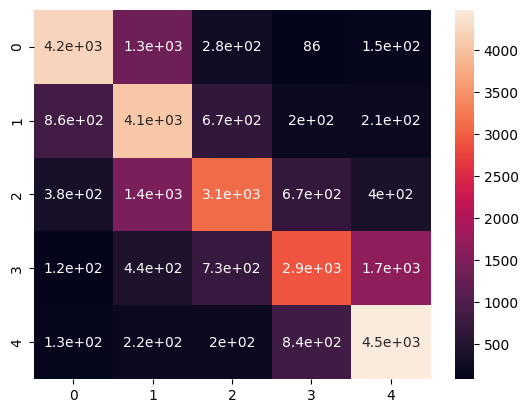

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.70      0.72      6043
           2       0.54      0.68      0.60      6003
           3       0.62      0.52      0.57      6015
           4       0.62      0.50      0.55      5846
           5       0.65      0.76      0.70      5862

    accuracy                           0.63     29769
   macro avg       0.63      0.63      0.63     29769
weighted avg       0.64      0.63      0.63     29769

F1 Score:  0.628122921034948
ROC AUC:  0.7691856209625506
Validation acc: 0.6308

Start of epoch 18
931/931 [==============================] - 11s 11ms/step


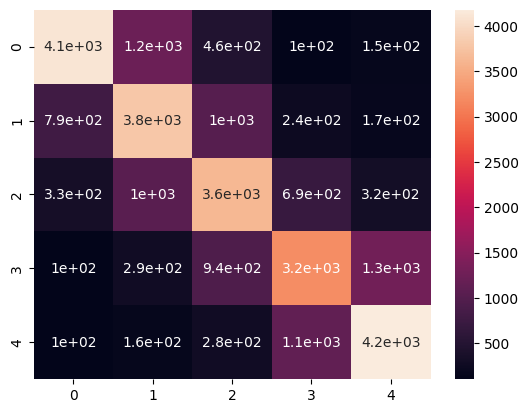

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.68      0.72      6043
           2       0.58      0.63      0.61      6003
           3       0.57      0.60      0.59      6015
           4       0.60      0.55      0.57      5846
           5       0.68      0.71      0.70      5862

    accuracy                           0.64     29769
   macro avg       0.64      0.64      0.64     29769
weighted avg       0.64      0.64      0.64     29769

F1 Score:  0.6367086013925239
ROC AUC:  0.7725167425548704
Validation acc: 0.6361

Start of epoch 19
931/931 [==============================] - 11s 11ms/step


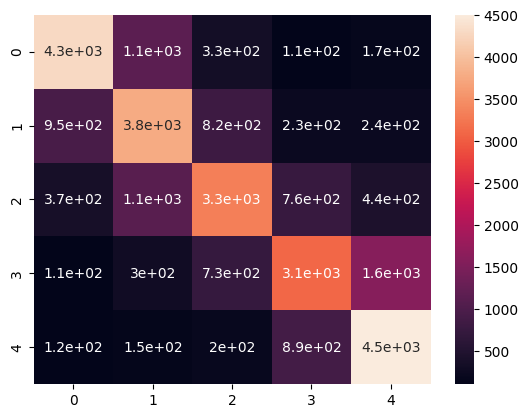

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.71      0.72      6043
           2       0.58      0.63      0.60      6003
           3       0.61      0.55      0.58      6015
           4       0.61      0.53      0.57      5846
           5       0.65      0.77      0.70      5862

    accuracy                           0.64     29769
   macro avg       0.64      0.64      0.64     29769
weighted avg       0.64      0.64      0.64     29769

F1 Score:  0.636154257478872
ROC AUC:  0.773886497528644
Validation acc: 0.6382

Start of epoch 20
931/931 [==============================] - 11s 11ms/step


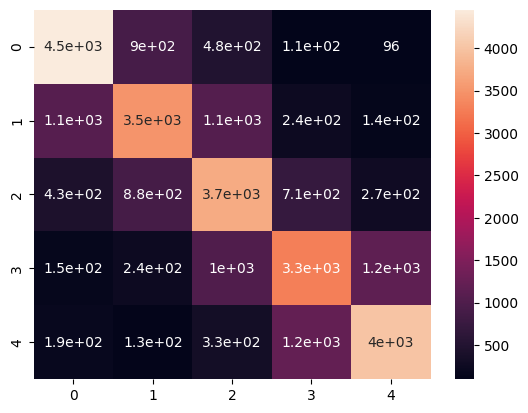

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.74      0.72      6043
           2       0.62      0.58      0.60      6003
           3       0.56      0.62      0.59      6015
           4       0.59      0.56      0.58      5846
           5       0.71      0.68      0.69      5862

    accuracy                           0.64     29769
   macro avg       0.64      0.64      0.64     29769
weighted avg       0.64      0.64      0.64     29769

F1 Score:  0.6368568238122191
ROC AUC:  0.7730105511983609
Validation acc: 0.6371


In [ ]:
best_roc, best_F1, best_acc = train_model_updated(model, x_train, y_train, x_val, y_val, epochs=20, batch_size=128)

In [ ]:
df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove 6B + Clean data, classification', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)

<ipython-input-63-584ac5d588f9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove 6B + Clean data, classification', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)


##3.5.1. Classification, Glove + preprocess data

In [ ]:
x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer = get_clean_data(label_category='one_hot')

<ipython-input-44-6e9457d2e0ae>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_Text'] = df['Text'].apply(preprocess_text)


Total number of unique words: 57220
Max sequence length at 95th percentile: 123.0


In [ ]:
glove_embeddings = load_glove_embeddings('/content/drive/MyDrive/glove.6B.100d.txt')

In [ ]:
embedding_matrix = np.zeros((max_words, 100))  # Assuming using Glove 100d
for word, i in tokenizer.word_index.items():
    if i >= max_words:
        continue
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_dim = embedding_matrix.shape[1]

# Define model
model = Sequential()
model.add(Embedding(max_words, 
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=int(max_sequence_length),
                    trainable=False))
model.add(Bidirectional(LSTM(256, return_sequences=True)))  
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Convert labels to float
y_train = y_train.astype(float)
y_val = y_val.astype(float)


Start of epoch 1
931/931 [==============================] - 7s 6ms/step


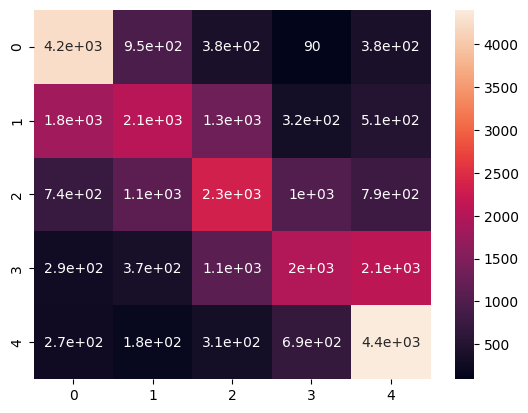

Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.70      0.63      6043
           2       0.44      0.34      0.38      6003
           3       0.43      0.39      0.41      6015
           4       0.48      0.34      0.40      5846
           5       0.54      0.75      0.63      5862

    accuracy                           0.50     29769
   macro avg       0.49      0.50      0.49     29769
weighted avg       0.49      0.50      0.49     29769

F1 Score:  0.49012520259885917
ROC AUC:  0.6903366439417299
Validation acc: 0.5045

Start of epoch 2
931/931 [==============================] - 6s 6ms/step


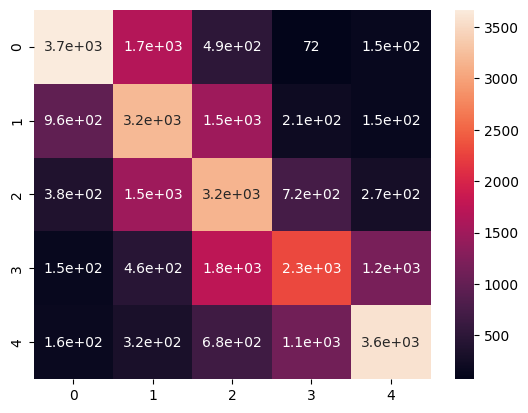

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.61      0.65      6043
           2       0.45      0.53      0.49      6003
           3       0.42      0.53      0.47      6015
           4       0.52      0.39      0.45      5846
           5       0.67      0.61      0.64      5862

    accuracy                           0.53     29769
   macro avg       0.55      0.53      0.54     29769
weighted avg       0.55      0.53      0.54     29769

F1 Score:  0.537365082105042
ROC AUC:  0.7087367562430866
Validation acc: 0.5344

Start of epoch 3
931/931 [==============================] - 6s 6ms/step


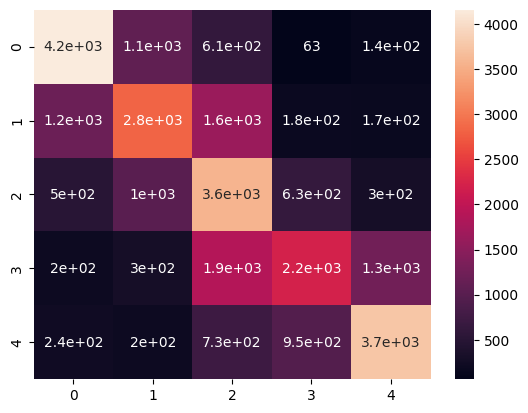

Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.69      0.67      6043
           2       0.52      0.47      0.49      6003
           3       0.42      0.59      0.50      6015
           4       0.55      0.38      0.45      5846
           5       0.67      0.64      0.65      5862

    accuracy                           0.55     29769
   macro avg       0.56      0.55      0.55     29769
weighted avg       0.56      0.55      0.55     29769

F1 Score:  0.5533311843729675
ROC AUC:  0.7213296839899211
Validation acc: 0.5548

Start of epoch 4
931/931 [==============================] - 6s 7ms/step


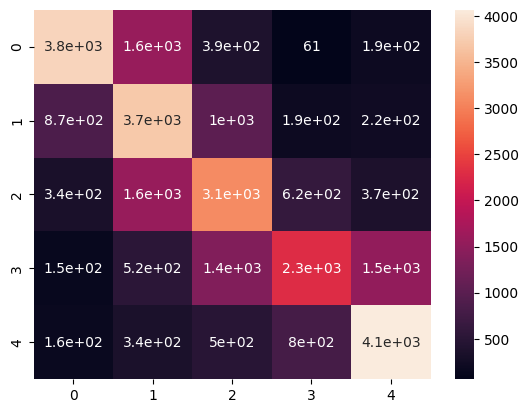

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.63      0.67      6043
           2       0.48      0.62      0.54      6003
           3       0.49      0.52      0.50      6015
           4       0.58      0.39      0.47      5846
           5       0.64      0.69      0.67      5862

    accuracy                           0.57     29769
   macro avg       0.58      0.57      0.57     29769
weighted avg       0.58      0.57      0.57     29769

F1 Score:  0.56942207306928
ROC AUC:  0.7316379667664252
Validation acc: 0.5710

Start of epoch 5
931/931 [==============================] - 6s 7ms/step


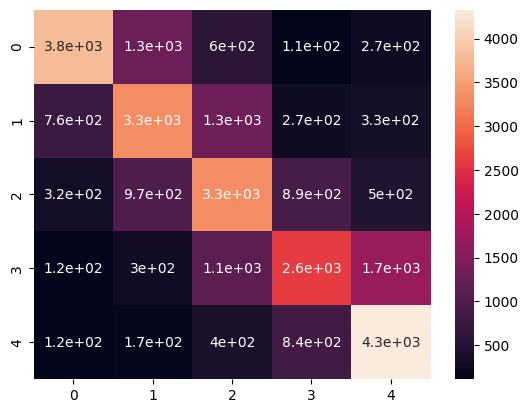

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.63      0.68      6043
           2       0.55      0.56      0.55      6003
           3       0.49      0.55      0.52      6015
           4       0.55      0.44      0.49      5846
           5       0.61      0.74      0.67      5862

    accuracy                           0.58     29769
   macro avg       0.59      0.58      0.58     29769
weighted avg       0.59      0.58      0.58     29769

F1 Score:  0.5828928994224979
ROC AUC:  0.740041020922183
Validation acc: 0.5841

Start of epoch 6
931/931 [==============================] - 6s 7ms/step


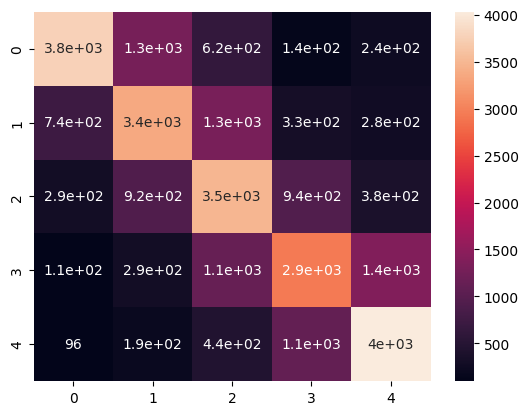

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.62      0.68      6043
           2       0.55      0.56      0.56      6003
           3       0.50      0.58      0.54      6015
           4       0.54      0.50      0.52      5846
           5       0.64      0.69      0.66      5862

    accuracy                           0.59     29769
   macro avg       0.60      0.59      0.59     29769
weighted avg       0.60      0.59      0.59     29769

F1 Score:  0.5917754903145931
ROC AUC:  0.7439059077225125
Validation acc: 0.5903

Start of epoch 7
931/931 [==============================] - 7s 7ms/step


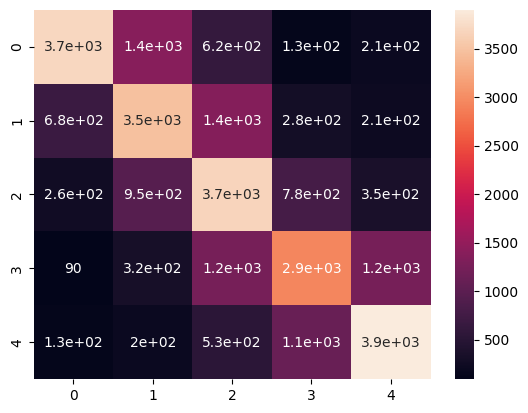

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.61      0.68      6043
           2       0.55      0.58      0.56      6003
           3       0.49      0.61      0.55      6015
           4       0.56      0.50      0.53      5846
           5       0.66      0.67      0.66      5862

    accuracy                           0.59     29769
   macro avg       0.60      0.59      0.60     29769
weighted avg       0.61      0.59      0.60     29769

F1 Score:  0.5963356350040167
ROC AUC:  0.7462056833785947
Validation acc: 0.5941

Start of epoch 8
931/931 [==============================] - 6s 7ms/step


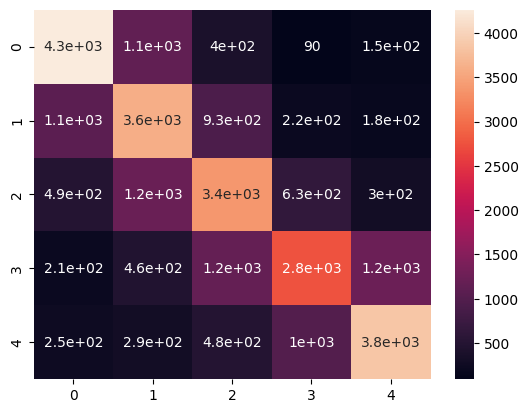

Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.71      0.69      6043
           2       0.54      0.60      0.57      6003
           3       0.53      0.56      0.55      6015
           4       0.59      0.47      0.52      5846
           5       0.67      0.66      0.66      5862

    accuracy                           0.60     29769
   macro avg       0.60      0.60      0.60     29769
weighted avg       0.60      0.60      0.60     29769

F1 Score:  0.5982473619756747
ROC AUC:  0.7492414465386916
Validation acc: 0.5992

Start of epoch 9
931/931 [==============================] - 6s 7ms/step


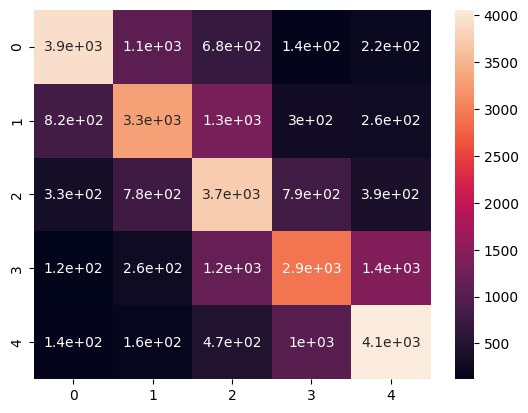

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.65      0.69      6043
           2       0.59      0.55      0.57      6003
           3       0.51      0.62      0.56      6015
           4       0.56      0.50      0.53      5846
           5       0.64      0.69      0.67      5862

    accuracy                           0.60     29769
   macro avg       0.61      0.60      0.60     29769
weighted avg       0.61      0.60      0.60     29769

F1 Score:  0.6031634108462463
ROC AUC:  0.7515710899241365
Validation acc: 0.6027

Start of epoch 10
931/931 [==============================] - 6s 7ms/step


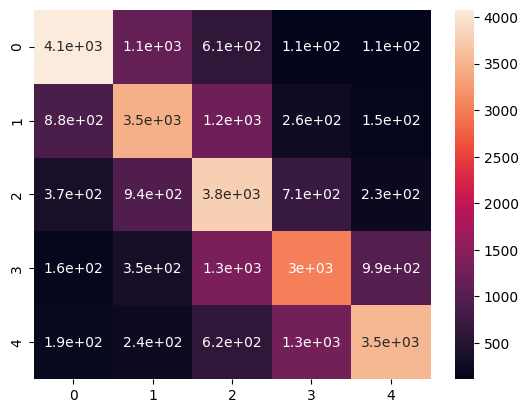

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.67      0.70      6043
           2       0.57      0.58      0.57      6003
           3       0.50      0.63      0.56      6015
           4       0.56      0.51      0.54      5846
           5       0.71      0.60      0.65      5862

    accuracy                           0.60     29769
   macro avg       0.61      0.60      0.60     29769
weighted avg       0.61      0.60      0.60     29769

F1 Score:  0.602408352989857
ROC AUC:  0.7499301395510316
Validation acc: 0.6004


In [ ]:
best_roc, best_F1, best_acc = train_model_updated(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

In [ ]:
df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove 6B + Clean data, classification + preprocess', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)

<ipython-input-70-efa57284d9de>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove 6B + Clean data, classification + preprocess', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)


##3.6 With the real twitter dataset

In [ ]:
df_score_all_trainings

training  F1 Score   ROC AUC  \
0                          simple model, categorical  0.630688  0.769055   
1                            simple regression model  0.604348  0.751468   
2                  more complicated regression model  0.590811  0.742150   
3                  Glove 6B + Clean data, regression  0.493733  0.679149   
4        Glove 6B + Clean data, regression + dropout  0.565454  0.726888   
5              Glove 6B + Clean data, classification  0.636154  0.773886   
6  Glove 6B + Clean data, classification + prepro...  0.603163  0.751571   

   Accuracy  
0  0.630690  
1  0.602875  
2  0.587524  
3  0.486614  
4  0.563069  
5  0.638214  
6  0.602674

##3.6.1. no preprocess

In [ ]:
x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer = get_regular_data(label_category='one_hot')

Total number of unique words: 281759
Max sequence length at 95th percentile: 240.0


In [ ]:
glove_embeddings = load_glove_embeddings('/content/drive/MyDrive/glove.twitter.27B.100d.txt')

In [ ]:
embedding_matrix = np.zeros((max_words, 100))  # Assuming using Glove 100d
for word, i in tokenizer.word_index.items():
    if i >= max_words:
        continue
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [ ]:
embedding_dim = embedding_matrix.shape[1]

# Define model
model = Sequential()
model.add(Embedding(max_words, 
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=int(max_sequence_length),
                    trainable=False))
model.add(Bidirectional(LSTM(256, return_sequences=True)))  
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Convert labels to float
y_train = y_train.astype(float)
y_val = y_val.astype(float)


Start of epoch 1
931/931 [==============================] - 12s 11ms/step


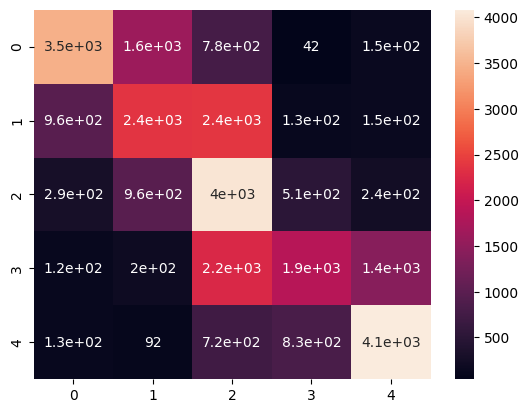

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.57      0.63      6043
           2       0.45      0.40      0.42      6003
           3       0.40      0.67      0.50      6015
           4       0.55      0.32      0.40      5846
           5       0.68      0.70      0.69      5862

    accuracy                           0.53     29769
   macro avg       0.55      0.53      0.53     29769
weighted avg       0.55      0.53      0.53     29769

F1 Score:  0.5275396832390655
ROC AUC:  0.7062984863024623
Validation acc: 0.5305

Start of epoch 2
931/931 [==============================] - 10s 11ms/step


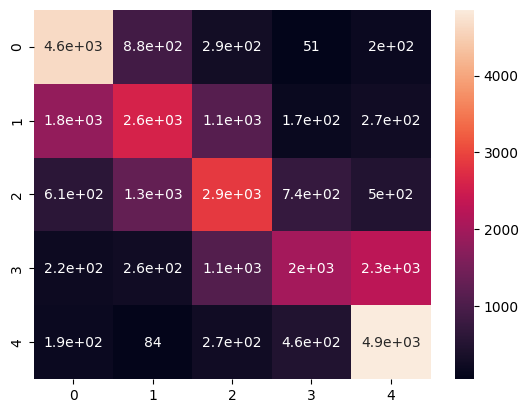

Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.77      0.69      6043
           2       0.51      0.43      0.47      6003
           3       0.51      0.48      0.49      6015
           4       0.58      0.34      0.43      5846
           5       0.60      0.83      0.70      5862

    accuracy                           0.57     29769
   macro avg       0.56      0.57      0.56     29769
weighted avg       0.56      0.57      0.56     29769

F1 Score:  0.5554118358792894
ROC AUC:  0.7313990313238611
Validation acc: 0.5704

Start of epoch 3
931/931 [==============================] - 10s 11ms/step


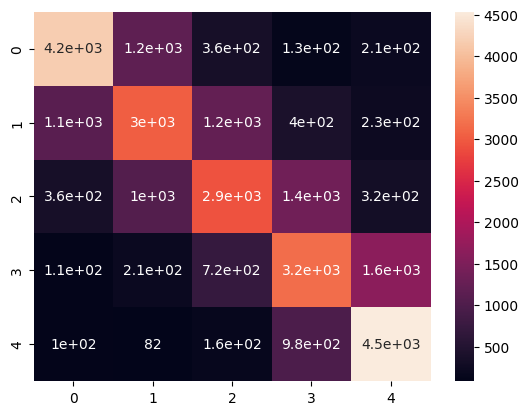

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.69      0.70      6043
           2       0.55      0.50      0.52      6003
           3       0.54      0.49      0.51      6015
           4       0.53      0.54      0.53      5846
           5       0.65      0.77      0.71      5862

    accuracy                           0.60     29769
   macro avg       0.60      0.60      0.60     29769
weighted avg       0.60      0.60      0.60     29769

F1 Score:  0.5966005617452678
ROC AUC:  0.7499809259590106
Validation acc: 0.5996

Start of epoch 4
931/931 [==============================] - 10s 11ms/step


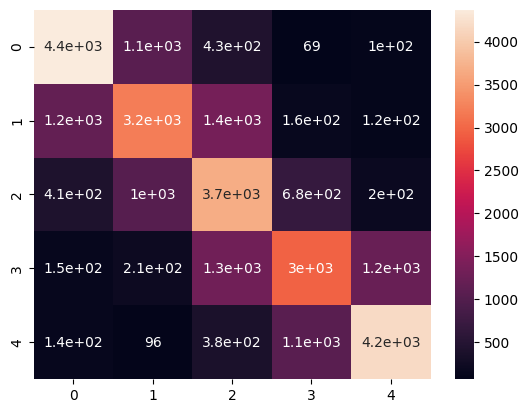

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.72      0.71      6043
           2       0.57      0.53      0.55      6003
           3       0.51      0.61      0.56      6015
           4       0.60      0.51      0.55      5846
           5       0.72      0.71      0.71      5862

    accuracy                           0.62     29769
   macro avg       0.62      0.62      0.62     29769
weighted avg       0.62      0.62      0.62     29769

F1 Score:  0.6170260161086741
ROC AUC:  0.7608505004303022
Validation acc: 0.6176

Start of epoch 5
931/931 [==============================] - 11s 11ms/step


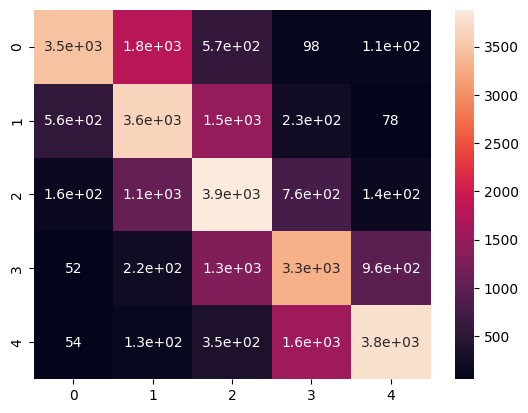

Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.58      0.67      6043
           2       0.53      0.61      0.57      6003
           3       0.51      0.65      0.57      6015
           4       0.56      0.57      0.56      5846
           5       0.75      0.64      0.69      5862

    accuracy                           0.61     29769
   macro avg       0.63      0.61      0.61     29769
weighted avg       0.63      0.61      0.61     29769

F1 Score:  0.6124573516296858
ROC AUC:  0.7548625688242977
Validation acc: 0.6078

Start of epoch 6
931/931 [==============================] - 11s 11ms/step


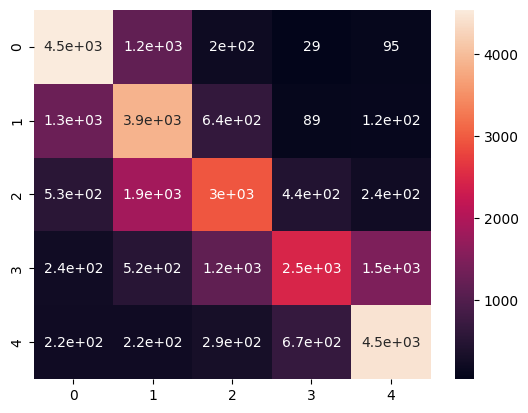

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.75      0.71      6043
           2       0.51      0.65      0.57      6003
           3       0.56      0.49      0.52      6015
           4       0.67      0.42      0.52      5846
           5       0.70      0.76      0.73      5862

    accuracy                           0.61     29769
   macro avg       0.62      0.61      0.61     29769
weighted avg       0.62      0.61      0.61     29769

F1 Score:  0.609283771117693
ROC AUC:  0.7590623749246973
Validation acc: 0.6149

Start of epoch 7
931/931 [==============================] - 11s 12ms/step


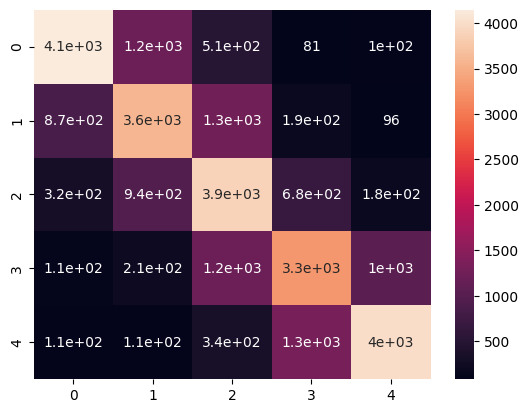

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.69      0.72      6043
           2       0.59      0.60      0.59      6003
           3       0.54      0.65      0.59      6015
           4       0.59      0.56      0.58      5846
           5       0.74      0.68      0.71      5862

    accuracy                           0.63     29769
   macro avg       0.64      0.63      0.64     29769
weighted avg       0.64      0.63      0.64     29769

F1 Score:  0.6367992705771738
ROC AUC:  0.7716952953575709
Validation acc: 0.6349

Start of epoch 8
931/931 [==============================] - 11s 11ms/step


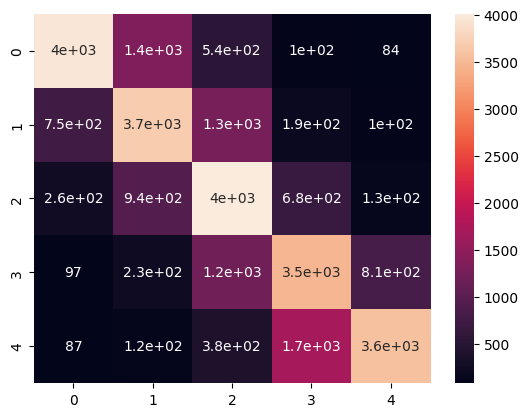

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.66      0.71      6043
           2       0.58      0.61      0.60      6003
           3       0.54      0.67      0.60      6015
           4       0.57      0.59      0.58      5846
           5       0.76      0.61      0.68      5862

    accuracy                           0.63     29769
   macro avg       0.64      0.63      0.63     29769
weighted avg       0.64      0.63      0.63     29769

F1 Score:  0.6316577624916446
ROC AUC:  0.7675427171036473
Validation acc: 0.6283

Start of epoch 9
931/931 [==============================] - 11s 11ms/step


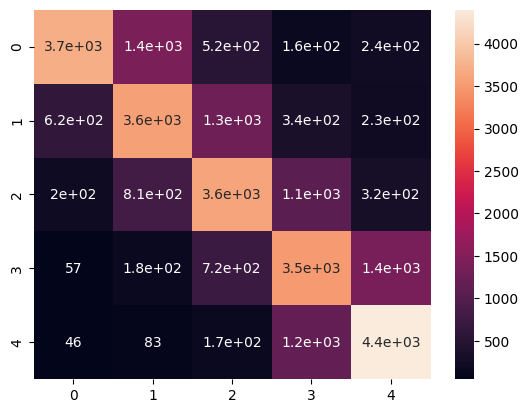

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.61      0.69      6043
           2       0.59      0.59      0.59      6003
           3       0.58      0.60      0.59      6015
           4       0.56      0.60      0.58      5846
           5       0.67      0.75      0.71      5862

    accuracy                           0.63     29769
   macro avg       0.64      0.63      0.63     29769
weighted avg       0.64      0.63      0.63     29769

F1 Score:  0.6322359476199398
ROC AUC:  0.7696743716238699
Validation acc: 0.6311

Start of epoch 10
931/931 [==============================] - 11s 11ms/step


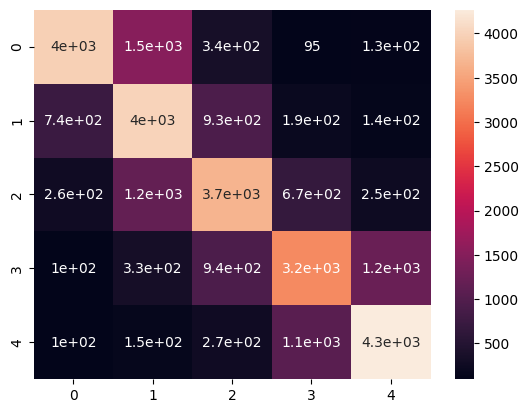

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.66      0.71      6043
           2       0.56      0.67      0.61      6003
           3       0.60      0.61      0.60      6015
           4       0.62      0.55      0.58      5846
           5       0.71      0.73      0.72      5862

    accuracy                           0.64     29769
   macro avg       0.65      0.64      0.64     29769
weighted avg       0.65      0.64      0.64     29769

F1 Score:  0.6440520107320935
ROC AUC:  0.7769086697148891
Validation acc: 0.6431


In [ ]:
best_roc, best_F1, best_acc = train_model_updated(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

In [ ]:
df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove twitter 27B, classification', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)

<ipython-input-77-08a9c7de3193>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove twitter 27B, classification', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)


##3.6.2. With preprocess

In [ ]:
x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer = get_clean_data(label_category='one_hot')

<ipython-input-44-6e9457d2e0ae>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_Text'] = df['Text'].apply(preprocess_text)


Total number of unique words: 57416
Max sequence length at 95th percentile: 123.0


In [ ]:
glove_embeddings = load_glove_embeddings('/content/drive/MyDrive/glove.twitter.27B.100d.txt')

In [ ]:
embedding_matrix = np.zeros((max_words, 100))
for word, i in tokenizer.word_index.items():
    if i >= max_words:
        continue
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=int(max_sequence_length),
                    trainable=False))
model.add(Bidirectional(LSTM(256, return_sequences=True)))  
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Convert labels to float
y_train = y_train.astype(float)
y_val = y_val.astype(float)


Start of epoch 1
931/931 [==============================] - 7s 6ms/step


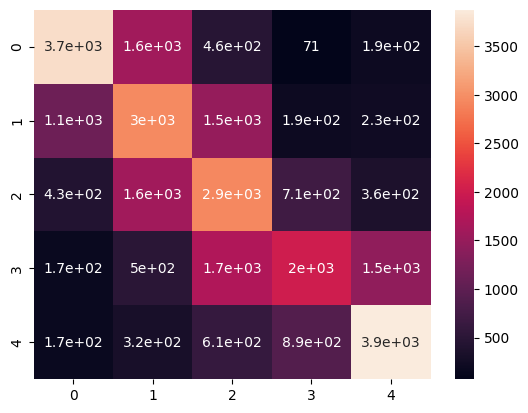

Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.62      0.64      6043
           2       0.42      0.49      0.46      6003
           3       0.41      0.49      0.44      6015
           4       0.52      0.34      0.41      5846
           5       0.63      0.66      0.65      5862

    accuracy                           0.52     29769
   macro avg       0.53      0.52      0.52     29769
weighted avg       0.53      0.52      0.52     29769

F1 Score:  0.5198463773062378
ROC AUC:  0.700085601408958
Validation acc: 0.5205

Start of epoch 2
931/931 [==============================] - 6s 7ms/step


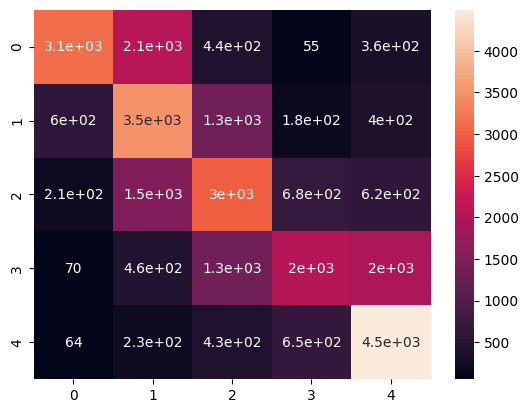

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.52      0.62      6043
           2       0.45      0.58      0.51      6003
           3       0.46      0.50      0.48      6015
           4       0.56      0.35      0.43      5846
           5       0.57      0.77      0.66      5862

    accuracy                           0.54     29769
   macro avg       0.56      0.54      0.54     29769
weighted avg       0.56      0.54      0.54     29769

F1 Score:  0.5382496566117075
ROC AUC:  0.7139109089918716
Validation acc: 0.5422

Start of epoch 3
931/931 [==============================] - 6s 7ms/step


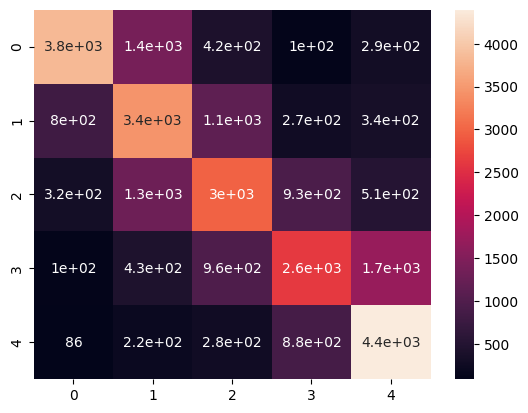

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.63      0.69      6043
           2       0.51      0.57      0.54      6003
           3       0.51      0.49      0.50      6015
           4       0.55      0.45      0.49      5846
           5       0.61      0.75      0.67      5862

    accuracy                           0.58     29769
   macro avg       0.58      0.58      0.58     29769
weighted avg       0.58      0.58      0.58     29769

F1 Score:  0.5783829888647902
ROC AUC:  0.7376710505746342
Validation acc: 0.5802

Start of epoch 4
931/931 [==============================] - 6s 6ms/step


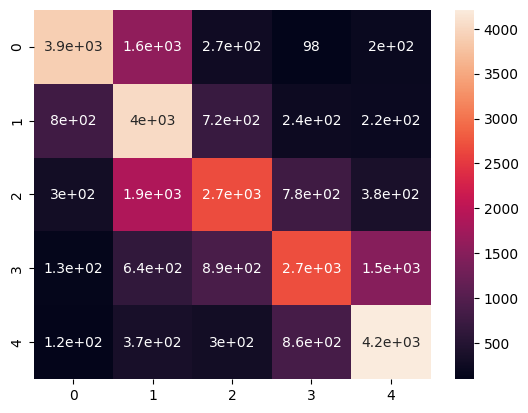

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.64      0.69      6043
           2       0.47      0.67      0.56      6003
           3       0.55      0.45      0.49      6015
           4       0.58      0.46      0.51      5846
           5       0.65      0.72      0.68      5862

    accuracy                           0.59     29769
   macro avg       0.60      0.59      0.59     29769
weighted avg       0.60      0.59      0.59     29769

F1 Score:  0.5869687240606138
ROC AUC:  0.7428294655785717
Validation acc: 0.5886

Start of epoch 5
931/931 [==============================] - 6s 7ms/step


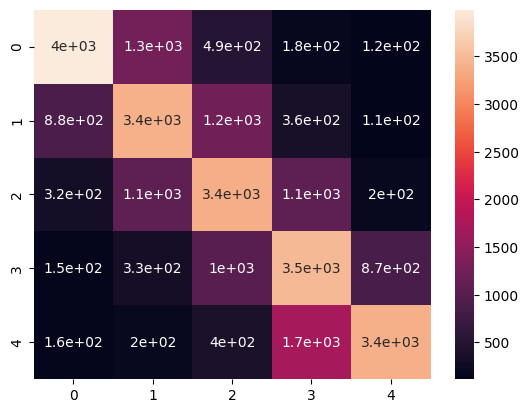

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.66      0.69      6043
           2       0.54      0.57      0.56      6003
           3       0.52      0.56      0.54      6015
           4       0.51      0.60      0.55      5846
           5       0.72      0.58      0.64      5862

    accuracy                           0.59     29769
   macro avg       0.60      0.59      0.60     29769
weighted avg       0.60      0.59      0.60     29769

F1 Score:  0.5961784632274872
ROC AUC:  0.7455614619939778
Validation acc: 0.5930

Start of epoch 6
931/931 [==============================] - 6s 7ms/step


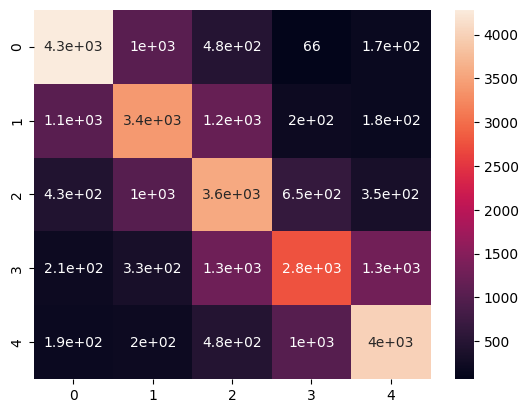

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.71      0.70      6043
           2       0.57      0.57      0.57      6003
           3       0.51      0.59      0.55      6015
           4       0.59      0.47      0.52      5846
           5       0.67      0.68      0.67      5862

    accuracy                           0.60     29769
   macro avg       0.61      0.60      0.60     29769
weighted avg       0.61      0.60      0.60     29769

F1 Score:  0.6033829787715174
ROC AUC:  0.7525073061588373
Validation acc: 0.6044

Start of epoch 7
931/931 [==============================] - 7s 7ms/step


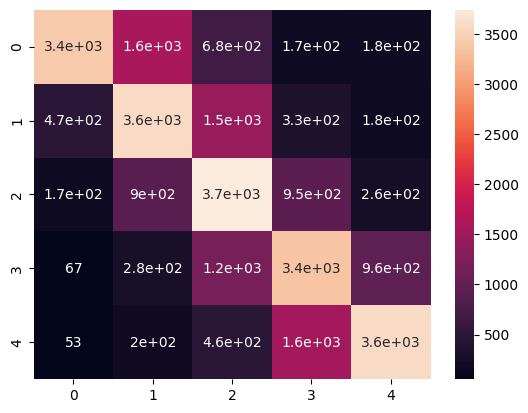

Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.57      0.67      6043
           2       0.55      0.60      0.57      6003
           3       0.50      0.62      0.55      6015
           4       0.53      0.58      0.55      5846
           5       0.70      0.61      0.65      5862

    accuracy                           0.59     29769
   macro avg       0.62      0.59      0.60     29769
weighted avg       0.62      0.59      0.60     29769

F1 Score:  0.5988835800639506
ROC AUC:  0.7464118650154747
Validation acc: 0.5942

Start of epoch 8
931/931 [==============================] - 6s 7ms/step


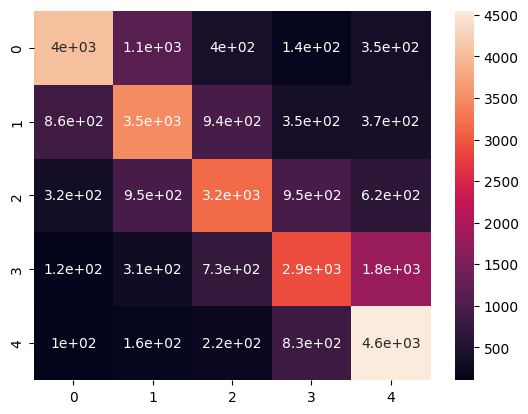

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.67      0.70      6043
           2       0.58      0.58      0.58      6003
           3       0.58      0.53      0.55      6015
           4       0.56      0.49      0.53      5846
           5       0.59      0.78      0.67      5862

    accuracy                           0.61     29769
   macro avg       0.61      0.61      0.61     29769
weighted avg       0.61      0.61      0.61     29769

F1 Score:  0.6062885284280259
ROC AUC:  0.7555679667400341
Validation acc: 0.6088

Start of epoch 9
931/931 [==============================] - 7s 7ms/step


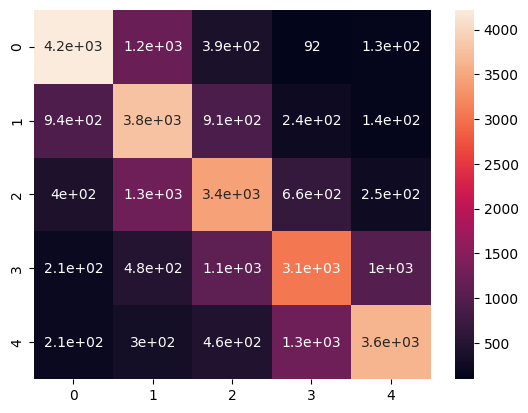

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.70      0.70      6043
           2       0.54      0.63      0.58      6003
           3       0.55      0.57      0.56      6015
           4       0.58      0.52      0.55      5846
           5       0.71      0.62      0.66      5862

    accuracy                           0.61     29769
   macro avg       0.61      0.61      0.61     29769
weighted avg       0.61      0.61      0.61     29769

F1 Score:  0.6101980369183418
ROC AUC:  0.7555552641047376
Validation acc: 0.6093

Start of epoch 10
931/931 [==============================] - 6s 7ms/step


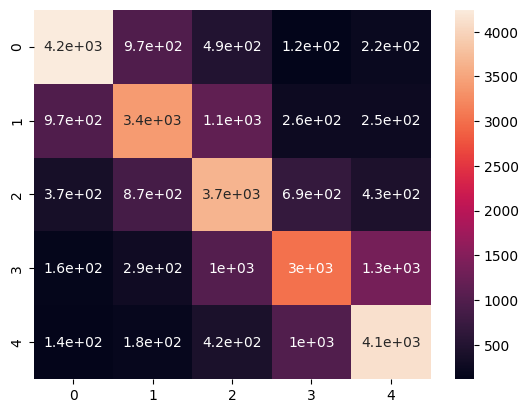

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.70      0.71      6043
           2       0.59      0.56      0.58      6003
           3       0.54      0.61      0.57      6015
           4       0.59      0.52      0.55      5846
           5       0.65      0.70      0.67      5862

    accuracy                           0.62     29769
   macro avg       0.62      0.62      0.62     29769
weighted avg       0.62      0.62      0.62     29769

F1 Score:  0.6181248011993815
ROC AUC:  0.7616608672349109
Validation acc: 0.6189


In [ ]:
best_roc, best_F1, best_acc = train_model_updated(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

In [ ]:
df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove twitter 27B, classification + preprocess', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)

<ipython-input-83-ac4b69cc1005>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove twitter 27B, classification + preprocess', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)


##3.6.3. With a bigger twitter dataset, no preprocess

In [ ]:
x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer = get_regular_data(label_category='one_hot')

Total number of unique words: 280618
Max sequence length at 95th percentile: 238.0


In [ ]:
glove_embeddings = load_glove_embeddings('/content/drive/MyDrive/Ethan/glove.twitter.27B.200d.txt')

In [ ]:
embedding_matrix = np.zeros((max_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= max_words:
        continue
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_dim = embedding_matrix.shape[1]

# Define model
model = Sequential()
model.add(Embedding(max_words, 
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=int(max_sequence_length),
                    trainable=False))
model.add(Bidirectional(LSTM(256, return_sequences=True)))  
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Convert labels to float
y_train = y_train.astype(float)
y_val = y_val.astype(float)


Start of epoch 1
931/931 [==============================] - 12s 12ms/step


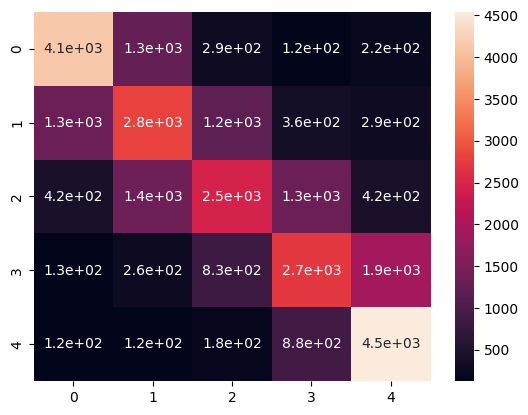

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.68      0.68      6043
           2       0.48      0.47      0.48      6003
           3       0.49      0.41      0.45      6015
           4       0.50      0.46      0.48      5846
           5       0.61      0.78      0.69      5862

    accuracy                           0.56     29769
   macro avg       0.55      0.56      0.55     29769
weighted avg       0.55      0.56      0.55     29769

F1 Score:  0.5532322810858642
ROC AUC:  0.7248596792015654
Validation acc: 0.5594

Start of epoch 2
931/931 [==============================] - 11s 12ms/step


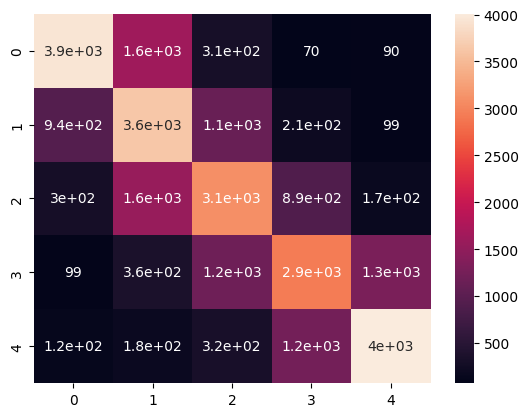

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.65      0.69      6043
           2       0.49      0.61      0.54      6003
           3       0.51      0.52      0.51      6015
           4       0.55      0.50      0.52      5846
           5       0.71      0.68      0.70      5862

    accuracy                           0.59     29769
   macro avg       0.60      0.59      0.59     29769
weighted avg       0.60      0.59      0.59     29769

F1 Score:  0.5933627153762849
ROC AUC:  0.7445936694193473
Validation acc: 0.5915

Start of epoch 3
931/931 [==============================] - 11s 12ms/step


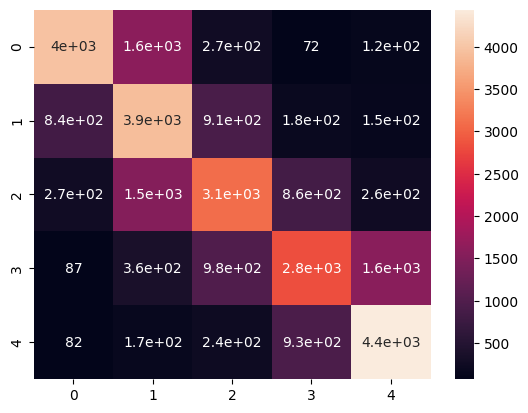

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.66      0.70      6043
           2       0.52      0.65      0.58      6003
           3       0.56      0.52      0.54      6015
           4       0.58      0.48      0.53      5846
           5       0.68      0.76      0.71      5862

    accuracy                           0.61     29769
   macro avg       0.62      0.61      0.61     29769
weighted avg       0.62      0.61      0.61     29769

F1 Score:  0.6119049185886242
ROC AUC:  0.7580816330284441
Validation acc: 0.6130

Start of epoch 4
931/931 [==============================] - 11s 12ms/step


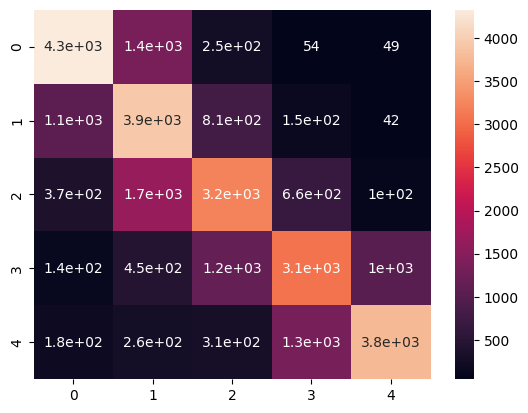

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.72      0.71      6043
           2       0.51      0.66      0.58      6003
           3       0.56      0.53      0.55      6015
           4       0.58      0.52      0.55      5846
           5       0.75      0.64      0.69      5862

    accuracy                           0.62     29769
   macro avg       0.62      0.62      0.62     29769
weighted avg       0.62      0.62      0.62     29769

F1 Score:  0.6167890589972426
ROC AUC:  0.7594817088971594
Validation acc: 0.6156

Start of epoch 5
931/931 [==============================] - 11s 12ms/step


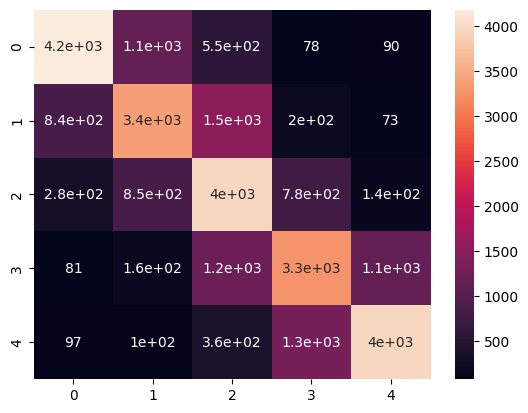

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.69      0.73      6043
           2       0.60      0.56      0.58      6003
           3       0.52      0.66      0.58      6015
           4       0.58      0.56      0.57      5846
           5       0.74      0.68      0.71      5862

    accuracy                           0.63     29769
   macro avg       0.64      0.63      0.63     29769
weighted avg       0.64      0.63      0.63     29769

F1 Score:  0.6330972564683184
ROC AUC:  0.769155690094396
Validation acc: 0.6309

Start of epoch 6
931/931 [==============================] - 11s 12ms/step


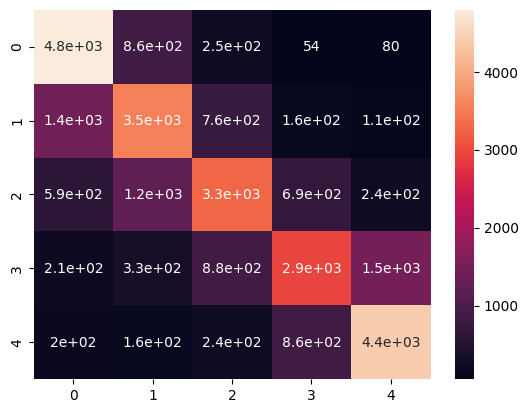

Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.79      0.72      6043
           2       0.58      0.59      0.58      6003
           3       0.61      0.54      0.57      6015
           4       0.63      0.50      0.56      5846
           5       0.70      0.75      0.72      5862

    accuracy                           0.64     29769
   macro avg       0.63      0.64      0.63     29769
weighted avg       0.63      0.64      0.63     29769

F1 Score:  0.6325636747564081
ROC AUC:  0.7729232355450832
Validation acc: 0.6370

Start of epoch 7
931/931 [==============================] - 11s 12ms/step


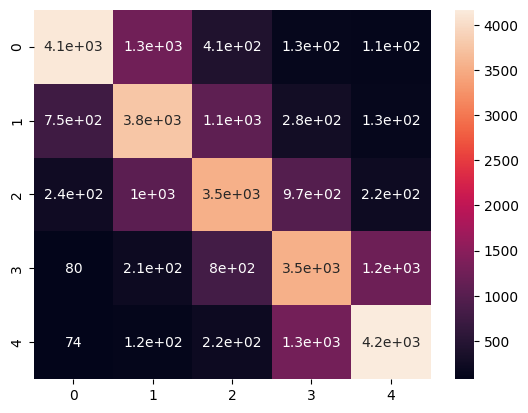

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.68      0.73      6043
           2       0.59      0.63      0.61      6003
           3       0.59      0.59      0.59      6015
           4       0.57      0.61      0.59      5846
           5       0.71      0.71      0.71      5862

    accuracy                           0.64     29769
   macro avg       0.65      0.64      0.65     29769
weighted avg       0.65      0.64      0.65     29769

F1 Score:  0.6452098352451086
ROC AUC:  0.7772343471922973
Validation acc: 0.6435

Start of epoch 8
931/931 [==============================] - 11s 12ms/step


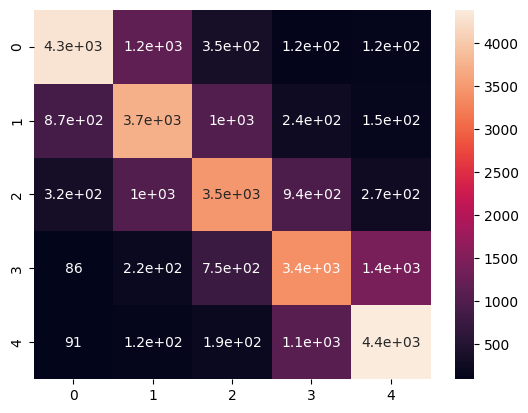

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.71      0.73      6043
           2       0.60      0.62      0.61      6003
           3       0.60      0.58      0.59      6015
           4       0.59      0.58      0.58      5846
           5       0.69      0.75      0.72      5862

    accuracy                           0.65     29769
   macro avg       0.65      0.65      0.65     29769
weighted avg       0.65      0.65      0.65     29769

F1 Score:  0.6473489696626626
ROC AUC:  0.7797607469985328
Validation acc: 0.6476

Start of epoch 9
931/931 [==============================] - 11s 12ms/step


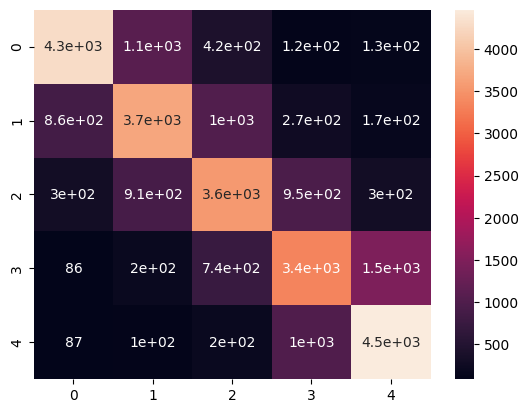

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.71      0.74      6043
           2       0.62      0.61      0.62      6003
           3       0.60      0.59      0.60      6015
           4       0.59      0.57      0.58      5846
           5       0.68      0.76      0.72      5862

    accuracy                           0.65     29769
   macro avg       0.65      0.65      0.65     29769
weighted avg       0.65      0.65      0.65     29769

F1 Score:  0.6495393554096237
ROC AUC:  0.7812976567111406
Validation acc: 0.6500

Start of epoch 10
931/931 [==============================] - 11s 12ms/step


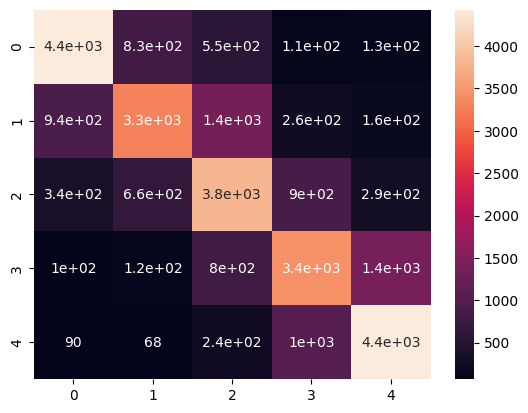

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.73      0.74      6043
           2       0.66      0.55      0.60      6003
           3       0.56      0.64      0.60      6015
           4       0.60      0.59      0.59      5846
           5       0.69      0.75      0.72      5862

    accuracy                           0.65     29769
   macro avg       0.65      0.65      0.65     29769
weighted avg       0.65      0.65      0.65     29769

F1 Score:  0.6506983388518477
ROC AUC:  0.7821607477811245
Validation acc: 0.6514


In [ ]:
best_roc, best_F1, best_acc = train_model_updated(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

In [ ]:
df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove twitter 27B 200d, classification', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)

<ipython-input-89-9280e2469cdb>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove twitter 27B 200d, classification', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)


##3.6.4. Big twitter data + preprocess

In [ ]:
x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer = get_clean_data(label_category='one_hot')

<ipython-input-44-6e9457d2e0ae>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_Text'] = df['Text'].apply(preprocess_text)


Total number of unique words: 57234
Max sequence length at 95th percentile: 123.0


In [ ]:
glove_embeddings = load_glove_embeddings('/content/drive/MyDrive/Ethan/glove.twitter.27B.200d.txt')

In [ ]:
embedding_matrix = np.zeros((max_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= max_words:
        continue
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_dim = embedding_matrix.shape[1]

# Define model
model = Sequential()
model.add(Embedding(max_words, 
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=int(max_sequence_length),
                    trainable=False))
model.add(Bidirectional(LSTM(256, return_sequences=True)))  
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Convert labels to float
y_train = y_train.astype(float)
y_val = y_val.astype(float)


Start of epoch 1
931/931 [==============================] - 7s 7ms/step


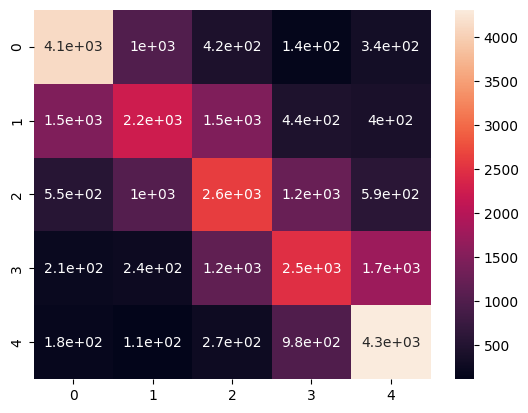

Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.68      0.66      6043
           2       0.48      0.37      0.42      6003
           3       0.44      0.44      0.44      6015
           4       0.47      0.42      0.45      5846
           5       0.58      0.74      0.65      5862

    accuracy                           0.53     29769
   macro avg       0.52      0.53      0.52     29769
weighted avg       0.52      0.53      0.52     29769

F1 Score:  0.5221126349829425
ROC AUC:  0.7062241185115088
Validation acc: 0.5297

Start of epoch 2
931/931 [==============================] - 6s 7ms/step


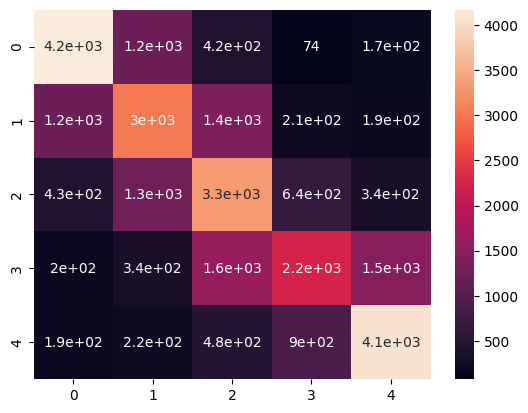

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.69      0.68      6043
           2       0.50      0.50      0.50      6003
           3       0.46      0.55      0.50      6015
           4       0.55      0.38      0.45      5846
           5       0.65      0.69      0.67      5862

    accuracy                           0.57     29769
   macro avg       0.57      0.56      0.56     29769
weighted avg       0.57      0.57      0.56     29769

F1 Score:  0.56250531297725
ROC AUC:  0.7281429600377007
Validation acc: 0.5655

Start of epoch 3
931/931 [==============================] - 6s 7ms/step


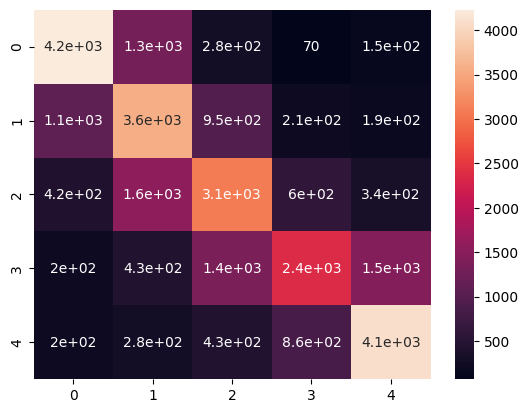

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.70      0.69      6043
           2       0.50      0.60      0.54      6003
           3       0.50      0.51      0.51      6015
           4       0.58      0.41      0.48      5846
           5       0.66      0.70      0.68      5862

    accuracy                           0.58     29769
   macro avg       0.59      0.58      0.58     29769
weighted avg       0.59      0.58      0.58     29769

F1 Score:  0.5803658448131608
ROC AUC:  0.7392501169715532
Validation acc: 0.5833

Start of epoch 4
931/931 [==============================] - 7s 8ms/step


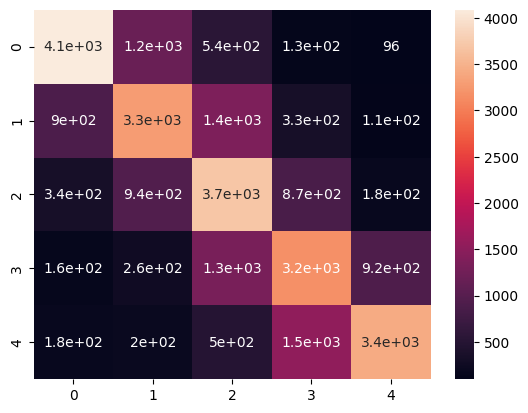

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.68      0.70      6043
           2       0.56      0.55      0.55      6003
           3       0.50      0.61      0.55      6015
           4       0.52      0.54      0.53      5846
           5       0.72      0.59      0.65      5862

    accuracy                           0.59     29769
   macro avg       0.61      0.59      0.60     29769
weighted avg       0.61      0.59      0.60     29769

F1 Score:  0.5967087646971136
ROC AUC:  0.7459280152326981
Validation acc: 0.5938

Start of epoch 5
931/931 [==============================] - 6s 7ms/step


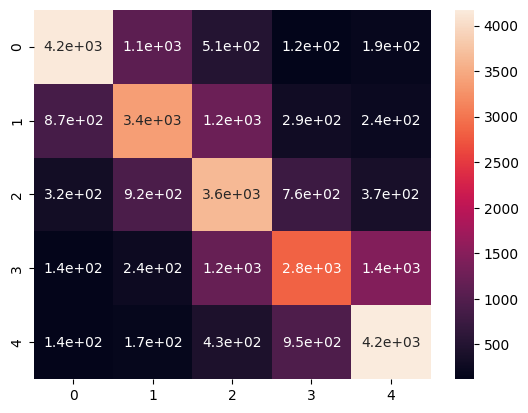

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.69      0.71      6043
           2       0.58      0.56      0.57      6003
           3       0.52      0.61      0.56      6015
           4       0.57      0.48      0.52      5846
           5       0.65      0.71      0.68      5862

    accuracy                           0.61     29769
   macro avg       0.61      0.61      0.61     29769
weighted avg       0.61      0.61      0.61     29769

F1 Score:  0.6100779367311168
ROC AUC:  0.7564997925203739
Validation acc: 0.6106

Start of epoch 6
931/931 [==============================] - 7s 7ms/step


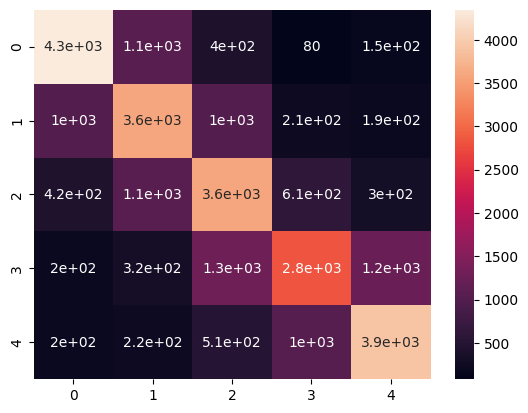

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.72      0.71      6043
           2       0.57      0.60      0.58      6003
           3       0.53      0.60      0.56      6015
           4       0.59      0.48      0.53      5846
           5       0.67      0.67      0.67      5862

    accuracy                           0.61     29769
   macro avg       0.61      0.61      0.61     29769
weighted avg       0.61      0.61      0.61     29769

F1 Score:  0.6120586715996877
ROC AUC:  0.757748484359517
Validation acc: 0.6129

Start of epoch 7
931/931 [==============================] - 7s 7ms/step


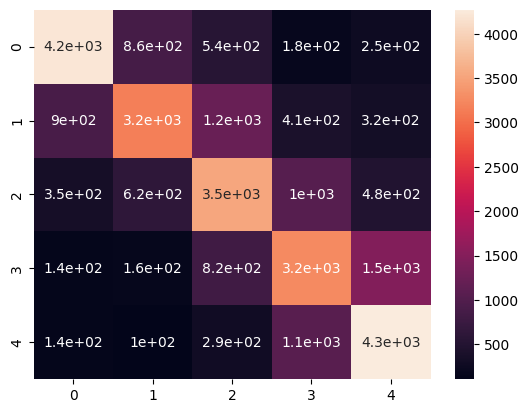

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.70      0.71      6043
           2       0.64      0.53      0.58      6003
           3       0.55      0.59      0.57      6015
           4       0.55      0.56      0.55      5846
           5       0.63      0.73      0.67      5862

    accuracy                           0.62     29769
   macro avg       0.62      0.62      0.62     29769
weighted avg       0.62      0.62      0.62     29769

F1 Score:  0.617984116769367
ROC AUC:  0.7617557066405153
Validation acc: 0.6187

Start of epoch 8
931/931 [==============================] - 7s 7ms/step


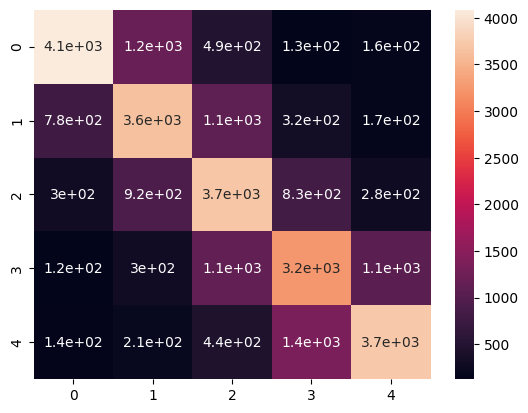

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.68      0.71      6043
           2       0.58      0.61      0.59      6003
           3       0.54      0.61      0.58      6015
           4       0.55      0.56      0.55      5846
           5       0.69      0.63      0.66      5862

    accuracy                           0.62     29769
   macro avg       0.62      0.62      0.62     29769
weighted avg       0.62      0.62      0.62     29769

F1 Score:  0.6199234150464571
ROC AUC:  0.7610195721470367
Validation acc: 0.6179

Start of epoch 9
931/931 [==============================] - 7s 7ms/step


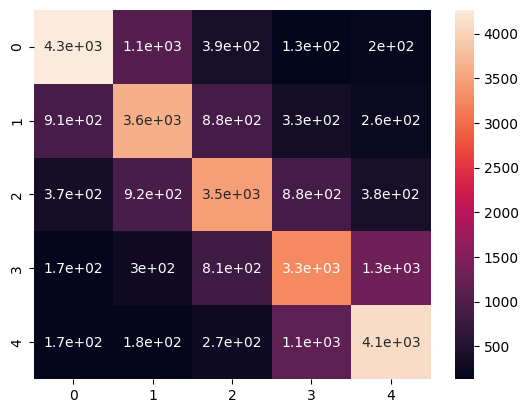

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.71      0.72      6043
           2       0.60      0.61      0.60      6003
           3       0.60      0.57      0.59      6015
           4       0.57      0.56      0.56      5846
           5       0.66      0.70      0.68      5862

    accuracy                           0.63     29769
   macro avg       0.63      0.63      0.63     29769
weighted avg       0.63      0.63      0.63     29769

F1 Score:  0.6283906173007472
ROC AUC:  0.7678895540895282
Validation acc: 0.6287

Start of epoch 10
931/931 [==============================] - 7s 7ms/step


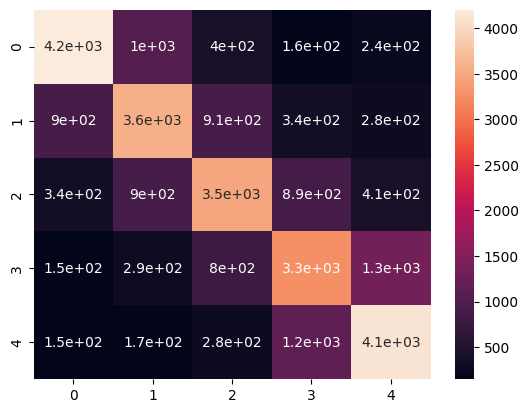

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.70      0.71      6043
           2       0.60      0.60      0.60      6003
           3       0.59      0.58      0.59      6015
           4       0.56      0.56      0.56      5846
           5       0.64      0.70      0.67      5862

    accuracy                           0.63     29769
   macro avg       0.63      0.63      0.63     29769
weighted avg       0.63      0.63      0.63     29769

F1 Score:  0.6259055948433766
ROC AUC:  0.7662408404671309
Validation acc: 0.6260


In [ ]:
best_roc, best_F1, best_acc = train_model_updated(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

In [ ]:
df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove twitter 27B 200d, classification + preprocess', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)

<ipython-input-95-492629975b2e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score_all_trainings = df_score_all_trainings.append({'training': 'Glove twitter 27B 200d, classification + preprocess', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)


##3.7. My own classification model, no pretraining

In [ ]:
x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer = get_clean_data(label_category='one_hot')

<ipython-input-44-6e9457d2e0ae>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_Text'] = df['Text'].apply(preprocess_text)


Total number of unique words: 57127
Max sequence length at 95th percentile: 123.0


In [ ]:

embedding_dim = 50

# Define model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=int(max_sequence_length)))
model.add(LSTM(128, return_sequences=True))  # LSTM layer with 128 units
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(LSTM(64))  # Another LSTM layer with 64 units
model.add(Dense(64, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(5, activation='softmax'))  # Output layer, assuming 5 classes

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Convert labels to float
y_train = y_train.astype(float)
y_val = y_val.astype(float)


Start of epoch 1
931/931 [==============================] - 5s 5ms/step


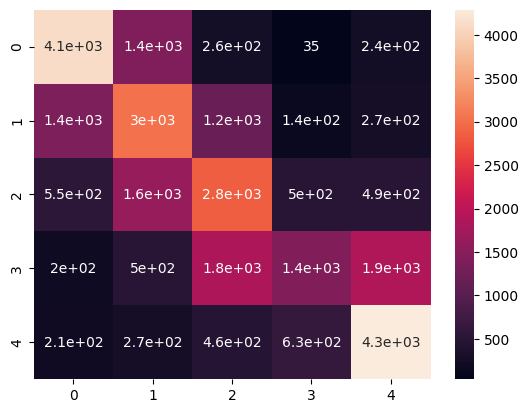

Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.68      0.66      6043
           2       0.44      0.50      0.47      6003
           3       0.43      0.47      0.45      6015
           4       0.52      0.24      0.33      5846
           5       0.60      0.73      0.66      5862

    accuracy                           0.53     29769
   macro avg       0.53      0.53      0.51     29769
weighted avg       0.53      0.53      0.51     29769

F1 Score:  0.5148267861081651
ROC AUC:  0.7041457018390129
Validation acc: 0.5273

Start of epoch 2
931/931 [==============================] - 6s 6ms/step


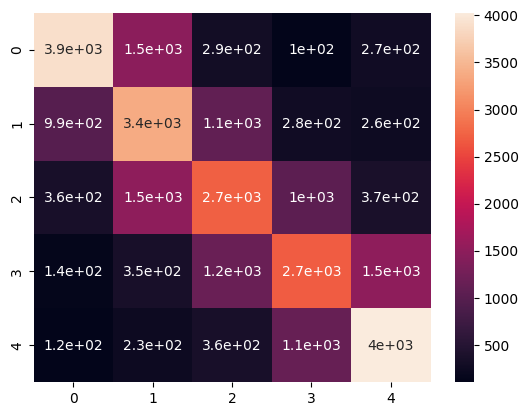

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.65      0.68      6043
           2       0.49      0.56      0.52      6003
           3       0.48      0.45      0.47      6015
           4       0.51      0.46      0.48      5846
           5       0.63      0.69      0.66      5862

    accuracy                           0.56     29769
   macro avg       0.56      0.56      0.56     29769
weighted avg       0.56      0.56      0.56     29769

F1 Score:  0.561002856307248
ROC AUC:  0.7260051868595144
Validation acc: 0.5616

Start of epoch 3
931/931 [==============================] - 4s 5ms/step


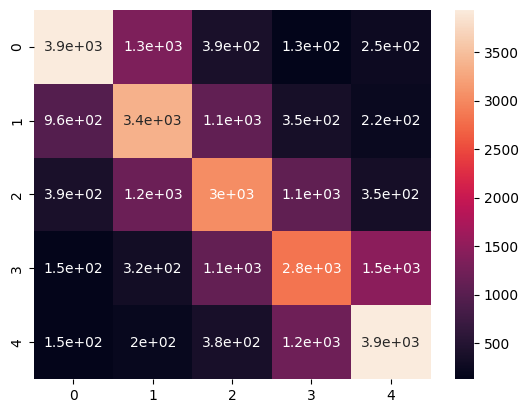

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.65      0.68      6043
           2       0.53      0.56      0.54      6003
           3       0.51      0.50      0.51      6015
           4       0.51      0.48      0.50      5846
           5       0.63      0.67      0.65      5862

    accuracy                           0.57     29769
   macro avg       0.58      0.57      0.57     29769
weighted avg       0.58      0.57      0.57     29769

F1 Score:  0.5745661800871983
ROC AUC:  0.7339490695053451
Validation acc: 0.5744

Start of epoch 4
931/931 [==============================] - 6s 6ms/step


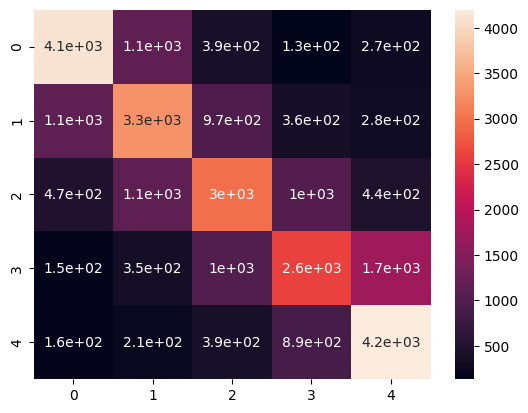

Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.68      0.68      6043
           2       0.54      0.55      0.54      6003
           3       0.52      0.49      0.51      6015
           4       0.52      0.45      0.48      5846
           5       0.61      0.72      0.66      5862

    accuracy                           0.58     29769
   macro avg       0.57      0.58      0.57     29769
weighted avg       0.57      0.58      0.57     29769

F1 Score:  0.5734454311545348
ROC AUC:  0.7352335961800704
Validation acc: 0.5765

Start of epoch 5
931/931 [==============================] - 5s 5ms/step


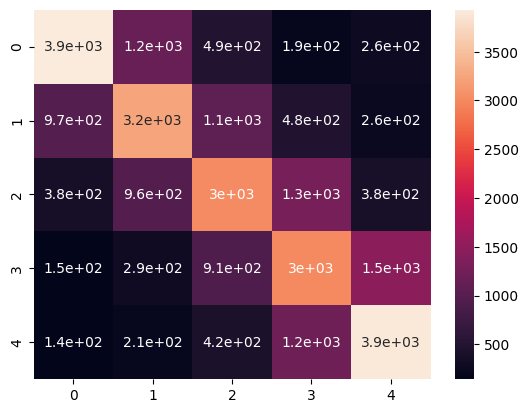

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.65      0.68      6043
           2       0.55      0.54      0.55      6003
           3       0.51      0.50      0.51      6015
           4       0.49      0.51      0.50      5846
           5       0.62      0.66      0.64      5862

    accuracy                           0.57     29769
   macro avg       0.58      0.57      0.57     29769
weighted avg       0.58      0.57      0.57     29769

F1 Score:  0.5746264226562325
ROC AUC:  0.7338434275336161
Validation acc: 0.5741

Start of epoch 6
931/931 [==============================] - 5s 5ms/step


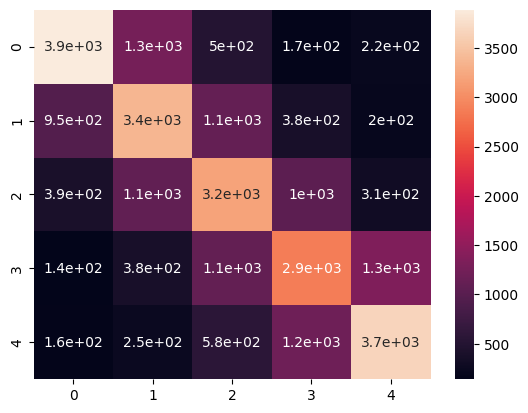

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.64      0.67      6043
           2       0.53      0.56      0.54      6003
           3       0.49      0.53      0.51      6015
           4       0.51      0.49      0.50      5846
           5       0.64      0.63      0.63      5862

    accuracy                           0.57     29769
   macro avg       0.57      0.57      0.57     29769
weighted avg       0.57      0.57      0.57     29769

F1 Score:  0.57167983489641
ROC AUC:  0.7313142182079859
Validation acc: 0.5703

Start of epoch 7
931/931 [==============================] - 5s 6ms/step


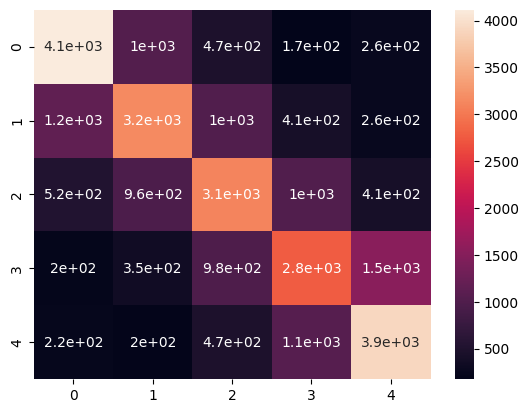

Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.68      0.67      6043
           2       0.56      0.53      0.54      6003
           3       0.51      0.52      0.51      6015
           4       0.51      0.47      0.49      5846
           5       0.61      0.67      0.64      5862

    accuracy                           0.57     29769
   macro avg       0.57      0.57      0.57     29769
weighted avg       0.57      0.57      0.57     29769

F1 Score:  0.5718692146615298
ROC AUC:  0.73329103033879
Validation acc: 0.5734

Start of epoch 8
931/931 [==============================] - 5s 5ms/step


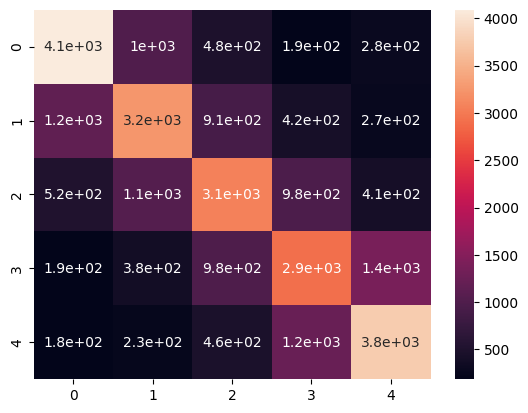

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.68      0.67      6043
           2       0.55      0.54      0.55      6003
           3       0.52      0.51      0.51      6015
           4       0.51      0.50      0.50      5846
           5       0.62      0.64      0.63      5862

    accuracy                           0.57     29769
   macro avg       0.57      0.57      0.57     29769
weighted avg       0.57      0.57      0.57     29769

F1 Score:  0.5729274339204974
ROC AUC:  0.7334210767681931
Validation acc: 0.5736

Start of epoch 9
931/931 [==============================] - 5s 5ms/step


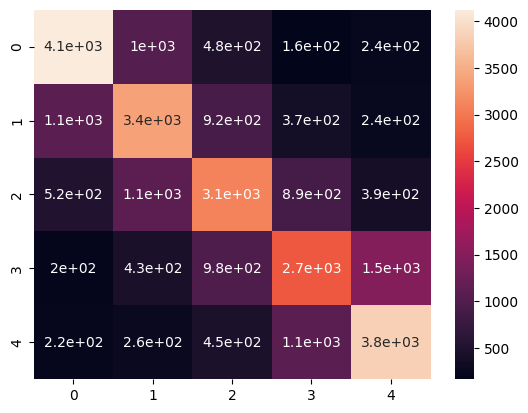

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.68      0.68      6043
           2       0.54      0.56      0.55      6003
           3       0.52      0.51      0.52      6015
           4       0.52      0.47      0.49      5846
           5       0.62      0.65      0.64      5862

    accuracy                           0.58     29769
   macro avg       0.57      0.58      0.58     29769
weighted avg       0.57      0.58      0.58     29769

F1 Score:  0.5753034339146414
ROC AUC:  0.7352431715134182
Validation acc: 0.5766

Start of epoch 10
931/931 [==============================] - 5s 6ms/step


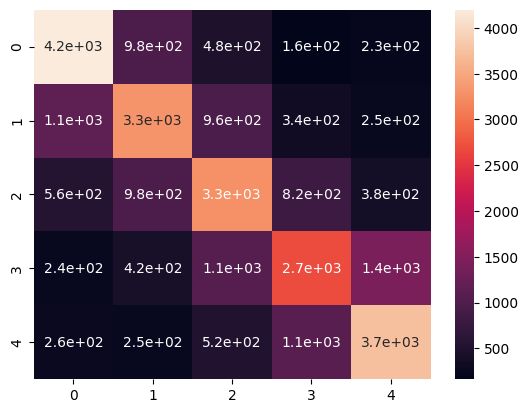

Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.69      0.67      6043
           2       0.56      0.55      0.55      6003
           3       0.52      0.55      0.53      6015
           4       0.53      0.46      0.49      5846
           5       0.62      0.64      0.63      5862

    accuracy                           0.58     29769
   macro avg       0.58      0.58      0.58     29769
weighted avg       0.58      0.58      0.58     29769

F1 Score:  0.5768912855255939
ROC AUC:  0.7362839882729545
Validation acc: 0.5785


In [ ]:
# Define training function
def train_model_cross_entropy(model, x_train, y_train, x_val, y_val, epochs, batch_size):
    # Loss function
    loss_fn = CategoricalCrossentropy()

    # Prepare the training dataset
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    # Prepare the validation dataset
    val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
    val_dataset = val_dataset.batch(batch_size)


    best_F1 = 0 
    best_roc = 0
    best_acc = 0 

    # Iterate over epochs
    for epoch in range(epochs):
        print(f'\nStart of epoch {epoch+1}')

        # Iterate over the batches of the dataset
        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                y_pred = model(x_batch_train, training=True)
                loss_value = loss_fn(y_batch_train, y_pred)
            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Run a validation loop at the end of each epoch
        val_targ = np.argmax(y_val, axis=1) + 1
        val_predict = np.argmax(model.predict(x_val), axis=1) + 1

        # Compute accuracy
        accuracy = np.mean(val_predict.flatten() == val_targ)

        # Compute confusion matrix
        mat = sklearn.metrics.confusion_matrix(val_targ, val_predict)
        df_cm = pd.DataFrame(mat, range(5), range(5))
        sns.heatmap(df_cm, annot=True)
        plt.show()

        print("Classification Report:")
        print(classification_report(val_targ, val_predict))

        # Calculate F1 score
        f1 = f1_score(val_targ, val_predict, average='weighted')
        print("F1 Score: ", f1)

        # ROC AUC
        lb = LabelBinarizer()
        lb.fit(val_targ)
        val_targ_lb = lb.transform(val_targ)
        val_predict_lb = lb.transform(val_predict)

        roc_auc = roc_auc_score(val_targ_lb, val_predict_lb, multi_class="ovr")
        print("ROC AUC: ", roc_auc)

        print(f'Validation acc: {float(accuracy):.4f}')

        if roc_auc > best_roc:
          best_roc = roc_auc
          best_F1 = f1
          best_acc = accuracy

    return best_roc, best_F1, best_acc

best_roc, best_F1, best_acc = train_model_cross_entropy(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

In [ ]:
df_score_all_trainings = df_score_all_trainings.append({'training': 'my own classification, no pretraining + preprocess', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)

<ipython-input-99-e7e6bbf93593>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score_all_trainings = df_score_all_trainings.append({'training': 'my own classification, no pretraining + preprocess', "F1 Score": best_F1, "ROC AUC": best_roc, "Accuracy": best_acc}, ignore_index=True)


#4. Results: 

In [ ]:
df_score_all_trainings

training  F1 Score   ROC AUC  \
0                           simple model, categorical  0.630688  0.769055   
1                             simple regression model  0.604348  0.751468   
2                   more complicated regression model  0.590811  0.742150   
3                   Glove 6B + Clean data, regression  0.493733  0.679149   
4         Glove 6B + Clean data, regression + dropout  0.565454  0.726888   
5               Glove 6B + Clean data, classification  0.636154  0.773886   
6   Glove 6B + Clean data, classification + prepro...  0.603163  0.751571   
7                   Glove twitter 27B, classification  0.644052  0.776909   
8      Glove twitter 27B, classification + preprocess  0.618125  0.761661   
9              Glove twitter 27B 200d, classification  0.650698  0.782161   
10  Glove twitter 27B 200d, classification + prepr...  0.628391  0.767890   
11  my own classification, no pretraining + prepro...  0.576891  0.736284   

    Accuracy  
0   0.630690  
1   0.602875  
2   0.587524  
3   0.486614  
4   0.563069  
5   0.638214  
6   0.602674  
7   0.643119  
8   0.618865  
9   0.651416  
10  0.628708  
11  0.578454

In [ ]:
# Find the maximum ROC AUC
max_roc_auc = df_score_all_trainings['ROC AUC'].max()

# Function to highlight the row with the max 'ROC AUC'
def highlight_max(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    if data['ROC AUC'] == max_roc_auc:
        return [attr] * len(data)
    else:
        return [''] * len(data)

# Apply the highlight to the DataFrame
df_score_all_trainings.style.apply(highlight_max, axis=1)

# Essai en prenant que les labels 1 et 5, pour prouver que le model apprend

In [ ]:
def load_glove_embeddings(file):
    embeddings = {}
    with open(file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

In [ ]:
def train_model_updated_binary(model, x_train, y_train, x_val, y_val, epochs, batch_size):
    # Loss function
    loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

    # Prepare the training dataset
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    # Prepare the validation dataset
    val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
    val_dataset = val_dataset.batch(batch_size)


    best_F1 = 0 
    best_roc = 0
    best_acc = 0 

    # Iterate over epochs
    for epoch in range(epochs):
        print(f'\nStart of epoch {epoch+1}')

        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                y_pred = model(x_batch_train, training=True)
                loss_value = loss_fn(y_batch_train, y_pred)
            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

        val_targ = y_val.flatten()
        val_predict = (model.predict(x_val).flatten() > 0.5).astype(int)

        # Compute accuracy
        accuracy = np.mean(val_predict == val_targ)

        # Compute confusion matrix
        mat = sklearn.metrics.confusion_matrix(val_targ, val_predict)
        df_cm = pd.DataFrame(mat, range(2), range(2))
        sns.heatmap(df_cm, annot=True)
        plt.show()

        print("Classification Report:")
        print(classification_report(val_targ, val_predict))

        # Calculate F1 score
        f1 = f1_score(val_targ, val_predict, average='weighted')
        print("F1 Score: ", f1)

        # ROC AUC
        roc_auc = roc_auc_score(val_targ, val_predict)
        print("ROC AUC: ", roc_auc)

        print(f'Validation acc: {float(accuracy):.4f}')

        if roc_auc > best_roc:
          best_roc = roc_auc
          best_F1 = f1
          best_acc = accuracy

    return best_roc, best_F1, best_acc

In [ ]:
def get_regular_data_binary(label_category='one_hot'):
  df = pd.read_csv('/content/drive/MyDrive/Ethan/Reviews.csv')
  df_balanced = pd.DataFrame()

  # Select only the rows with scores of 1 or 5
  df = df.loc[df['Score'].isin([1, 5])]

  min_class_count = df['Score'].value_counts().min()

  df_balanced = pd.DataFrame()
  for label in [1, 5]:
      df_balanced = pd.concat([df_balanced, df[df['Score'] == label].sample(min_class_count)])

  df = df_balanced[['Text', 'Score']]

  # Analyzing the number of unique words
  all_words = [word for tokens in df["Text"] for word in tokens.split(" ")]
  unique_words = set(all_words)
  max_words = len(unique_words)
  print(f'Total number of unique words: {max_words}')

  # Analyzing sequence length
  sequence_lengths = [len(tokens.split(" ")) for tokens in df["Text"]]
  max_sequence_length = np.percentile(sequence_lengths, 95)  # Set to the 95th percentile
  print(f'Max sequence length at 95th percentile: {max_sequence_length}')

  # Prepare the Tokenizer
  tokenizer = Tokenizer(num_words=max_words)
  tokenizer.fit_on_texts(df['Text'])

  # Tokenize the data
  sequences = tokenizer.texts_to_sequences(df['Text'])
  word_index = tokenizer.word_index

  # Ensure all sequences have the same length
  data = pad_sequences(sequences, maxlen=int(max_sequence_length))

  # Prepare labels
  if label_category == 'binary':
    # set the label to 0 if 1 and to 1 if 5 
    labels = (df['Score'] == 5).astype(int).values
  else: 
    labels = (df['Score']/5).values

  x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

  return x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer

In [ ]:
x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer = get_regular_data_binary(label_category='binary')

Total number of unique words: 220315
Max sequence length at 95th percentile: 217.0


In [ ]:
print(y_train)

[1 1 1 ... 1 0 0]


In [ ]:
glove_embeddings = load_glove_embeddings('/content/drive/MyDrive/Ethan/glove.twitter.27B.200d.txt')

In [ ]:
embedding_matrix = np.zeros((max_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= max_words:
        continue
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_dim = embedding_matrix.shape[1]

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=int(max_sequence_length)))
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))  
model.add(Dropout(0.5)) 
model.add(LSTM(64, kernel_regularizer=l2(0.01)))  
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  
model.add(Dropout(0.5))  
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.compile(loss='binary_crossentropy',  # Loss for binary classification
              optimizer='adam',
              metrics=['accuracy'])


# Convert labels to float
y_train = y_train.astype(float)
y_val = y_val.astype(float)


Start of epoch 1


654/654 [==============================] - 5s 7ms/step


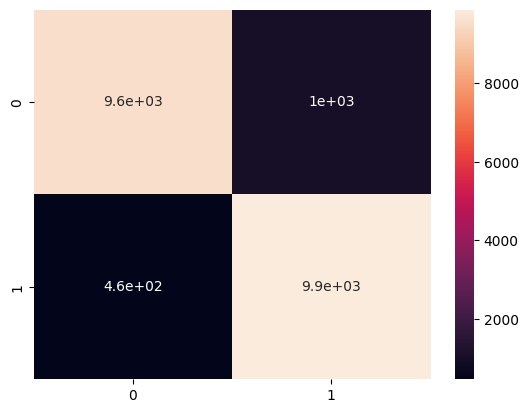

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93     10579
         1.0       0.91      0.96      0.93     10329

    accuracy                           0.93     20908
   macro avg       0.93      0.93      0.93     20908
weighted avg       0.93      0.93      0.93     20908

F1 Score:  0.9289924713705069
ROC AUC:  0.9293394041763755
Validation acc: 0.9290

Start of epoch 2
654/654 [==============================] - 6s 8ms/step


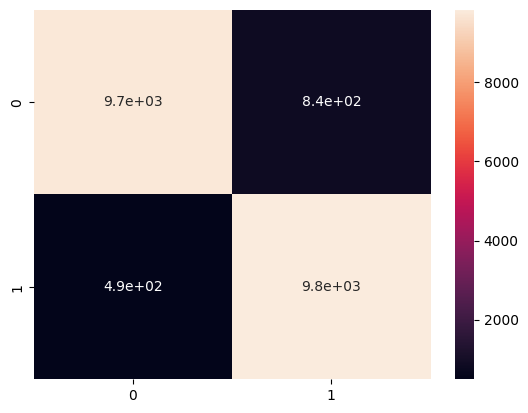

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94     10579
         1.0       0.92      0.95      0.94     10329

    accuracy                           0.94     20908
   macro avg       0.94      0.94      0.94     20908
weighted avg       0.94      0.94      0.94     20908

F1 Score:  0.936095632305027
ROC AUC:  0.9362943559940625
Validation acc: 0.9361

Start of epoch 3
654/654 [==============================] - 5s 7ms/step


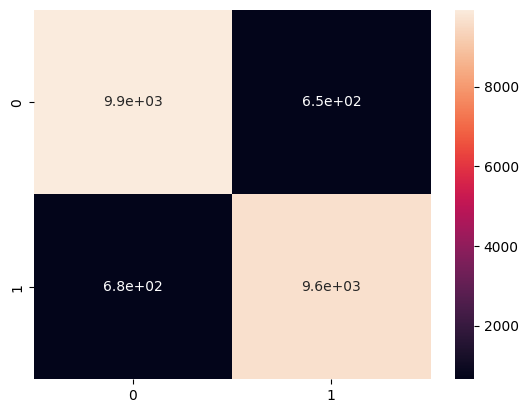

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     10579
         1.0       0.94      0.93      0.94     10329

    accuracy                           0.94     20908
   macro avg       0.94      0.94      0.94     20908
weighted avg       0.94      0.94      0.94     20908

F1 Score:  0.9362910129347257
ROC AUC:  0.9362649152917232
Validation acc: 0.9363

Start of epoch 4
654/654 [==============================] - 4s 7ms/step


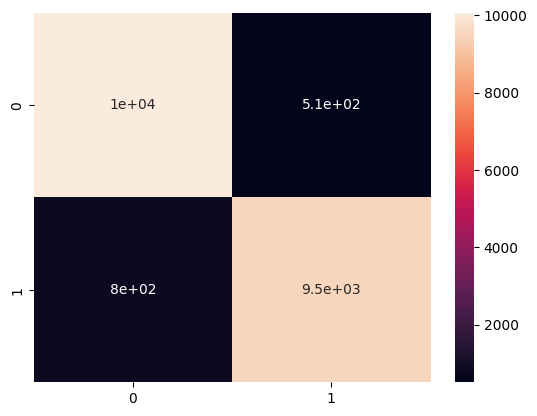

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     10579
         1.0       0.95      0.92      0.94     10329

    accuracy                           0.94     20908
   macro avg       0.94      0.94      0.94     20908
weighted avg       0.94      0.94      0.94     20908

F1 Score:  0.9370345415662167
ROC AUC:  0.9368804245603691
Validation acc: 0.9371

Start of epoch 5
654/654 [==============================] - 5s 8ms/step


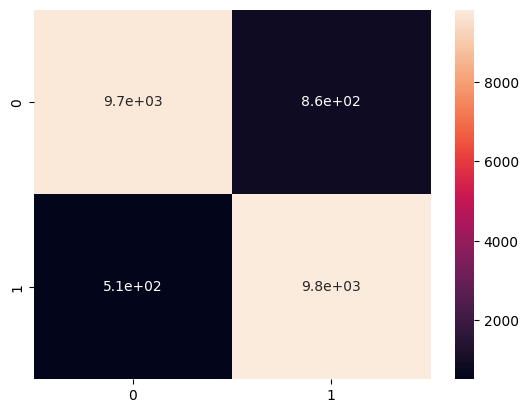

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93     10579
         1.0       0.92      0.95      0.93     10329

    accuracy                           0.93     20908
   macro avg       0.93      0.93      0.93     20908
weighted avg       0.93      0.93      0.93     20908

F1 Score:  0.9344697300820004
ROC AUC:  0.934664519810751
Validation acc: 0.9345

Start of epoch 6
654/654 [==============================] - 5s 7ms/step


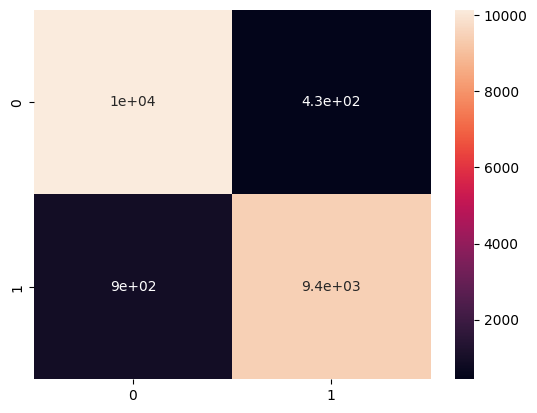

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     10579
         1.0       0.96      0.91      0.93     10329

    accuracy                           0.94     20908
   macro avg       0.94      0.94      0.94     20908
weighted avg       0.94      0.94      0.94     20908

F1 Score:  0.9362909918590292
ROC AUC:  0.9360627975946406
Validation acc: 0.9363

Start of epoch 7
654/654 [==============================] - 4s 7ms/step


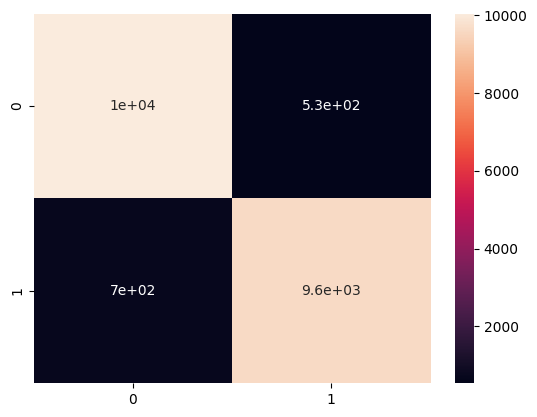

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     10579
         1.0       0.95      0.93      0.94     10329

    accuracy                           0.94     20908
   macro avg       0.94      0.94      0.94     20908
weighted avg       0.94      0.94      0.94     20908

F1 Score:  0.9411617029397277
ROC AUC:  0.9410686275766803
Validation acc: 0.9412

Start of epoch 8
654/654 [==============================] - 5s 7ms/step


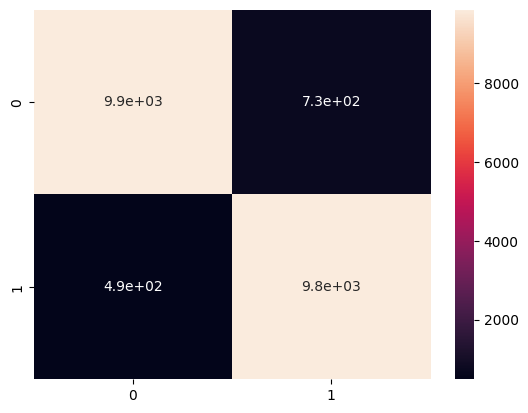

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     10579
         1.0       0.93      0.95      0.94     10329

    accuracy                           0.94     20908
   macro avg       0.94      0.94      0.94     20908
weighted avg       0.94      0.94      0.94     20908

F1 Score:  0.9418408834276344
ROC AUC:  0.941967113518324
Validation acc: 0.9418

Start of epoch 9
654/654 [==============================] - 6s 8ms/step


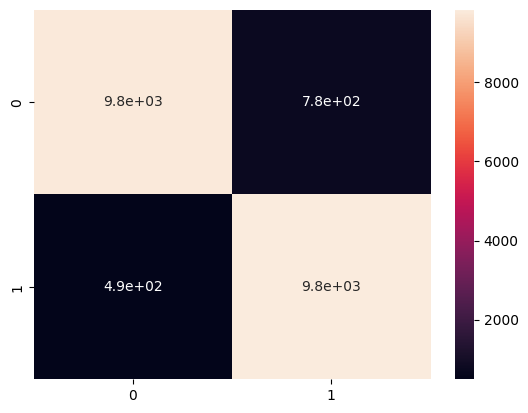

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     10579
         1.0       0.93      0.95      0.94     10329

    accuracy                           0.94     20908
   macro avg       0.94      0.94      0.94     20908
weighted avg       0.94      0.94      0.94     20908

F1 Score:  0.9391605201414648
ROC AUC:  0.9393180726166956
Validation acc: 0.9392

Start of epoch 10
654/654 [==============================] - 5s 7ms/step


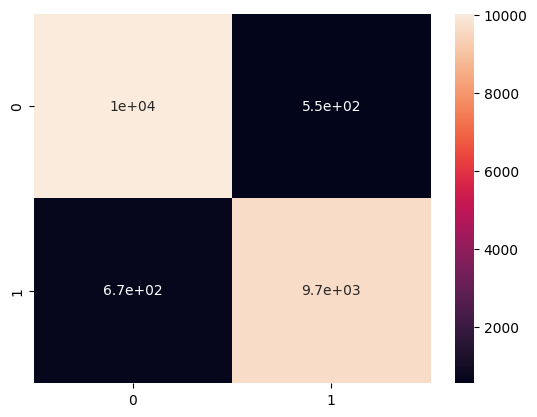

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     10579
         1.0       0.95      0.94      0.94     10329

    accuracy                           0.94     20908
   macro avg       0.94      0.94      0.94     20908
weighted avg       0.94      0.94      0.94     20908

F1 Score:  0.9417863716806357
ROC AUC:  0.941712795085729
Validation acc: 0.9418


In [ ]:
best_roc, best_F1, best_acc = train_model_updated_binary(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

# now trying with the labels 1, 3 and 5 

## With the one hot encoding

In [ ]:
def load_glove_embeddings(file):
    embeddings = {}
    with open(file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

In [ ]:
def train_model_updated_3(model, x_train, y_train, x_val, y_val, epochs, batch_size):
    # Loss function
    loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

    # Prepare the training dataset
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    # Prepare the validation dataset
    val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
    val_dataset = val_dataset.batch(batch_size)


    best_F1 = 0 
    best_roc = 0
    best_acc = 0 

    # Iterate over epochs
    for epoch in range(epochs):
        print(f'\nStart of epoch {epoch+1}')

        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                y_pred = model(x_batch_train, training=True)
                loss_value = loss_fn(y_batch_train, y_pred)
            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

        val_targ = np.argmax(y_val, axis=1)
        val_predict = np.argmax(model.predict(x_val), axis=1)

        # Compute accuracy
        accuracy = np.mean(val_predict == val_targ)

        # Compute confusion matrix
        mat = sklearn.metrics.confusion_matrix(val_targ, val_predict)
        df_cm = pd.DataFrame(mat, range(3), range(3))
        sns.heatmap(df_cm, annot=True)
        plt.show()

        print("Classification Report:")
        print(classification_report(val_targ, val_predict))

        # Calculate F1 score
        f1 = f1_score(val_targ, val_predict, average='weighted')
        print("F1 Score: ", f1)

        # ROC AUC
        val_prob = model.predict(x_val)

        # Apply softmax to the model's output
        val_prob = tf.nn.softmax(val_prob, axis=-1)

        roc_auc = roc_auc_score(y_val, val_prob, multi_class='ovr')
        print("ROC AUC: ", roc_auc)

        print(f'Validation acc: {float(accuracy):.4f}')

        if roc_auc > best_roc:
          best_roc = roc_auc
          best_F1 = f1
          best_acc = accuracy

    return best_roc, best_F1, best_acc

In [ ]:
def get_regular_data_3(label_category='one_hot'):
  df = pd.read_csv('/content/drive/MyDrive/Ethan/Reviews.csv')
  df_balanced = pd.DataFrame()

  # Filter the DataFrame to only include rows where Score is 1, 3, or 5
  df = df[df['Score'].isin([1, 3, 5])]

  min_class_count = df['Score'].value_counts().min()

  for label in df['Score'].unique():
      df_balanced = pd.concat([df_balanced, df[df['Score'] == label].sample(min_class_count)])

  df = df_balanced[['Text', 'Score']]

  df['Score'] = df['Score'].map({1: 0, 3: 1, 5: 2})

    # Analyzing the number of unique words
  all_words = [word for tokens in df["Text"] for word in tokens.split(" ")]
  unique_words = set(all_words)
  max_words = len(unique_words)
  print(f'Total number of unique words: {max_words}')

  # Analyzing sequence length
  sequence_lengths = [len(tokens.split(" ")) for tokens in df["Text"]]
  max_sequence_length = np.percentile(sequence_lengths, 95)  # Set to the 95th percentile
  print(f'Max sequence length at 95th percentile: {max_sequence_length}')

  # Prepare the Tokenizer
  tokenizer = Tokenizer(num_words=max_words)
  tokenizer.fit_on_texts(df['Text'])

  # Tokenize the data
  sequences = tokenizer.texts_to_sequences(df['Text'])
  word_index = tokenizer.word_index

  # Ensure all sequences have the same length
  data = pad_sequences(sequences, maxlen=int(max_sequence_length))


  # Prepare labels
  if label_category == 'label':
    # Subtract 1 from labels, then add 1, to ensure labels start from 0
    labels = to_categorical(df['Score']) 
  else: 
    labels = df['Score'].values


  x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

  return x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer

In [ ]:
x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer = get_regular_data_3(label_category='label')

<ipython-input-9-adaa939e3063>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score'] = df['Score'].map({1: 0, 3: 1, 5: 2})


Total number of unique words: 252292
Max sequence length at 95th percentile: 234.0


In [ ]:
print(y_train)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [ ]:
glove_embeddings = load_glove_embeddings('/content/drive/MyDrive/Ethan/glove.twitter.27B.200d.txt')

In [ ]:
embedding_matrix = np.zeros((max_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= max_words:
        continue
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_dim = embedding_matrix.shape[1]

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=int(max_sequence_length)))
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))  
model.add(Dropout(0.5)) 
model.add(LSTM(64, kernel_regularizer=l2(0.01)))  
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  
model.add(Dropout(0.5))  
model.add(Dense(3, activation='sigmoid')) 

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Convert labels to float
y_train = y_train.astype(float)
y_val = y_val.astype(float)


Start of epoch 1


800/800 [==============================] - 6s 7ms/step


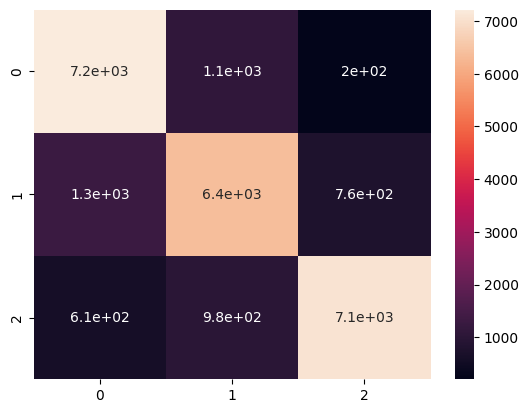

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      8523
           1       0.75      0.76      0.75      8412
           2       0.88      0.82      0.85      8649

    accuracy                           0.81     25584
   macro avg       0.81      0.81      0.81     25584
weighted avg       0.81      0.81      0.81     25584

F1 Score:  0.8068040259619064
800/800 [==============================] - 7s 8ms/step
ROC AUC:  0.9334107673850182
Validation acc: 0.8064

Start of epoch 2
800/800 [==============================] - 6s 7ms/step


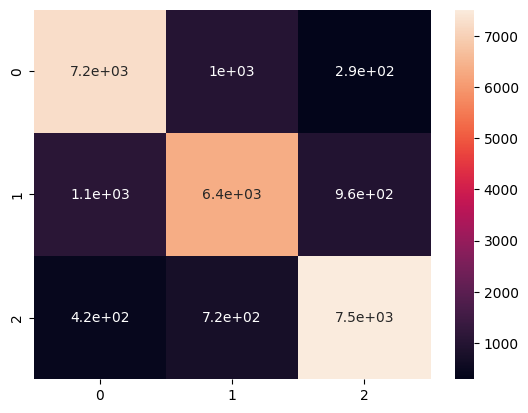

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      8523
           1       0.79      0.75      0.77      8412
           2       0.86      0.87      0.86      8649

    accuracy                           0.82     25584
   macro avg       0.82      0.82      0.82     25584
weighted avg       0.82      0.82      0.82     25584

F1 Score:  0.8243841215263439
800/800 [==============================] - 7s 9ms/step
ROC AUC:  0.9411476596589776
Validation acc: 0.8249

Start of epoch 3
800/800 [==============================] - 6s 7ms/step


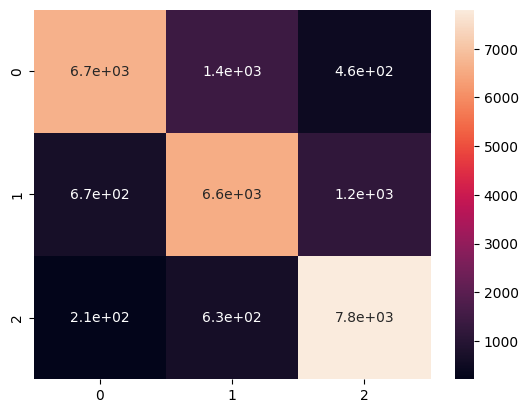

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      8523
           1       0.76      0.78      0.77      8412
           2       0.83      0.90      0.86      8649

    accuracy                           0.82     25584
   macro avg       0.82      0.82      0.82     25584
weighted avg       0.83      0.82      0.82     25584

F1 Score:  0.8220539811886944
800/800 [==============================] - 7s 9ms/step
ROC AUC:  0.9389703994901821
Validation acc: 0.8223

Start of epoch 4
800/800 [==============================] - 6s 7ms/step


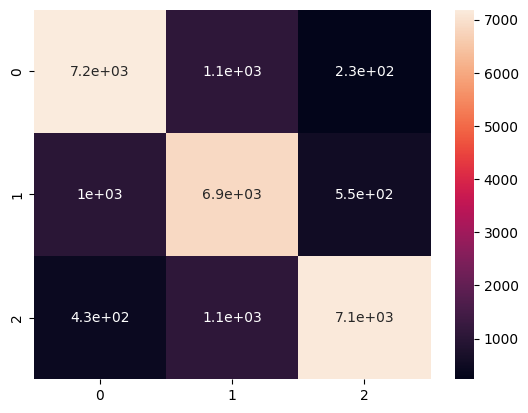

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      8523
           1       0.76      0.81      0.79      8412
           2       0.90      0.83      0.86      8649

    accuracy                           0.83     25584
   macro avg       0.83      0.83      0.83     25584
weighted avg       0.83      0.83      0.83     25584

F1 Score:  0.828879356282816
800/800 [==============================] - 6s 7ms/step
ROC AUC:  0.940657331170403
Validation acc: 0.8279

Start of epoch 5
800/800 [==============================] - 6s 8ms/step


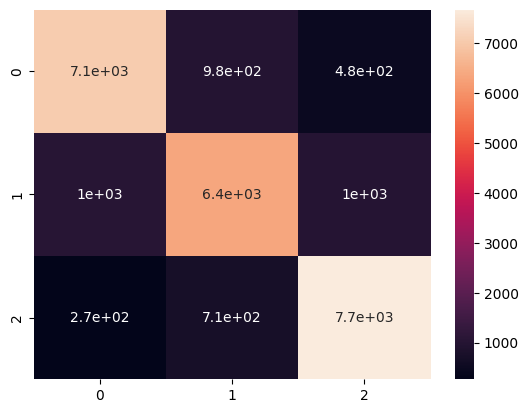

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      8523
           1       0.79      0.76      0.77      8412
           2       0.84      0.89      0.86      8649

    accuracy                           0.82     25584
   macro avg       0.82      0.82      0.82     25584
weighted avg       0.82      0.82      0.82     25584

F1 Score:  0.8241534570016439
800/800 [==============================] - 6s 7ms/step
ROC AUC:  0.9384067860213906
Validation acc: 0.8249

Start of epoch 6
800/800 [==============================] - 6s 8ms/step


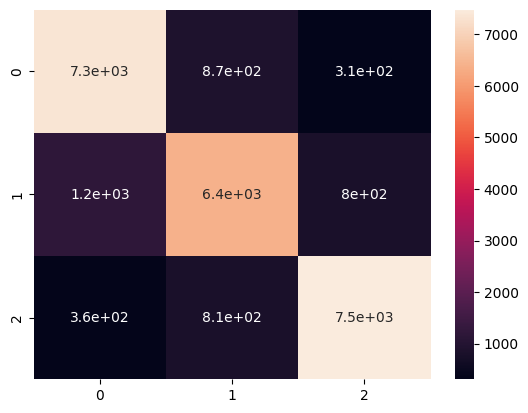

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      8523
           1       0.79      0.76      0.78      8412
           2       0.87      0.86      0.87      8649

    accuracy                           0.83     25584
   macro avg       0.83      0.83      0.83     25584
weighted avg       0.83      0.83      0.83     25584

F1 Score:  0.8296708051399376
800/800 [==============================] - 7s 9ms/step
ROC AUC:  0.9389812145558514
Validation acc: 0.8301

Start of epoch 7
800/800 [==============================] - 6s 8ms/step


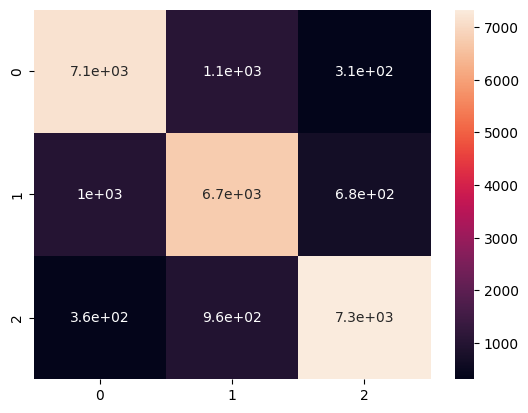

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      8523
           1       0.77      0.80      0.78      8412
           2       0.88      0.85      0.86      8649

    accuracy                           0.83     25584
   macro avg       0.83      0.83      0.83     25584
weighted avg       0.83      0.83      0.83     25584

F1 Score:  0.8294093641320565
800/800 [==============================] - 7s 9ms/step
ROC AUC:  0.9365634121295064
Validation acc: 0.8289

Start of epoch 8
800/800 [==============================] - 6s 8ms/step


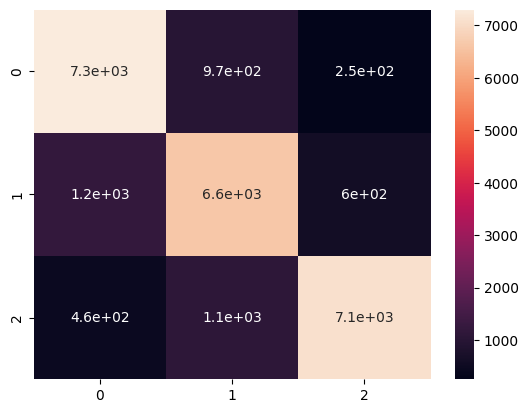

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      8523
           1       0.76      0.79      0.77      8412
           2       0.89      0.82      0.86      8649

    accuracy                           0.82     25584
   macro avg       0.82      0.82      0.82     25584
weighted avg       0.82      0.82      0.82     25584

F1 Score:  0.8223146932183539
800/800 [==============================] - 7s 9ms/step
ROC AUC:  0.932342332956421
Validation acc: 0.8217

Start of epoch 9
800/800 [==============================] - 7s 9ms/step


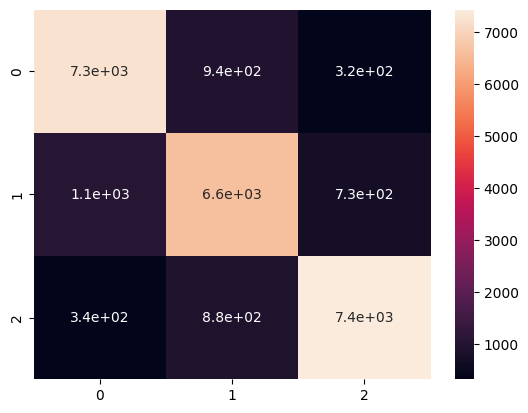

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      8523
           1       0.78      0.79      0.79      8412
           2       0.88      0.86      0.87      8649

    accuracy                           0.83     25584
   macro avg       0.83      0.83      0.83     25584
weighted avg       0.83      0.83      0.83     25584

F1 Score:  0.8327403854397809
800/800 [==============================] - 6s 7ms/step
ROC AUC:  0.9342489265122729
Validation acc: 0.8326

Start of epoch 10
800/800 [==============================] - 6s 7ms/step


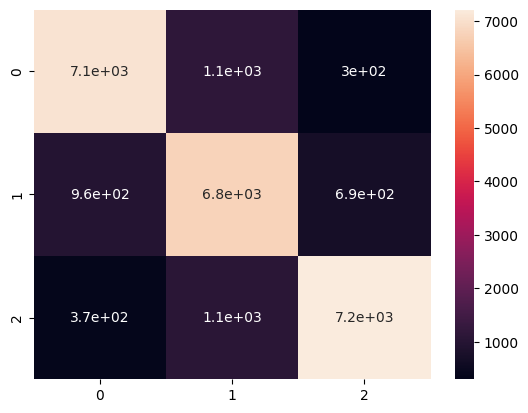

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      8523
           1       0.75      0.80      0.78      8412
           2       0.88      0.83      0.86      8649

    accuracy                           0.82     25584
   macro avg       0.83      0.82      0.82     25584
weighted avg       0.83      0.82      0.82     25584

F1 Score:  0.8239067807187473
800/800 [==============================] - 7s 9ms/step
ROC AUC:  0.933162856760755
Validation acc: 0.8231


In [ ]:
best_roc, best_F1, best_acc = train_model_updated_3(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

## With all the labels again

In [ ]:
def train_model_updated_all(model, x_train, y_train, x_val, y_val, epochs, batch_size):
    # Loss function
    loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

    # Prepare the training dataset
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

    # Prepare the validation dataset
    val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
    val_dataset = val_dataset.batch(batch_size)


    best_F1 = 0 
    best_roc = 0
    best_acc = 0 
    best_model = ""

    # Iterate over epochs
    for epoch in range(epochs):
        print(f'\nStart of epoch {epoch+1}')

        for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
            with tf.GradientTape() as tape:
                y_pred = model(x_batch_train, training=True)
                loss_value = loss_fn(y_batch_train, y_pred)
            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))

        val_targ = np.argmax(y_val, axis=1)
        val_predict = np.argmax(model.predict(x_val), axis=1)

        # Compute accuracy
        accuracy = np.mean(val_predict == val_targ)

        # Compute confusion matrix
        mat = sklearn.metrics.confusion_matrix(val_targ, val_predict)
        df_cm = pd.DataFrame(mat, range(5), range(5))
        sns.heatmap(df_cm, annot=True)
        plt.show()

        print("Classification Report:")
        print(classification_report(val_targ, val_predict))

        # Calculate F1 score
        f1 = f1_score(val_targ, val_predict, average='weighted')
        print("F1 Score: ", f1)

        # ROC AUC
        val_prob = model.predict(x_val)

        # Apply softmax to the model's output
        val_prob = tf.nn.softmax(val_prob, axis=-1)

        roc_auc = roc_auc_score(y_val, val_prob, multi_class='ovr')
        print("ROC AUC: ", roc_auc)

        print(f'Validation acc: {float(accuracy):.4f}')

        if roc_auc > best_roc:
          best_roc = roc_auc
          best_F1 = f1
          best_acc = accuracy
          best_model = model

    return best_roc, best_F1, best_acc, best_model

In [ ]:
def get_regular_data_all(label_category='one_hot'):
  df = pd.read_csv('/content/drive/MyDrive/Ethan/Reviews.csv')
  df_balanced = pd.DataFrame()


  min_class_count = df['Score'].value_counts().min()

  for label in df['Score'].unique():
      df_balanced = pd.concat([df_balanced, df[df['Score'] == label].sample(min_class_count)])

  df = df_balanced[['Text', 'Score']]

    # Analyzing the number of unique words
  all_words = [word for tokens in df["Text"] for word in tokens.split(" ")]
  unique_words = set(all_words)
  max_words = len(unique_words)
  print(f'Total number of unique words: {max_words}')

  # Analyzing sequence length
  sequence_lengths = [len(tokens.split(" ")) for tokens in df["Text"]]
  max_sequence_length = np.percentile(sequence_lengths, 95)  # Set to the 95th percentile
  print(f'Max sequence length at 95th percentile: {max_sequence_length}')

  # Prepare the Tokenizer
  tokenizer = Tokenizer(num_words=max_words)
  tokenizer.fit_on_texts(df['Text'])

  # Tokenize the data
  sequences = tokenizer.texts_to_sequences(df['Text'])
  word_index = tokenizer.word_index

  # Ensure all sequences have the same length
  data = pad_sequences(sequences, maxlen=int(max_sequence_length))


  # Prepare labels
  if label_category == 'label':
    # Subtract 1 from labels, then add 1, to ensure labels start from 0
    labels = to_categorical(df['Score'] - 1) 
  else: 
    labels = df['Score'].values


  x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

  return x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer

In [ ]:
x_train, x_val, y_train, y_val, max_words, max_sequence_length, tokenizer = get_regular_data_all(label_category='label')

Total number of unique words: 282747
Max sequence length at 95th percentile: 240.0


In [ ]:
print(y_train)

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
glove_embeddings = load_glove_embeddings('/content/drive/MyDrive/Ethan/glove.twitter.27B.200d.txt')

In [ ]:
embedding_matrix = np.zeros((max_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= max_words:
        continue
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_dim = embedding_matrix.shape[1]

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=int(max_sequence_length)))
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))  
model.add(Dropout(0.5)) 
model.add(LSTM(64, kernel_regularizer=l2(0.01)))  
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  
model.add(Dropout(0.5))  
model.add(Dense(5, activation='softmax')) 

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Convert labels to float
y_train = y_train.astype(float)
y_val = y_val.astype(float)


Start of epoch 1


931/931 [==============================] - 15s 14ms/step


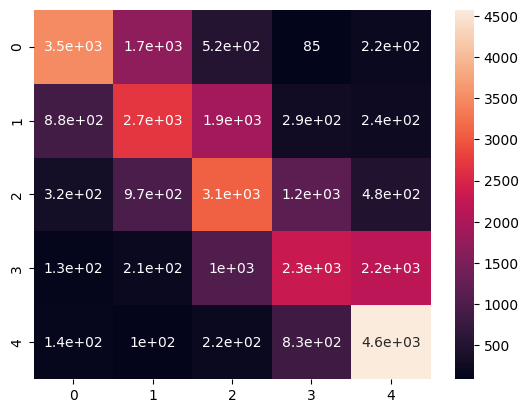

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64      6043
           1       0.47      0.45      0.46      6003
           2       0.46      0.51      0.48      6015
           3       0.49      0.39      0.44      5846
           4       0.59      0.78      0.68      5862

    accuracy                           0.54     29769
   macro avg       0.54      0.54      0.54     29769
weighted avg       0.54      0.54      0.54     29769

F1 Score:  0.5386277003963813
931/931 [==============================] - 13s 14ms/step
ROC AUC:  0.8427826093683681
Validation acc: 0.5428

Start of epoch 2
931/931 [==============================] - 7s 8ms/step


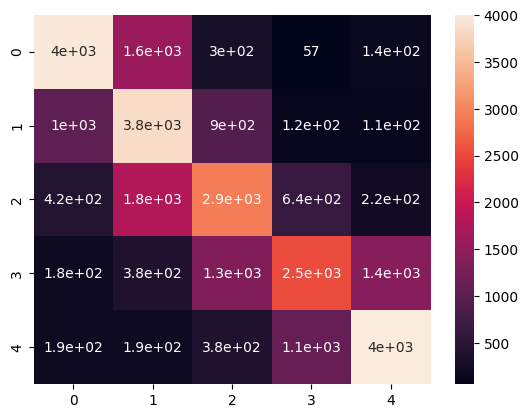

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67      6043
           1       0.49      0.64      0.56      6003
           2       0.50      0.49      0.49      6015
           3       0.57      0.43      0.49      5846
           4       0.68      0.68      0.68      5862

    accuracy                           0.58     29769
   macro avg       0.59      0.58      0.58     29769
weighted avg       0.59      0.58      0.58     29769

F1 Score:  0.5791664662213176
931/931 [==============================] - 11s 12ms/step
ROC AUC:  0.8653631220000388
Validation acc: 0.5804

Start of epoch 3
931/931 [==============================] - 8s 9ms/step


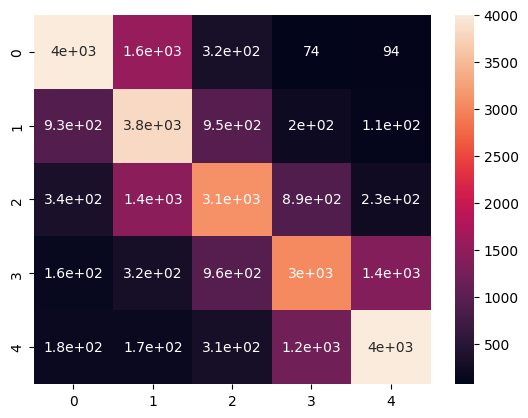

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.66      0.69      6043
           1       0.52      0.64      0.57      6003
           2       0.55      0.52      0.53      6015
           3       0.56      0.52      0.54      5846
           4       0.69      0.68      0.69      5862

    accuracy                           0.60     29769
   macro avg       0.61      0.60      0.60     29769
weighted avg       0.61      0.60      0.60     29769

F1 Score:  0.6037007449839416
931/931 [==============================] - 8s 9ms/step
ROC AUC:  0.8695706913149646
Validation acc: 0.6033

Start of epoch 4
931/931 [==============================] - 8s 9ms/step


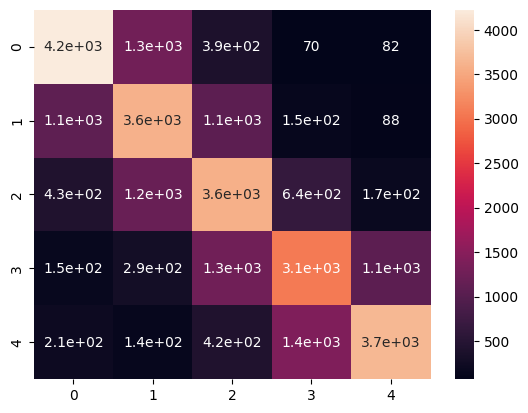

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      6043
           1       0.56      0.60      0.58      6003
           2       0.53      0.60      0.56      6015
           3       0.57      0.52      0.55      5846
           4       0.72      0.63      0.67      5862

    accuracy                           0.61     29769
   macro avg       0.62      0.61      0.61     29769
weighted avg       0.61      0.61      0.61     29769

F1 Score:  0.6109876355284182
931/931 [==============================] - 8s 9ms/step
ROC AUC:  0.8653212383690159
Validation acc: 0.6100

Start of epoch 5
931/931 [==============================] - 8s 8ms/step


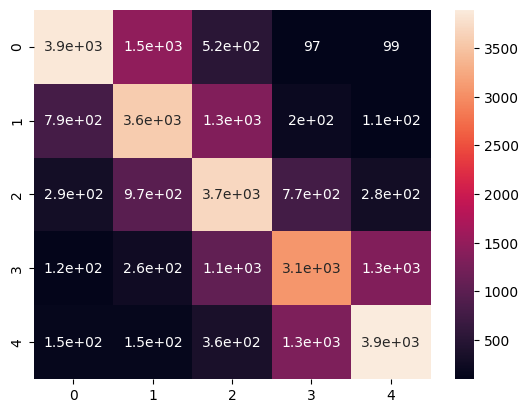

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      6043
           1       0.56      0.59      0.58      6003
           2       0.53      0.61      0.57      6015
           3       0.56      0.53      0.54      5846
           4       0.68      0.66      0.67      5862

    accuracy                           0.61     29769
   macro avg       0.61      0.61      0.61     29769
weighted avg       0.61      0.61      0.61     29769

F1 Score:  0.6096304081722109
931/931 [==============================] - 8s 9ms/step
ROC AUC:  0.8574455069975194
Validation acc: 0.6080

Start of epoch 6
931/931 [==============================] - 8s 8ms/step


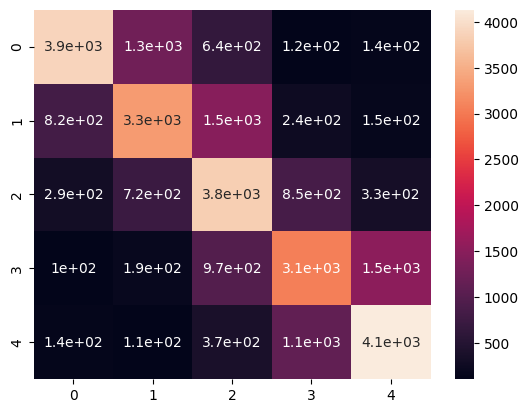

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      6043
           1       0.59      0.55      0.57      6003
           2       0.53      0.64      0.58      6015
           3       0.57      0.52      0.54      5846
           4       0.66      0.71      0.68      5862

    accuracy                           0.61     29769
   macro avg       0.62      0.61      0.61     29769
weighted avg       0.62      0.61      0.61     29769

F1 Score:  0.6124695837099636
931/931 [==============================] - 9s 10ms/step
ROC AUC:  0.8510375000042639
Validation acc: 0.6119

Start of epoch 7
931/931 [==============================] - 10s 11ms/step


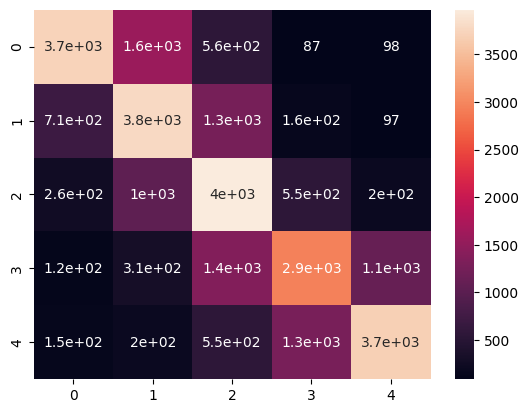

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.62      0.68      6043
           1       0.55      0.63      0.59      6003
           2       0.52      0.66      0.58      6015
           3       0.59      0.50      0.54      5846
           4       0.71      0.63      0.67      5862

    accuracy                           0.61     29769
   macro avg       0.62      0.61      0.61     29769
weighted avg       0.62      0.61      0.61     29769

F1 Score:  0.6103245711243966
931/931 [==============================] - 8s 8ms/step
ROC AUC:  0.8442075095198037
Validation acc: 0.6082

Start of epoch 8
931/931 [==============================] - 8s 8ms/step


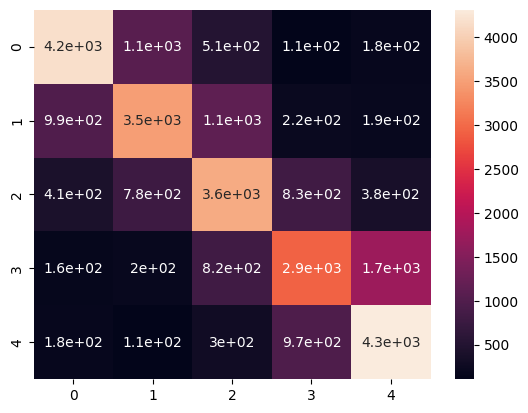

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      6043
           1       0.62      0.58      0.60      6003
           2       0.57      0.60      0.58      6015
           3       0.58      0.50      0.54      5846
           4       0.63      0.74      0.68      5862

    accuracy                           0.62     29769
   macro avg       0.62      0.62      0.62     29769
weighted avg       0.62      0.62      0.62     29769

F1 Score:  0.6198389313880295
931/931 [==============================] - 9s 9ms/step
ROC AUC:  0.8462343087217515
Validation acc: 0.6217

Start of epoch 9
931/931 [==============================] - 8s 9ms/step


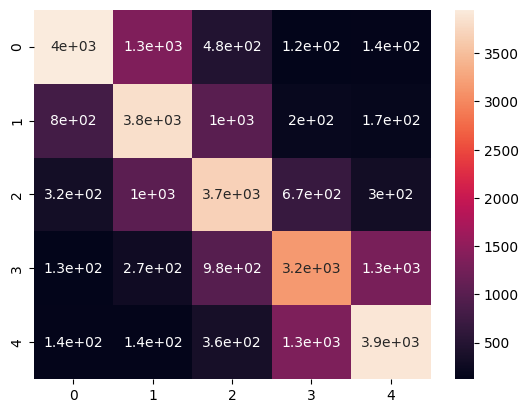

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.65      0.69      6043
           1       0.58      0.64      0.61      6003
           2       0.57      0.61      0.59      6015
           3       0.58      0.54      0.56      5846
           4       0.67      0.66      0.67      5862

    accuracy                           0.62     29769
   macro avg       0.63      0.62      0.62     29769
weighted avg       0.63      0.62      0.62     29769

F1 Score:  0.6230166799348916
931/931 [==============================] - 9s 9ms/step
ROC AUC:  0.8451775510283233
Validation acc: 0.6221

Start of epoch 10
931/931 [==============================] - 10s 11ms/step


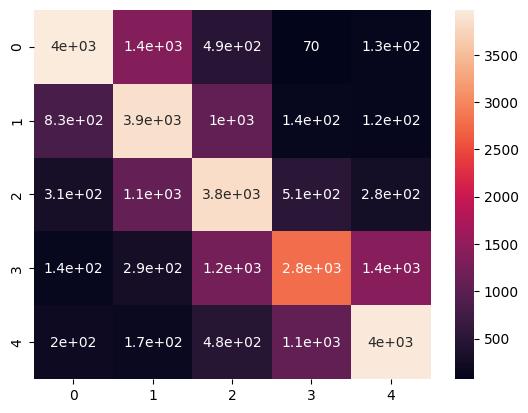

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.66      0.69      6043
           1       0.57      0.64      0.60      6003
           2       0.54      0.64      0.59      6015
           3       0.61      0.47      0.53      5846
           4       0.67      0.68      0.67      5862

    accuracy                           0.62     29769
   macro avg       0.62      0.62      0.62     29769
weighted avg       0.62      0.62      0.62     29769

F1 Score:  0.6176786936093134
931/931 [==============================] - 10s 11ms/step
ROC AUC:  0.8413581641638528
Validation acc: 0.6180


In [ ]:
best_roc, best_F1, best_acc, best_model = train_model_updated_all(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128)

In [ ]:
best_model.save('model.h5')

In [ ]:
import pickle

# Saving the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open("max_sequence_length.txt", "w") as f:
    f.write(str(max_sequence_length))


In [ ]:
print(max_sequence_length)

240.0


# Load model and tokenizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model('/content/drive/MyDrive/NLP_DL/model.h5')

In [ ]:
import pickle
with open('/content/drive/MyDrive/NLP_DL/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
with open("/content/drive/MyDrive/NLP_DL/max_sequence_length.txt", "r") as f:
    max_sequence_length = int(float(f.read()))


In [ ]:
def predict_sentence(model, tokenizer, sentence, max_sequence_length):
    sequences = tokenizer.texts_to_sequences([sentence])
    data = pad_sequences(sequences, maxlen=int(max_sequence_length))
    prediction = model.predict(data)
    label = np.argmax(prediction)
    label += 1
    return label


In [ ]:
sentence = "I don't really know, it was good, but kind of too much tasty"
label = predict_sentence(best_model, tokenizer, sentence, max_sequence_length)
print(f"The predicted label for the sentence '{sentence}' is: {label}")

1/1 [==============================] - 2s 2s/step
The predicted label for the sentence 'I don't really know, it was good, but kind of too much tasty' is: 3
